In [11]:
import csv
import datetime
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
archivo = 'ene_febDFde1a4.csv'
dataframefinal = pd.read_csv('nuevascategorias_enfermedades/porfechayrango/' + archivo, sep = ',')
print(dataframefinal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    40 non-null     int64  
 1   Unnamed: 0.1                  40 non-null     float64
 2   IRA_Alta                      40 non-null     float64
 3   Influenza                     40 non-null     float64
 4   Neumonia                      40 non-null     float64
 5   Bronquitis_bronquiolitis      40 non-null     float64
 6   Crisis_obstructiva_bronquial  40 non-null     float64
 7   Otra_causa_respiratoria       40 non-null     float64
 8   CAUSAS_SISTEMA_RESPIRATORIO   40 non-null     float64
 9   COVID19_Confirmado_u          40 non-null     float64
 10  COVID19_Confirmado_h          40 non-null     float64
 11  Humedad                       40 non-null     float64
 12  Rocio                         40 non-null     float64
 13  Tempera

In [12]:
import itertools
periodos = ['ene_feb','mar_abr','may_jun','jul_ago','sep_oct','nov_dic']
rangosetareos = ['DFtotaltodos','DFmenores','DFde1a4','DFde5a14','DFde15a64','DFde65ymas']
#la linea a continuacion es importantisima, crea un diccionario de dataframes y luego elimina las molestas columnas que se generan automaticamente 
diccionario = {x+y :pd.read_csv('nuevascategorias_enfermedades/porfechayrango/' +x+y+ '.csv', sep = ',') for (x,y) in itertools.product(periodos,rangosetareos)}
for i in diccionario:
    del diccionario[i]["Unnamed: 0"]
    del diccionario[i]["Unnamed: 0.1"]

>## ***Importante***
>Para la creacion de los archivos .CSV que utilizo ademas del diccionario que creo aqui utilizo las claves para acceder a los valores autodescriptivos de la forma ***periodo-categoria*** donde los primeros 6 digitos hacen se refieren al periodo y los siguientes al rango de edad de la categoria al que pertenece siendo estos la concatenacion entre:
>>- ene_feb     
>>- mar_abr     
>>- may_jun 
>>- jul_ago  
>>- sep_oct
>>- nov_dic
>
>Cada periodos de dos en dos los meses del año y que comprenden 5 años desde ***2017 a 2021*** y los data frames
>
>>- DFtotaltodos: Todas las edades  
>>- DFmenores: Menores de 1 año
>>- DFde1a4: Niños de 1 a 4 años
>>- DFde5a14: Niños de 5 a 14 años
>>- DFde15a64: Adultos de 15 a 64 años
>>- DFde65ymas: Adultos mayores de 65 años
>

In [13]:
#del dataframefinal["Unnamed: 0"]
#del dataframefinal["Unnamed: 0.1"]
def algoritmo_dataframe(dataframefinal):
    print('----------------------')
    print('Media de cada variable')
    print('----------------------')
    print(dataframefinal.mean(axis=0))
    

    print('-------------------------')
    print('Varianza de cada variable')
    print('-------------------------')
    print(dataframefinal.var(axis=0))
    plt.style.use('seaborn-whitegrid')
    dataframefinal.plot(x=None, y=["MP10", "MP2.5"], fontsize=20,
            kind="line",figsize=(20, 10)
                       )
    #plt.axes().set_facecolor("white")
    plt.xlabel("Semanas", fontsize=25)
    plt.ylabel("Cantidad (microgramos por metro cubico)", fontsize=25)

    plt.show()
    dataframefinal.plot(x=None, y=["Temperatura", "Rocio", "Temperatura_min", "Temperatura_max"], fontsize=20,
            kind="line",figsize=(20, 10)
                       )
    #plt.axes().set_facecolor("white")
    plt.xlabel("Semanas", fontsize=25)
    plt.ylabel("Grados Celcius", fontsize=25)

    plt.show()
    
    plt.style.use('tableau-colorblind10')
    # plot multiple columns such as population and year from dataframe
    dataframefinal.plot(x=None, y=["Humedad"], fontsize=20,
            kind="line",figsize=(20, 10)
                       )
    #plt.axes().set_facecolor("white")
    plt.xlabel("Semanas", fontsize=25)
    plt.ylabel("Porcentaje", fontsize=25)  #revisar porcentaje

    plt.show()
    #-------------------------------$$$$-------------------------------------
    plt.style.use('classic')
    # plot multiple columns such as population and year from dataframe
    dataframefinal.plot(x=None, y=["IRA_Alta", "Influenza","Neumonia", "Bronquitis_bronquiolitis", "Crisis_obstructiva_bronquial",
                                   "Otra_causa_respiratoria", "CAUSAS_SISTEMA_RESPIRATORIO", "COVID19_Confirmado_u",
                                   "COVID19_Confirmado_h"], fontsize=20, kind="line",figsize=(20, 10))
    #plt.axes().set_facecolor("white")
    plt.xlabel("Semanas", fontsize=25)
    plt.ylabel("Cantidad de Diagnosticados", fontsize=25)  #revisar porcentaje

    # display plot
    plt.show()
    #normalizar usando standartscaler para comparar se puede utilizar print y return para ver el frame y su describe para comprobar que cumpla con una media 0 y std de 1
    plt.style.use('seaborn-whitegrid')
    
    matplotlib.rcParams.update(matplotlib.rcParamsDefault) # reset estilo a los valores por defecto
        
    normaliza2 = StandardScaler().fit_transform(dataframefinal)

    frame = pd.DataFrame(data = normaliza2,
                        index = None,
                        columns = dataframefinal.columns.values)
    display('     *** DataFrame normalizado a continuacion***',frame)
    # Entrenamiento modelo PCA con escalado de los datos
    # ==============================================================================
    pca_pipe = make_pipeline(StandardScaler(), PCA())
    pca_pipe.fit(dataframefinal)

    # Se extrae el modelo entrenado del pipeline
    modelo_pca = pca_pipe.named_steps['pca']
    #modelo_pca.components_
    # Se combierte el array a dataframe para añadir nombres a los ejes.
    dataframe_total_componentes = pd.DataFrame(
        data    = modelo_pca.components_,
        columns = dataframefinal.columns,
        index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16']
    )
    display('     *** DataFrame con todos los componentes principales PCA ***',dataframe_total_componentes)
    # Heatmap componentes
    # ==============================================================================
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))    # aqui cambie el dato, original (8,4)
    componentes = modelo_pca.components_
    plt.imshow(componentes.T, cmap='viridis', aspect='auto')
    plt.yticks(range(len(dataframefinal.columns)), dataframefinal.columns)
    plt.xticks(range(len(dataframefinal.columns)), np.arange(modelo_pca.n_components_) + 1)
    plt.grid(False)
    plt.colorbar();
    plt.show()
    # Porcentaje de varianza explicada por cada componente
    # ==============================================================================
    #print('----------------------------------------------------')
    #print('Porcentaje de varianza explicada por cada componente')
    #print('----------------------------------------------------')
    #print(modelo_pca.explained_variance_ratio_)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    ax.bar(
        x      = np.arange(modelo_pca.n_components_) + 1,
        height = modelo_pca.explained_variance_ratio_
    )
    plt.show()
    
    for x, y in zip(np.arange(len(dataframefinal.columns)) + 1, modelo_pca.explained_variance_ratio_):
        label = round(y, 2)
        ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

    ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
    ax.set_ylim(0, 1.1)
    ax.set_title('Porcentaje de varianza explicada por cada componente')
    ax.set_xlabel('Componente principal')
    ax.set_ylabel('Por. varianza explicada');
    plt.show() #####
    # Porcentaje de varianza explicada acumulada
    # ==============================================================================
    prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
    print('------------------------------------------')
    print('Porcentaje de varianza explicada acumulada')
    print('------------------------------------------')
    print(prop_varianza_acum)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    ax.plot(
        np.arange(len(dataframefinal.columns)) + 1,
        prop_varianza_acum,
        marker = 'o'
    )

    for x, y in zip(np.arange(len(dataframefinal.columns)) + 1, prop_varianza_acum):
        label = round(y, 2)
        ax.annotate(
            label,
            (x,y),
            textcoords="offset points",
            xytext=(0,10),
            ha='center'
        )

    ax.set_ylim(0, 1.1)
    ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
    ax.set_title('Porcentaje de varianza explicada acumulada')
    ax.set_xlabel('Componente principal')
    ax.set_ylabel('Por. varianza acumulada');
    plt.show()  ##### ojo aqui
    # Proyección de las observaciones de entrenamiento
    # ==============================================================================
    proyecciones = pca_pipe.transform(X=dataframefinal)
    proyecciones = pd.DataFrame(
        proyecciones,
        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16'],
        index   = dataframefinal.index
    )
    #proyecciones.head()
    #Cambiando el numero de componentes a 4 o 6
    pca_pipe2 = make_pipeline(StandardScaler(), PCA(n_components=4))
    pca_pipe2.fit(dataframefinal)
    # Se extrae el modelo entrenado del pipeline
    modelo_pca2 = pca_pipe2.named_steps['pca']
    #modelo_pca.components_
    # Se combierte el array a dataframe para añadir nombres a los ejes.
    pcadataframe = pd.DataFrame(
        data    = modelo_pca2.components_,
        columns = dataframefinal.columns,
        index   = ['PC1', 'PC2', 'PC3', 'PC4'])
    #modelo_pca2.components_.index()
    display('     *** DataFrame 4 componentes principales a continuacion ***',pcadataframe)
    
    plt.figure(figsize=(8,6))
    plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[1,:], s=9**2, c=["Blue"], alpha=0.6)
    plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[2,:], s=9**2, c=["green"], alpha=0.6)
    plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[3,:], s=9**2, c=["red"], alpha=0.6)
    plt.subplot().legend(['PC2','PC3','PC4'])
    plt.xlabel('Primer componente PC1')
    plt.ylabel('Componentes secundarias')
    plt.show()
    # Heatmap componentes
    # ==============================================================================
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
    componentes2 = modelo_pca2.components_
    plt.imshow(componentes2.T, cmap='viridis', aspect='auto')
    plt.yticks(range(len(dataframefinal.columns)), dataframefinal.columns)
    plt.xticks(range(4), np.arange(modelo_pca2.n_components_) + 1)
    plt.grid(False)
    plt.colorbar();
    plt.show()
    
        #return

## A partir de aqui se realiza el analisis exploratorio de los datos
Por cada celda se llama a la funcion definida mas arriba y esta despliega la informacion en el siguiente orden
>- Media de cada variable    
>- Varianza de cada variable
>- Grafico de variables contaminantes
>- Grafico de variables ambientales
>- Grafico de Humedad
>- Grafico de cantidad de enfermedades
>- DataFrame con variables normalizadas
>- DataFrame con componentes principales PCA
>- Mapa de calor componentes principales PCA
>- Grafico de representacion de varianza de cada componente
>- Grafico de varianza acumulada de las componentes (muestra un valor medio de 73% de representacion en 4 componentes)
>- DataFrame para las primeras 4 componentes
>- Grafico muestra las 4 componentes en el plano cartesiano
>- Mapa de calor para esas 4 componentes

### - Categoria: Todas las edades
### - Periodo: Enero - Febrero (8 semanas por 5 años)

----------------------
Media de cada variable
----------------------
IRA_Alta                        63.8750
Influenza                        1.8500
Neumonia                         6.6000
Bronquitis_bronquiolitis        13.9250
Crisis_obstructiva_bronquial    13.1000
Otra_causa_respiratoria          9.5000
CAUSAS_SISTEMA_RESPIRATORIO      7.4000
COVID19_Confirmado_u             3.6000
COVID19_Confirmado_h             2.1000
Humedad                         65.5950
Rocio                           11.4150
Temperatura                     18.6725
Temperatura_min                 13.8150
Temperatura_max                 26.8125
MP10                            29.9325
MP2.5                            9.1300
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        387.394231
Influenza                         4.643590
Neumonia                          8.605128
Bronquitis_bronquiolitis         57.353205
Crisis_obstructiva_bronqui

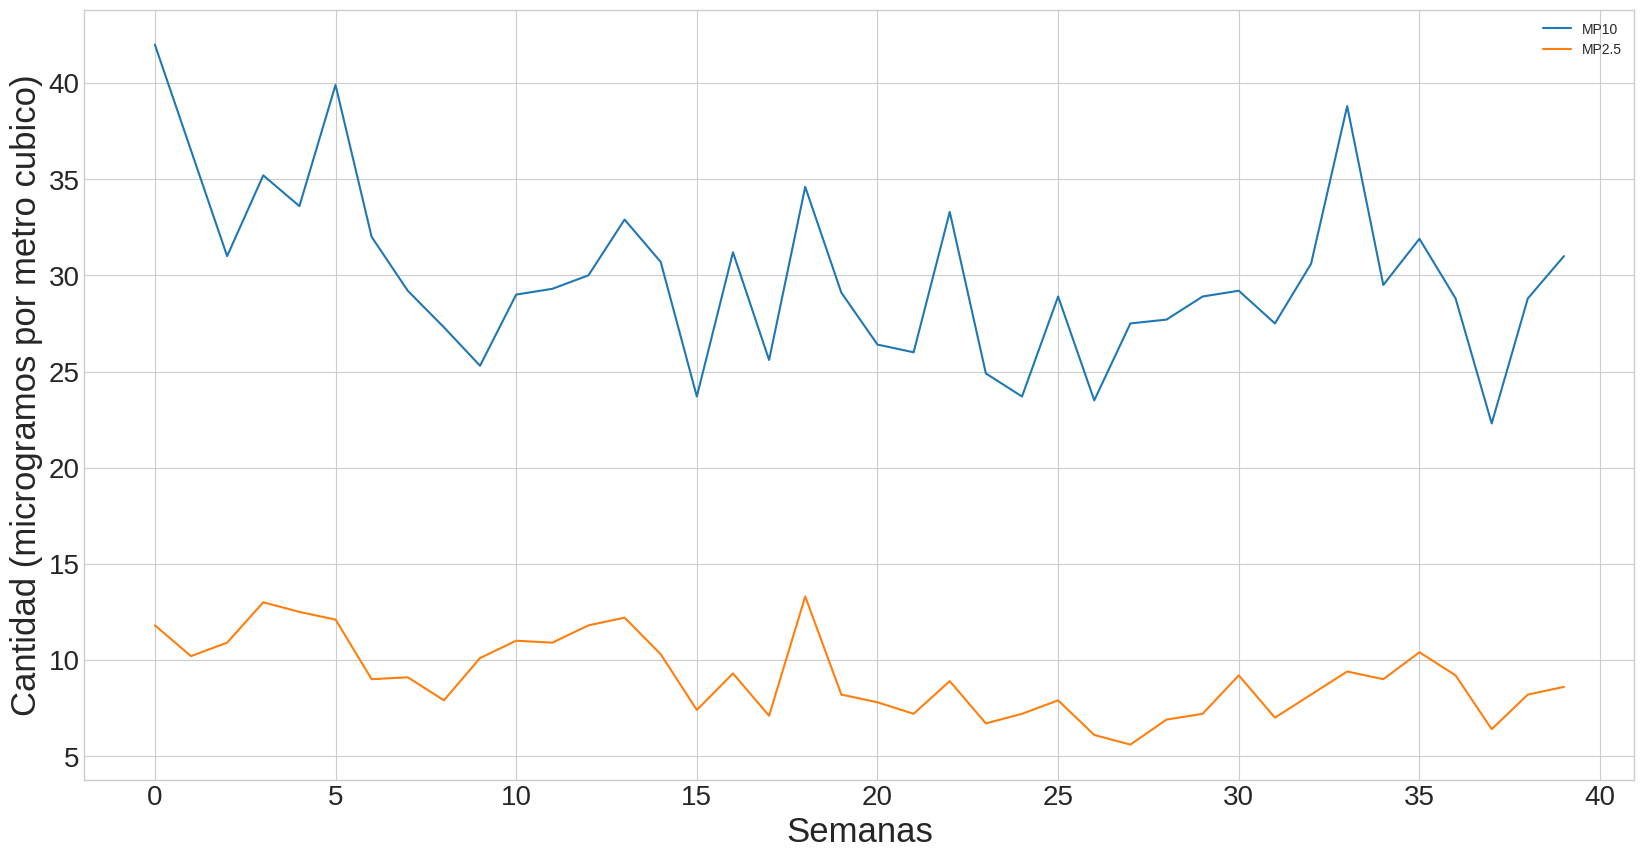

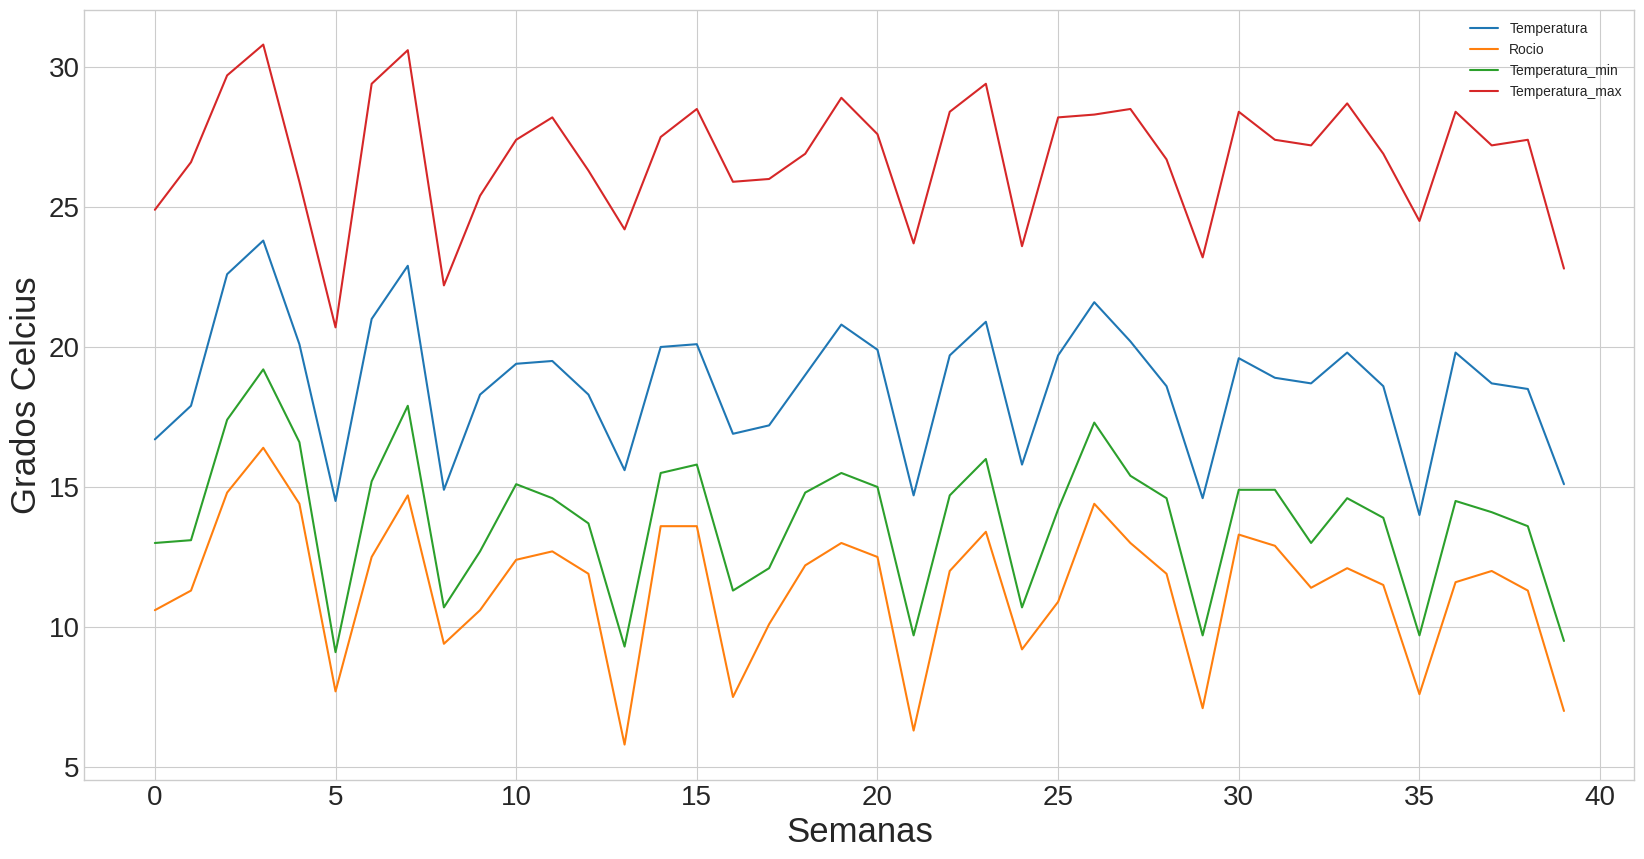

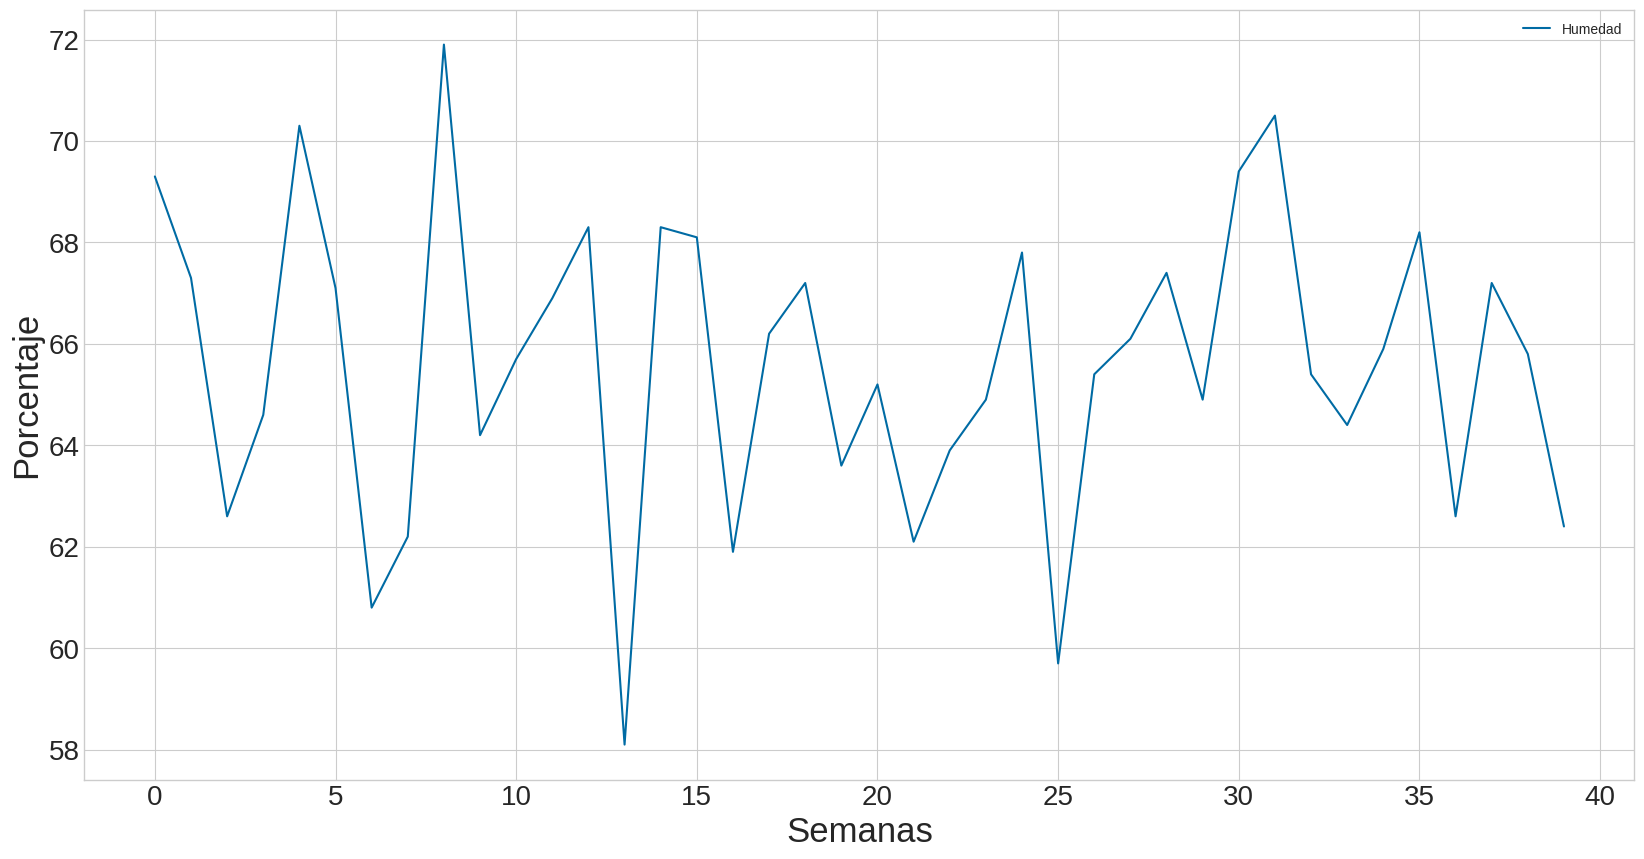

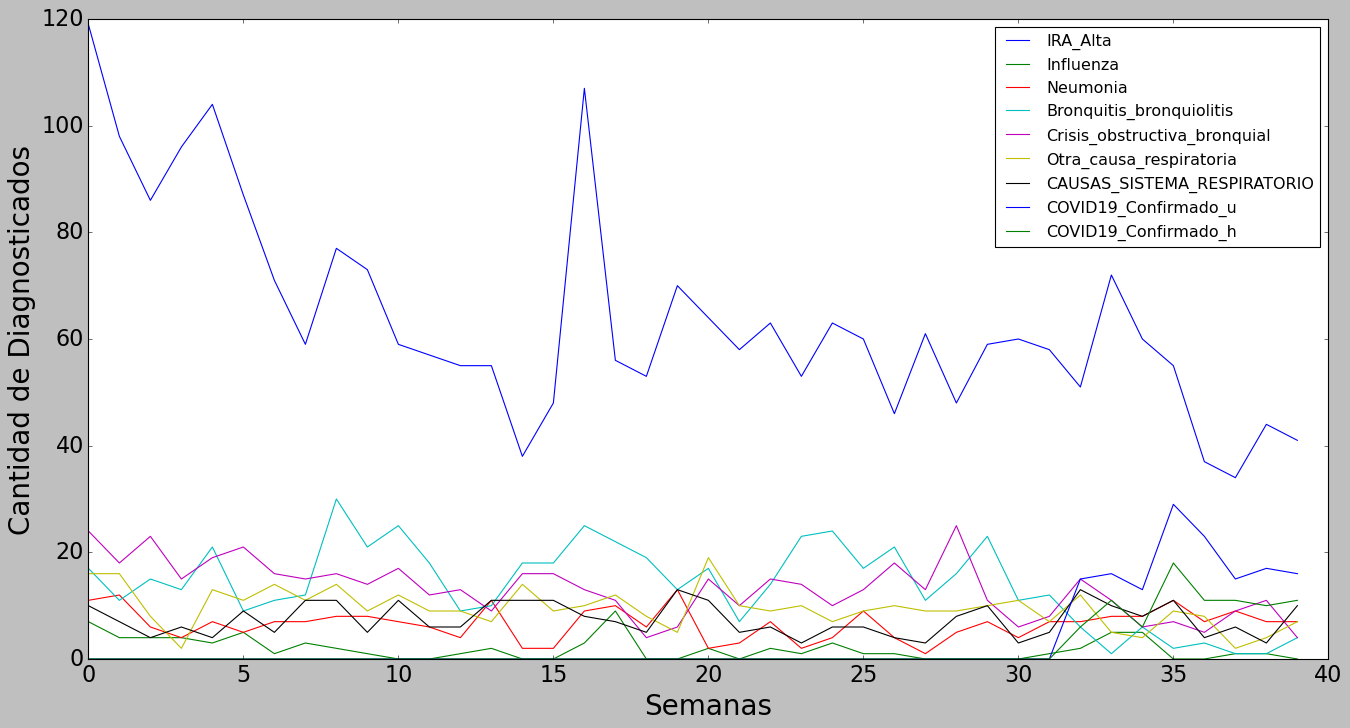

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0   2.836415   2.420349  1.519049                  0.411210   
1   1.755876   1.010437  1.864287                 -0.391151   
2   1.138425   1.010437 -0.207143                  0.143756   
3   1.652967   1.010437 -0.897620                 -0.123697   
4   2.064601   0.540466  0.138095                  0.946118   
5   1.189879   1.480408 -0.552381                 -0.658605   
6   0.366611  -0.399475  0.138095                 -0.391151   
7  -0.250839   0.540466  0.138095                 -0.257424   
8   0.675337   0.070496  0.483334                  2.149660   
9   0.469520  -0.399475  0.483334                  0.946118   
10 -0.250839  -0.869446  0.138095                  1.481026   
11 -0.353748  -0.869446 -0.207143                  0.544937   
12 -0.456656  -0.399475 -0.897620                 -0.658605   
13 -0.456656   0.070496  1.519049                 -0.524878   
14 -1.331378  -0.869446 -1.588096                  0.544937   
15 -0.816836  -0.869446 -1.588096                  0.544937   
16  2.218964   0.540466  0.828572                  1.481026   
17 -0.405202   3.360290  1.173810                  1.079845   
18 -0.559565  -0.869446 -0.207143                  0.678664   
19  0.315157  -0.869446  2.209525                 -0.123697   
20  0.006432   0.070496 -1.588096                  0.411210   
21 -0.302294  -0.869446 -1.242858                 -0.926059   
22 -0.045022   0.070496  0.138095                  0.010030   
23 -0.559565  -0.399475 -1.588096                  1.213572   
24 -0.045022   0.540466 -0.897620                  1.347299   
25 -0.199385  -0.399475  0.828572                  0.411210   
26 -0.919744  -0.399475 -0.897620                  0.946118   
27 -0.147931  -0.869446 -1.933335                 -0.391151   
28 -0.816836  -0.869446 -0.552381                  0.277483   
29 -0.250839  -0.869446  0.138095                  1.213572   
30 -0.199385  -0.869446 -0.897620                 -0.391151   
31 -0.302294  -0.399475  0.138095                 -0.257424   
32 -0.662473   0.070496  0.138095                 -1.059786   
33  0.418066   1.480408  0.483334                 -1.728420   
34 -0.199385   1.480408  0.483334                 -1.059786   
35 -0.456656  -0.869446  1.519049                 -1.594694   
36 -1.382833  -0.869446  0.138095                 -1.460967   
37 -1.537195  -0.399475  0.828572                 -1.728420   
38 -1.022653  -0.399475  0.138095                 -1.728420   
39 -1.177016  -0.869446  0.138095                 -1.327240   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                       2.088445                 1.799319   
1                       0.938842                 1.799319   
2                       1.896844                -0.415227   
3                       0.364041                -2.076137   
4                       1.130442                 0.968864   
5                       1.513643                 0.415227   
6                       0.555641                 1.245682   
7                       0.364041                 0.415227   
8                       0.555641                 1.245682   
9                       0.172440                -0.138409   
10                      0.747242                 0.692046   
11                     -0.210760                -0.138409   
12                     -0.019160                -0.138409   
13                     -0.785562                -0.692046   
14                      0.555641                 1.245682   
15                      0.555641                -0.138409   
16                     -0.019160                 0.138409   
17                     -0.402361                 0.692046   
18                     -1.743564                -0.415227   
19                     -1.360363                -1.245682   
20                      0.364041                 2.629774   
21                     -0.593961                 0.138409   
22               

'     *** DataFrame con todos los componentes principales PCA ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1  -0.072352   0.002727  0.217350                 -0.184044   
PC2   0.402539   0.270159  0.103464                  0.296198   
PC3   0.260344   0.283743  0.302923                 -0.326447   
PC4   0.047319  -0.002304  0.247665                  0.087800   
PC5  -0.158518   0.003305  0.229631                  0.047381   
PC6   0.185668   0.623408  0.299169                  0.072171   
PC7   0.006834  -0.110343  0.440373                  0.378323   
PC8  -0.155441   0.342104 -0.441322                 -0.096798   
PC9  -0.192714   0.489362 -0.256632                 -0.107533   
PC10  0.125481  -0.237915  0.176062                 -0.570488   
PC11  0.687141  -0.173648 -0.394173                  0.225383   
PC12 -0.390210   0.000124  0.016047                  0.462550   
PC13 -0.018271  -0.031672  0.071041                 -0.013661   
PC14  0.013072  -0.028424  0.012939                  0.012911   
PC15 -0.011718   0.024280  0.000962                 -0.044023   
PC16 -0.030795  -0.000034  0.018023                 -0.010275   

      Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                      -0.213536                -0.068157   
PC2                       0.307590                 0.327371   
PC3                       0.024564                -0.151248   
PC4                      -0.183036                -0.213659   
PC5                       0.202529                 0.354340   
PC6                       0.076072                -0.161945   
PC7                      -0.467240                -0.307984   
PC8                       0.153582                -0.608897   
PC9                      -0.651524                 0.420706   
PC10                     -0.095717                -0.046013   
PC11                     -0.291492                -0.069624   
PC12                      0.019148                -0.110794   
PC13                     -0.131291                 0.062870   
PC14                      0.018049                -0.044381   
PC15                     -0.012496                 0.004335   
PC16                      0.016744                 0.009455   

      CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                      0.169995              0.275005              0.283458   
PC2                      0.137420             -0.307125             -0.304972   
PC3                      0.053672              0.245514              0.242290   
PC4                     -0.024130             -0.268770             -0.269120   
PC5                      0.750895              0.121856              0.102371   
PC6                     -0.245463              0.070580              0.081621   
PC7                      0.256889             -0.112900             -0.093930   
PC8                      0.447902             -0.148248             -0.120926   
PC9                      0.047273             -0.068588             -0.125922   
PC10                     0.076981             -0.347984             -0.303848   
PC11                     0.188555              0.168036              0.179683   
PC12                    -0.118440              0.041188              0.065936   
PC13                    -0.013610              0.006105              0.034262   
PC14                    -0.002557              0.667254             -0.674769   
PC15                     0.009044              0.201894             -0.227945   
PC16                    -0.005964             -0.034958              0.040823   

       Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1  -0.036854 -0.423725    -0.419453        -0.431286        -0.361918   
PC2   0.106034 -0.132815    -0.172611        -0.148005        -0.246980   
PC3  -0.097515  0.157332     0.190243         0.172030         0.202075   
PC4  -0.791684 -0.217109     0.085753        -0.069342         0.124830   
PC5  -0.150284  0.063887     0.113000         0.083732         0.174489   


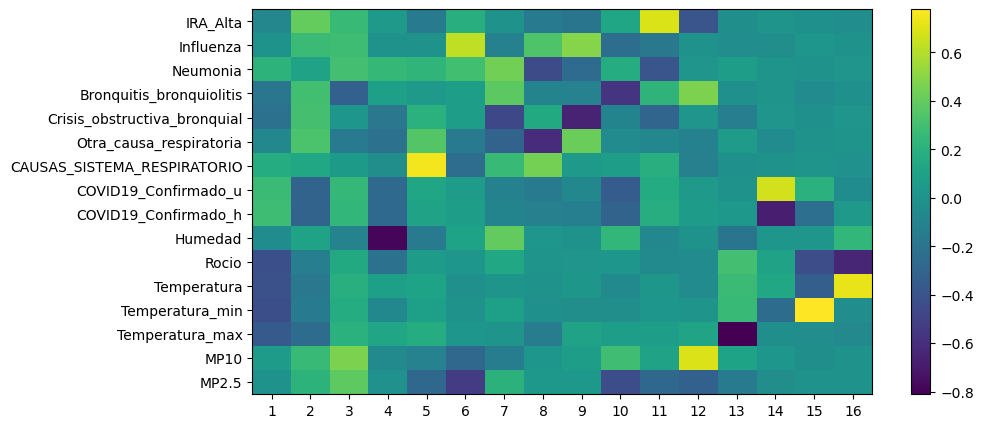

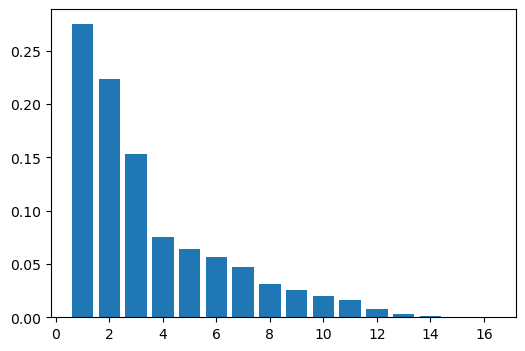

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.27511666 0.49822541 0.65141619 0.72682816 0.7909854  0.84754783
 0.89437435 0.9258889  0.95111243 0.97077929 0.98672664 0.99495317
 0.99825642 0.99927479 0.99989187 1.        ]


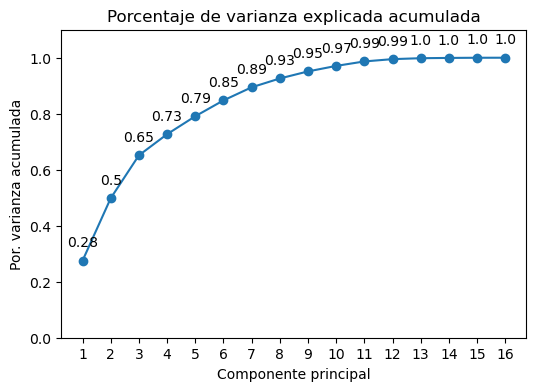

'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1 -0.072352   0.002727  0.217350                 -0.184044   
PC2  0.402539   0.270159  0.103464                  0.296198   
PC3  0.260344   0.283743  0.302923                 -0.326447   
PC4  0.047319  -0.002304  0.247665                  0.087800   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                     -0.213536                -0.068157   
PC2                      0.307590                 0.327371   
PC3                      0.024564                -0.151248   
PC4                     -0.183036                -0.213659   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                     0.169995              0.275005              0.283458   
PC2                     0.137420             -0.307125             -0.304972   
PC3                     0.053672              0.245514              0.242290   
PC4                    -0.024130             -0.268770             -0.269120   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1 -0.036854 -0.423725    -0.419453        -0.431286        -0.361918   
PC2  0.106034 -0.132815    -0.172611        -0.148005        -0.246980   
PC3 -0.097515  0.157332     0.190243         0.172030         0.202075   
PC4 -0.791684 -0.217109     0.085753        -0.069342         0.124830   

         MP10     MP2.5  
PC1  0.068505 -0.000220  
PC2  0.262928  0.218687  
PC3  0.467711  0.385230  
PC4 -0.051382 -0.005141

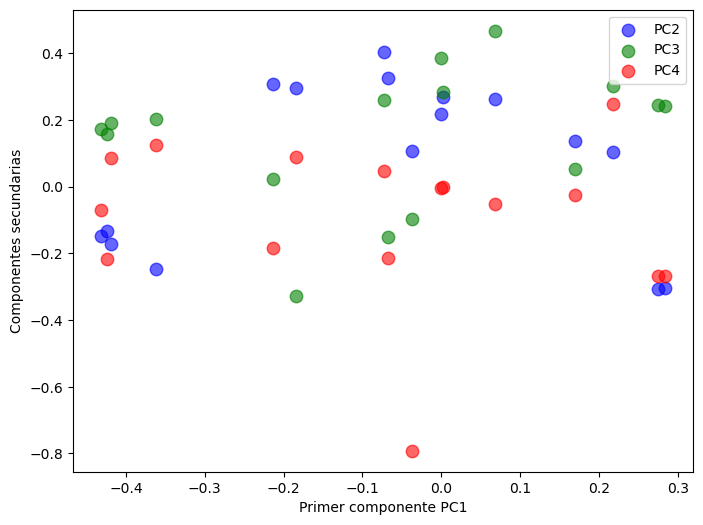

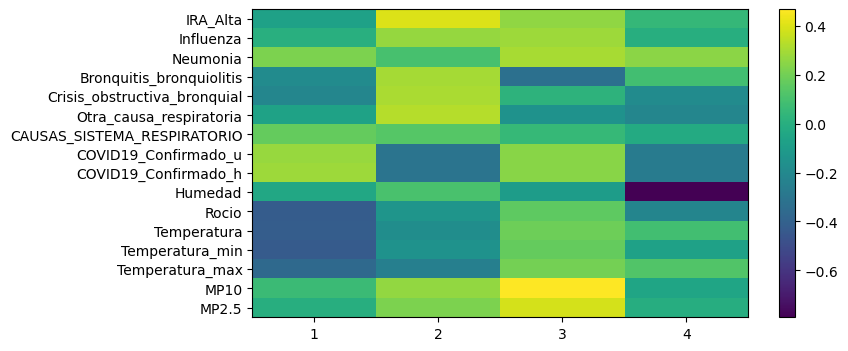

In [15]:
algoritmo_dataframe(diccionario['ene_febDFtotaltodos'])

### - Categoria: Todas las edades
### - Periodo: Marzo - Abril (9 semanas por 5 años, 2017-2021)

----------------------
Media de cada variable
----------------------
IRA_Alta                        93.155556
Influenza                        3.111111
Neumonia                         6.622222
Bronquitis_bronquiolitis        31.288889
Crisis_obstructiva_bronquial    16.311111
Otra_causa_respiratoria         11.266667
CAUSAS_SISTEMA_RESPIRATORIO      7.044444
COVID19_Confirmado_u             7.133333
COVID19_Confirmado_h             3.800000
Humedad                         68.904444
Rocio                           10.371111
Temperatura                     16.728889
Temperatura_min                 11.942222
Temperatura_max                 24.851111
MP10                            36.442222
MP2.5                           11.591111
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        1581.952525
Influenza                         14.328283
Neumonia                          10.467677
Bronquitis_bronquiolitis         7

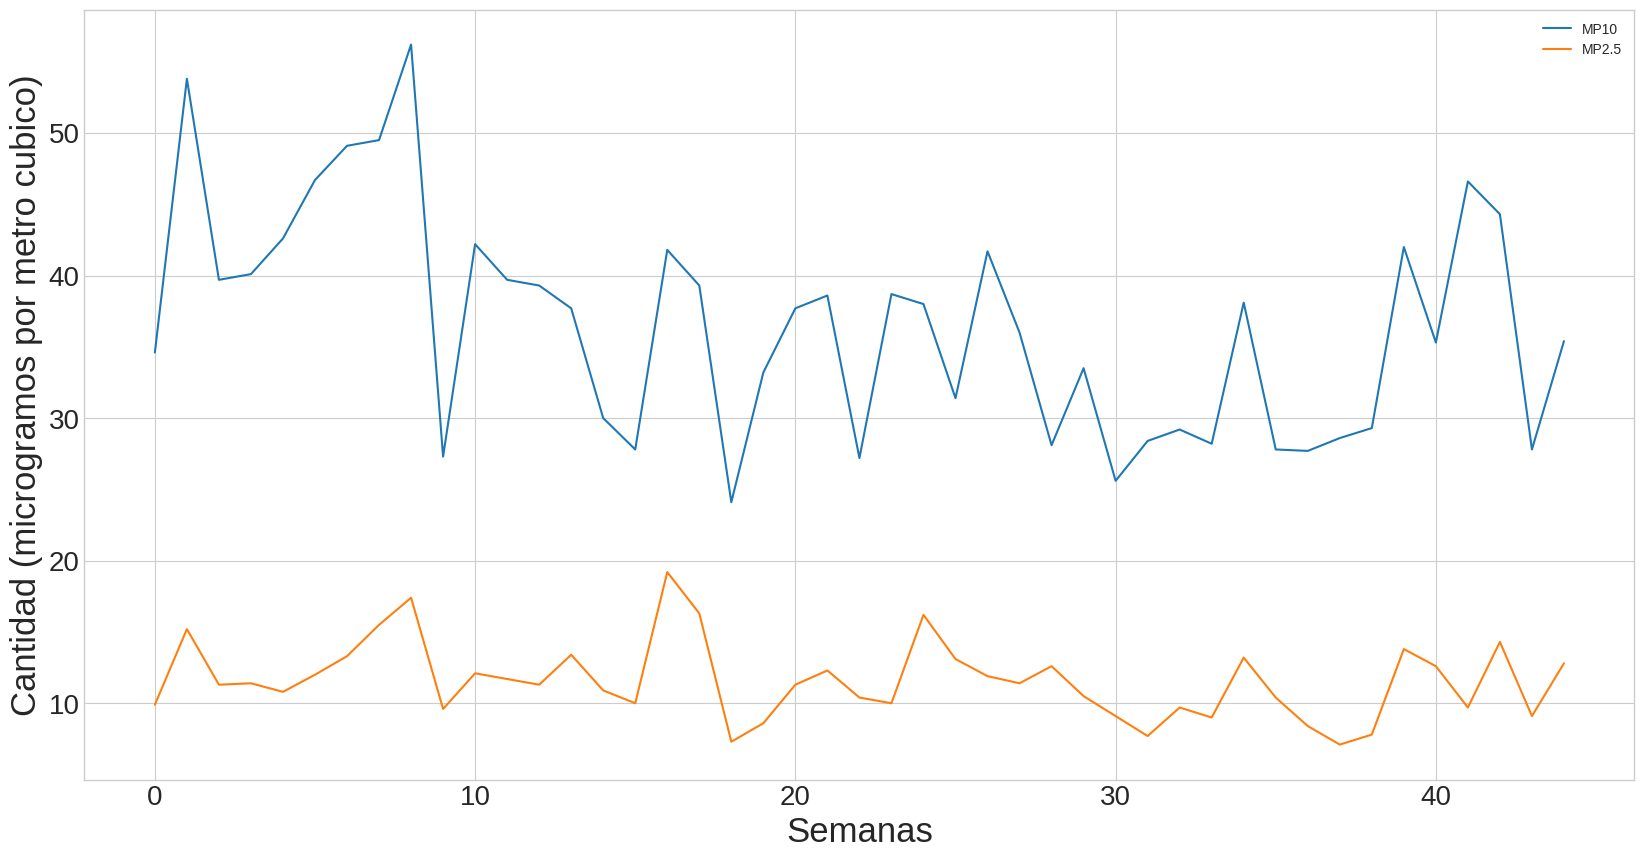

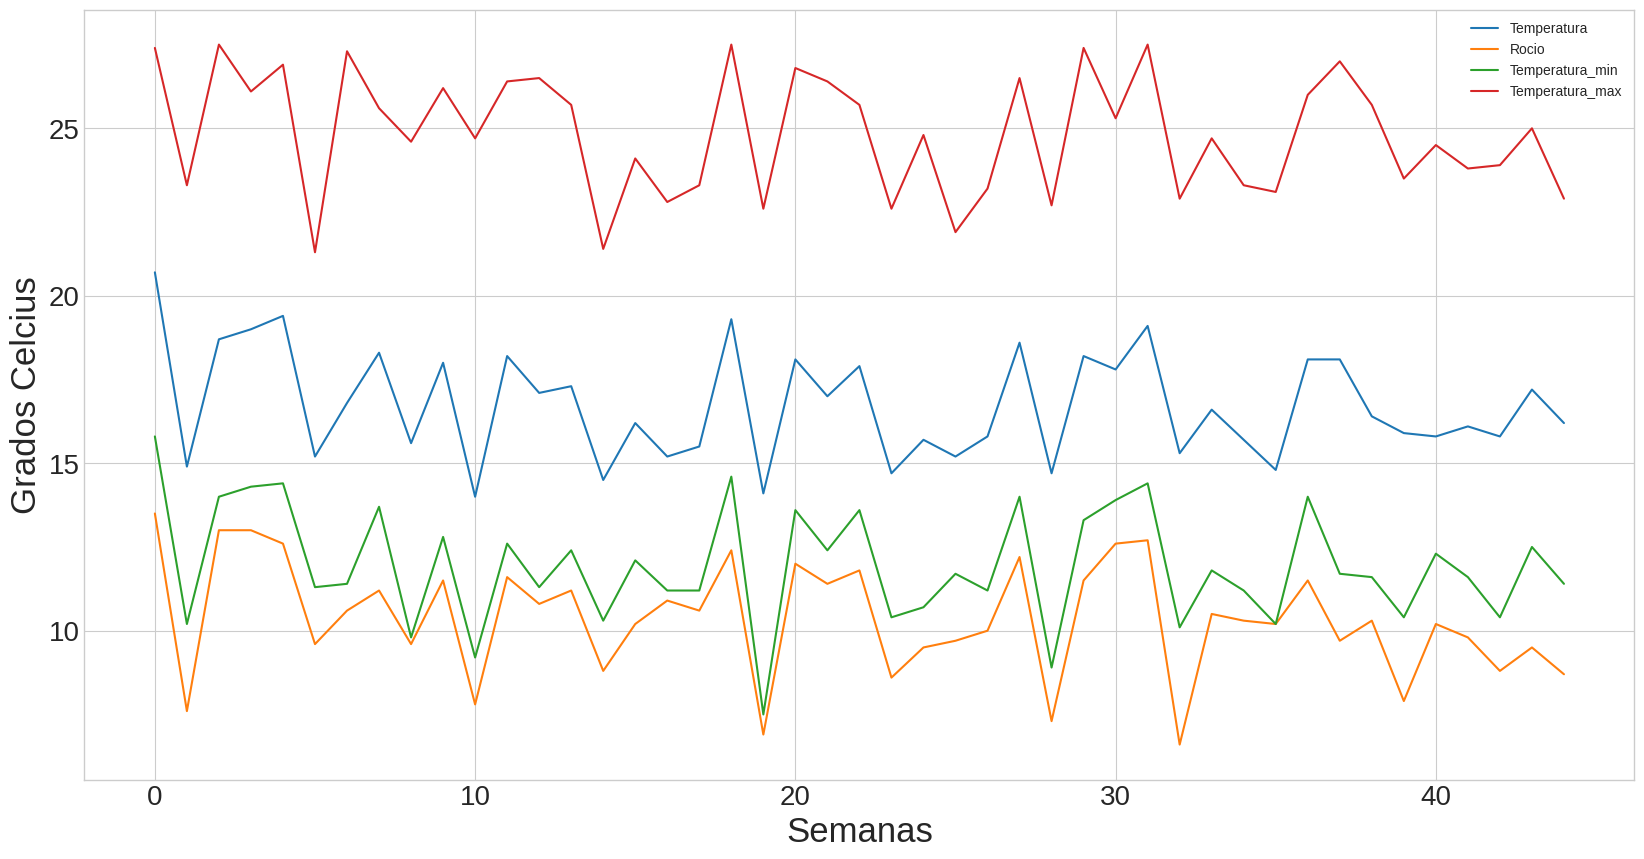

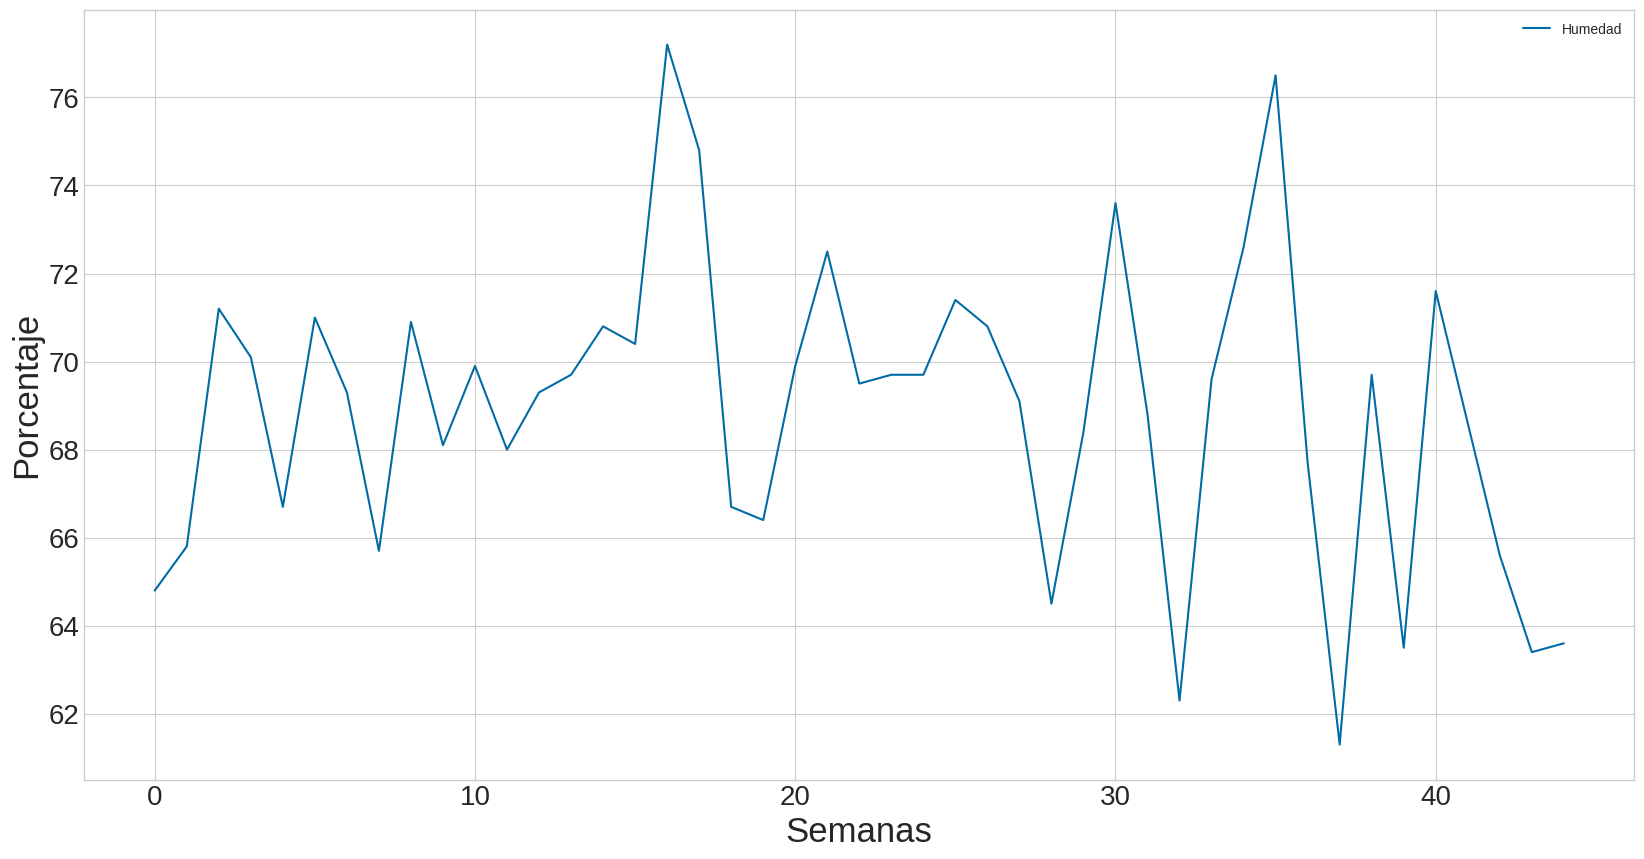

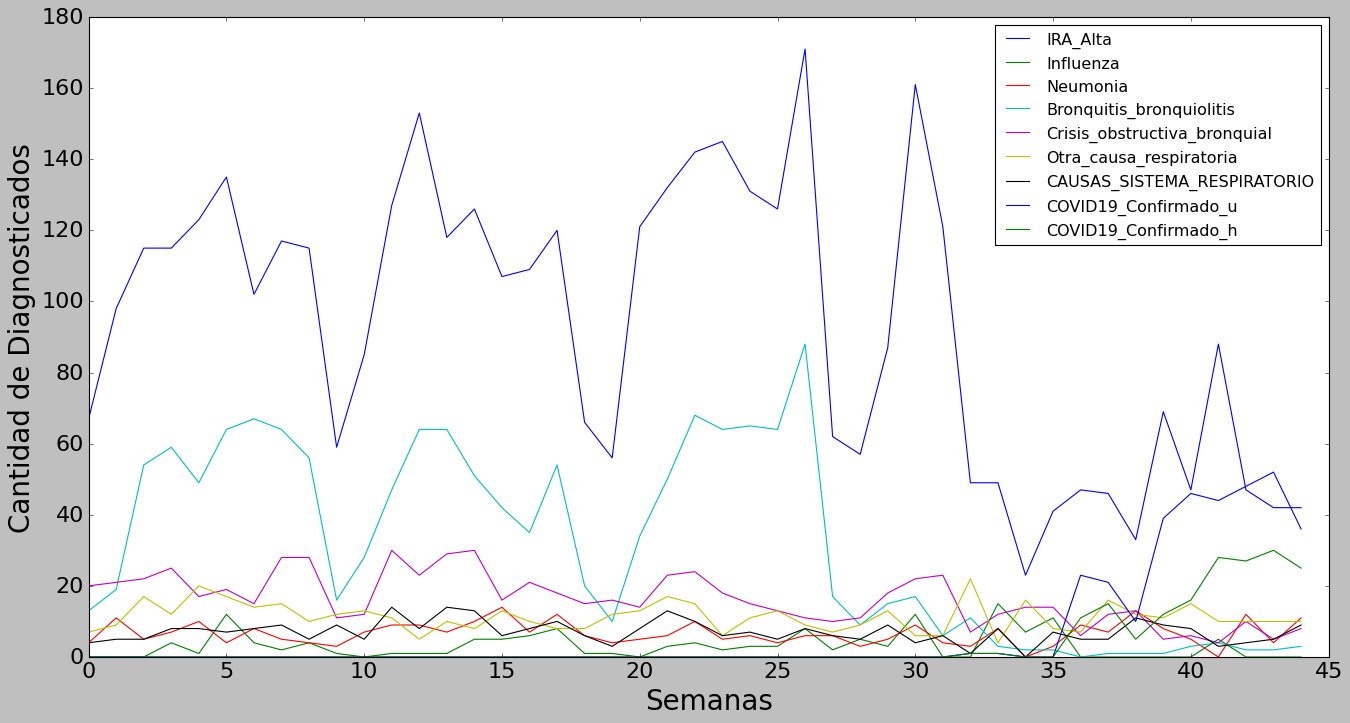

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0  -0.665039  -0.831186 -0.819642                 -0.695896   
1   0.123176  -0.831186  1.368386                 -0.467595   
2   0.555423  -0.831186 -0.507067                  0.864163   
3   0.555423   0.237482  0.118084                  1.054414   
4   0.758834  -0.564019  1.055810                  0.673911   
5   1.063949   2.374818 -0.819642                  1.244665   
6   0.224882   0.237482  0.430659                  1.358815   
7   0.606276  -0.296852 -0.507067                  1.244665   
8   0.555423   0.237482 -0.819642                  0.940263   
9  -0.868449  -0.564019 -1.132217                 -0.581745   
10 -0.207366  -0.831186  0.118084                 -0.125143   
11  0.860539  -0.564019  0.743235                  0.597811   
12  1.521623  -0.564019  0.743235                  1.244665   
13  0.631702  -0.564019  0.118084                  1.244665   
14  0.835113   0.504649  1.055810                  0.750012   
15  0.352013   0.504649  2.306112                  0.407560   
16  0.402866   0.771816  0.118084                  0.141209   
17  0.682555   1.306150  1.680961                  0.864163   
18 -0.690465  -0.564019 -0.194491                 -0.429545   
19 -0.944728  -0.564019 -0.819642                 -0.810047   
20  0.707981  -0.831186 -0.507067                  0.103158   
21  0.987671  -0.029685 -0.194491                  0.711962   
22  1.241934   0.237482  1.055810                  1.396865   
23  1.318212  -0.296852 -0.507067                  1.244665   
24  0.962244  -0.029685 -0.194491                  1.282715   
25  0.835113  -0.029685 -0.819642                  1.244665   
26  1.979296   1.306150 -0.194491                  2.157870   
27 -0.792171  -0.296852 -0.194491                 -0.543695   
28 -0.919302   0.504649 -1.132217                 -0.848097   
29 -0.156513  -0.029685 -0.507067                 -0.619796   
30  1.725033   2.374818  0.743235                 -0.543695   
31  0.707981  -0.831186 -0.819642                 -0.962248   
32 -1.122712  -0.831186 -1.132217                 -0.771996   
33 -1.122712   3.176319  0.430659                 -1.076398   
34 -1.783796   1.038983 -2.069944                 -1.114448   
35 -1.326123   2.107651 -1.132217                 -1.114448   
36 -1.173565  -0.831186  0.743235                 -1.190549   
37 -1.198991  -0.831186  0.118084                 -1.152499   
38 -1.529533  -0.831186  1.993536                 -1.152499   
39 -0.614186  -0.831186  0.430659                 -1.152499   
40 -1.173565  -0.831186 -0.507067                 -1.076398   
41 -0.131087   0.504649 -2.069944                 -1.038348   
42 -1.173565  -0.831186  1.680961                 -1.114448   
43 -1.300697  -0.831186 -0.819642                 -1.114448   
44 -1.300697  -0.831186  1.368386                 -1.076398   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                       0.521035                -1.081180   
1                       0.662279                -0.574377   
2                       0.803523                 1.452835   
3                       1.227256                 0.185828   
4                       0.097302                 2.213040   
5                       0.379790                 1.452835   
6                      -0.185187                 0.692631   
7                       1.650989                 0.946032   
8                       1.650989                -0.320975   
9                      -0.750164                 0.185828   
10                     -0.608920                 0.439229   
11                      1.933478                -0.067574   
12                      0.944767                -1.587983   
13                      1.792233                -0.320975   
14                      1.933478                -0.827778   
15                     -0.043943                 0.439229   
16                      0.662279                -0.320975   
17     

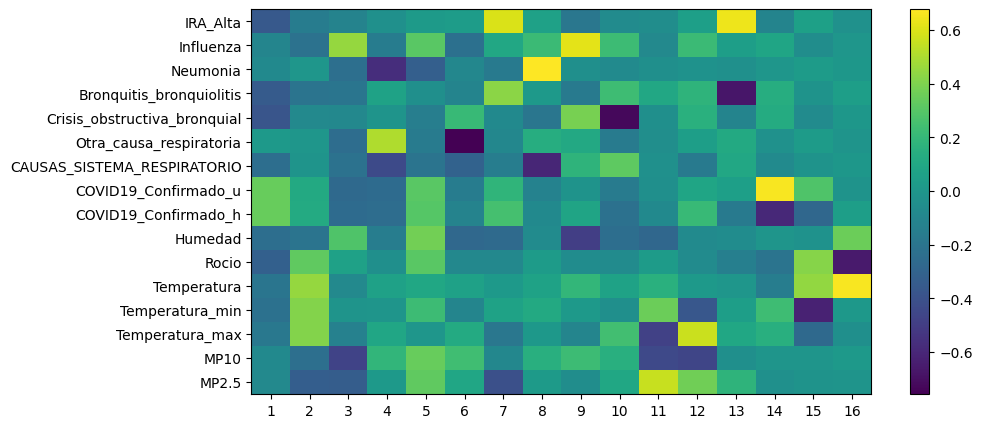

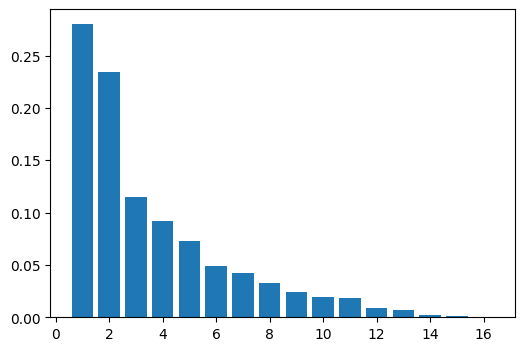

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.28016922 0.51435611 0.62953278 0.72112481 0.7942299  0.84333021
 0.88523239 0.918274   0.9428594  0.96231717 0.98039522 0.98949253
 0.99666269 0.9984874  0.999885   1.        ]


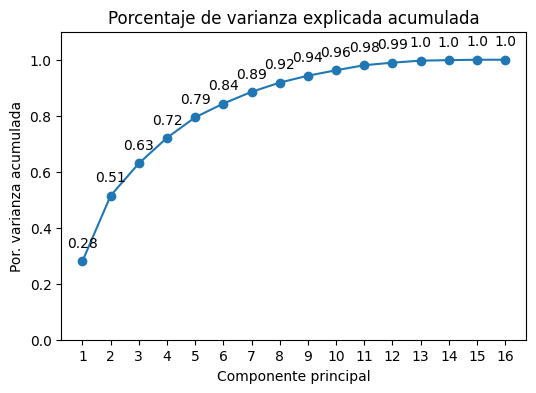

'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1 -0.358751  -0.105541 -0.078256                 -0.346128   
PC2 -0.154894  -0.214835 -0.001898                 -0.205987   
PC3 -0.118232   0.452353 -0.231568                 -0.202353   
PC4 -0.039969  -0.156812 -0.572274                  0.070892   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                     -0.380546                 0.016542   
PC2                     -0.083862                -0.005553   
PC3                     -0.085315                -0.247279   
PC4                     -0.014756                 0.505786   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                    -0.237145              0.345841              0.344437   
PC2                    -0.012057              0.114881              0.122488   
PC3                    -0.218502             -0.269886             -0.254318   
PC4                    -0.434519             -0.254836             -0.245434   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1 -0.239638 -0.317398    -0.197648        -0.224160        -0.185415   
PC2 -0.206632  0.328236     0.450691         0.409317         0.410544   
PC3  0.281157  0.063043    -0.079611        -0.013758        -0.125625   
PC4 -0.146911 -0.040104     0.062889        -0.006396         0.089640   

         MP10     MP2.5  
PC1 -0.075425 -0.084336  
PC2 -0.234796 -0.327469  
PC3 -0.466528 -0.331907  
PC4  0.188948  0.018471

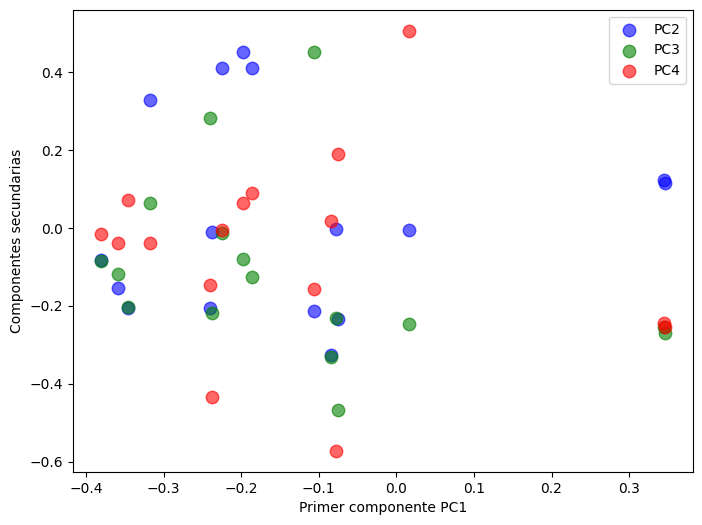

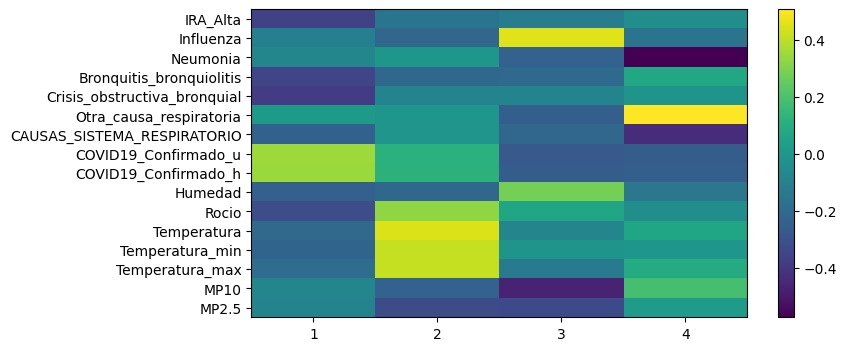

In [27]:
algoritmo_dataframe(diccionario['mar_abrDFtotaltodos'])

### - Categoria: Todas las edades
### - Periodo: Mayo - Junio (8 semanas por 5 años, 2017-2021)

----------------------
Media de cada variable
----------------------
IRA_Alta                        113.475
Influenza                        10.975
Neumonia                          9.450
Bronquitis_bronquiolitis         50.050
Crisis_obstructiva_bronquial     24.275
Otra_causa_respiratoria          13.025
CAUSAS_SISTEMA_RESPIRATORIO      10.825
COVID19_Confirmado_u              8.375
COVID19_Confirmado_h              4.775
Humedad                          65.915
Rocio                             7.385
Temperatura                      14.675
Temperatura_min                   9.550
Temperatura_max                  22.525
MP10                             54.360
MP2.5                            17.145
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        3014.460897
Influenza                        139.153205
Neumonia                          41.023077
Bronquitis_bronquiolitis        1835.125641
Crisis_obstructiva_bro

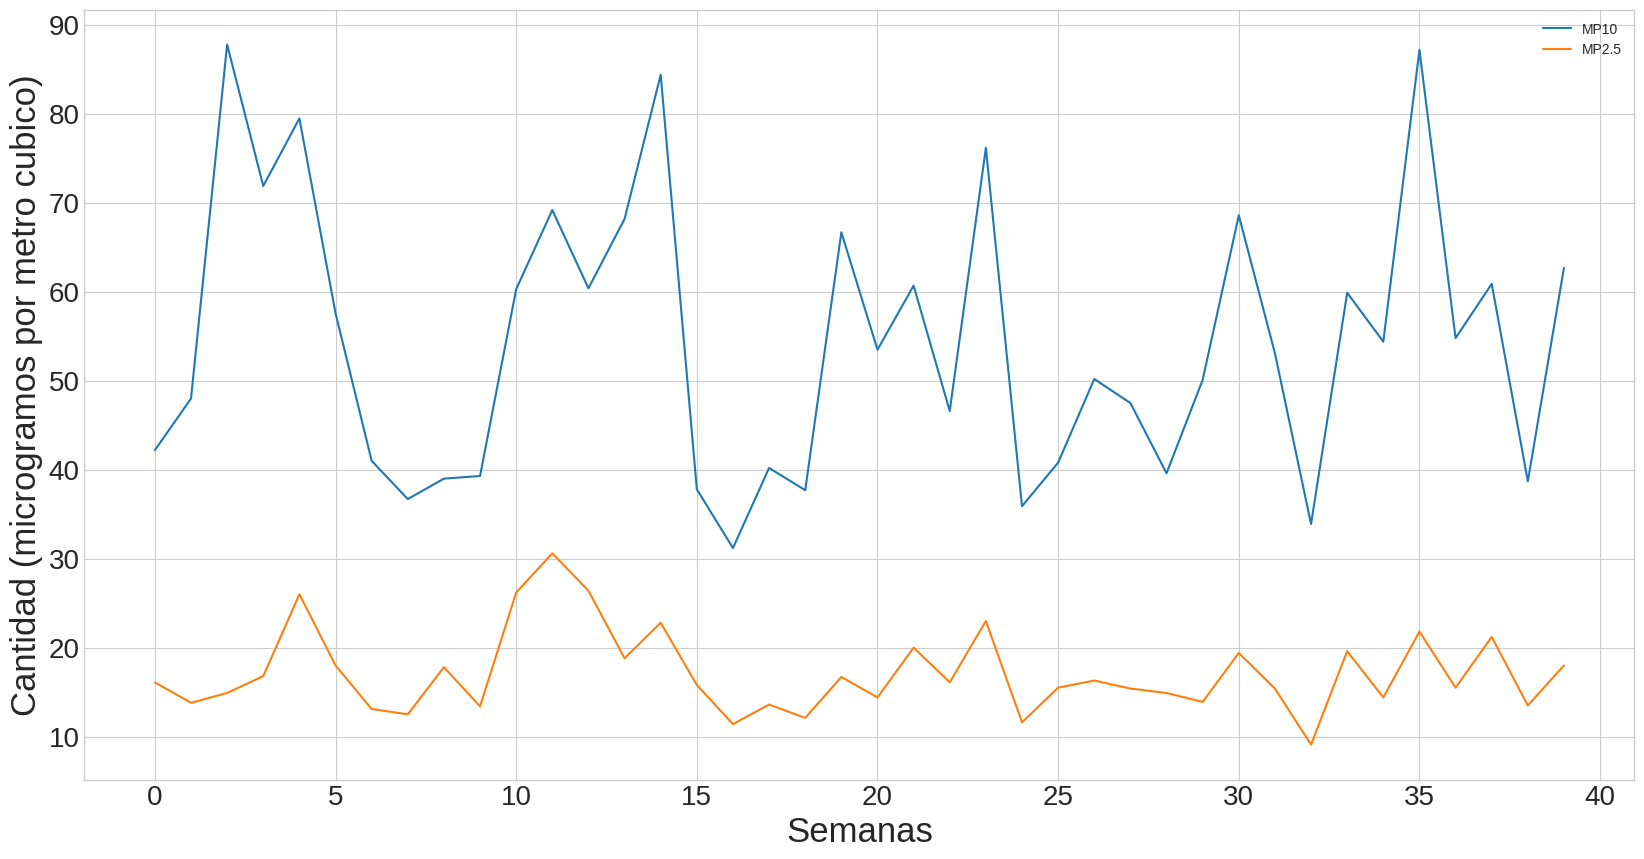

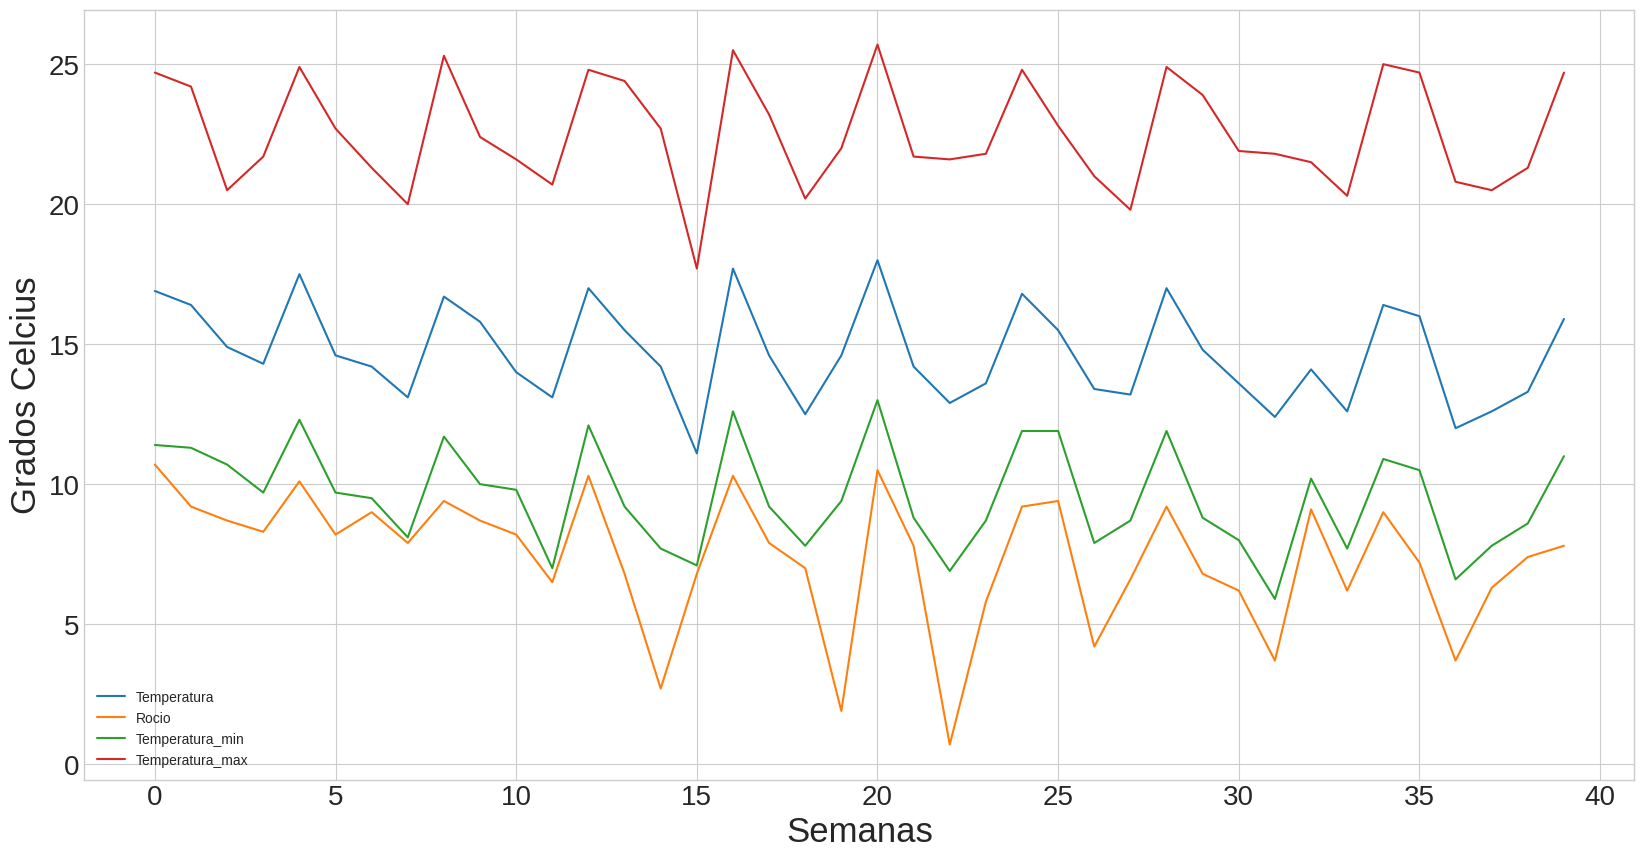

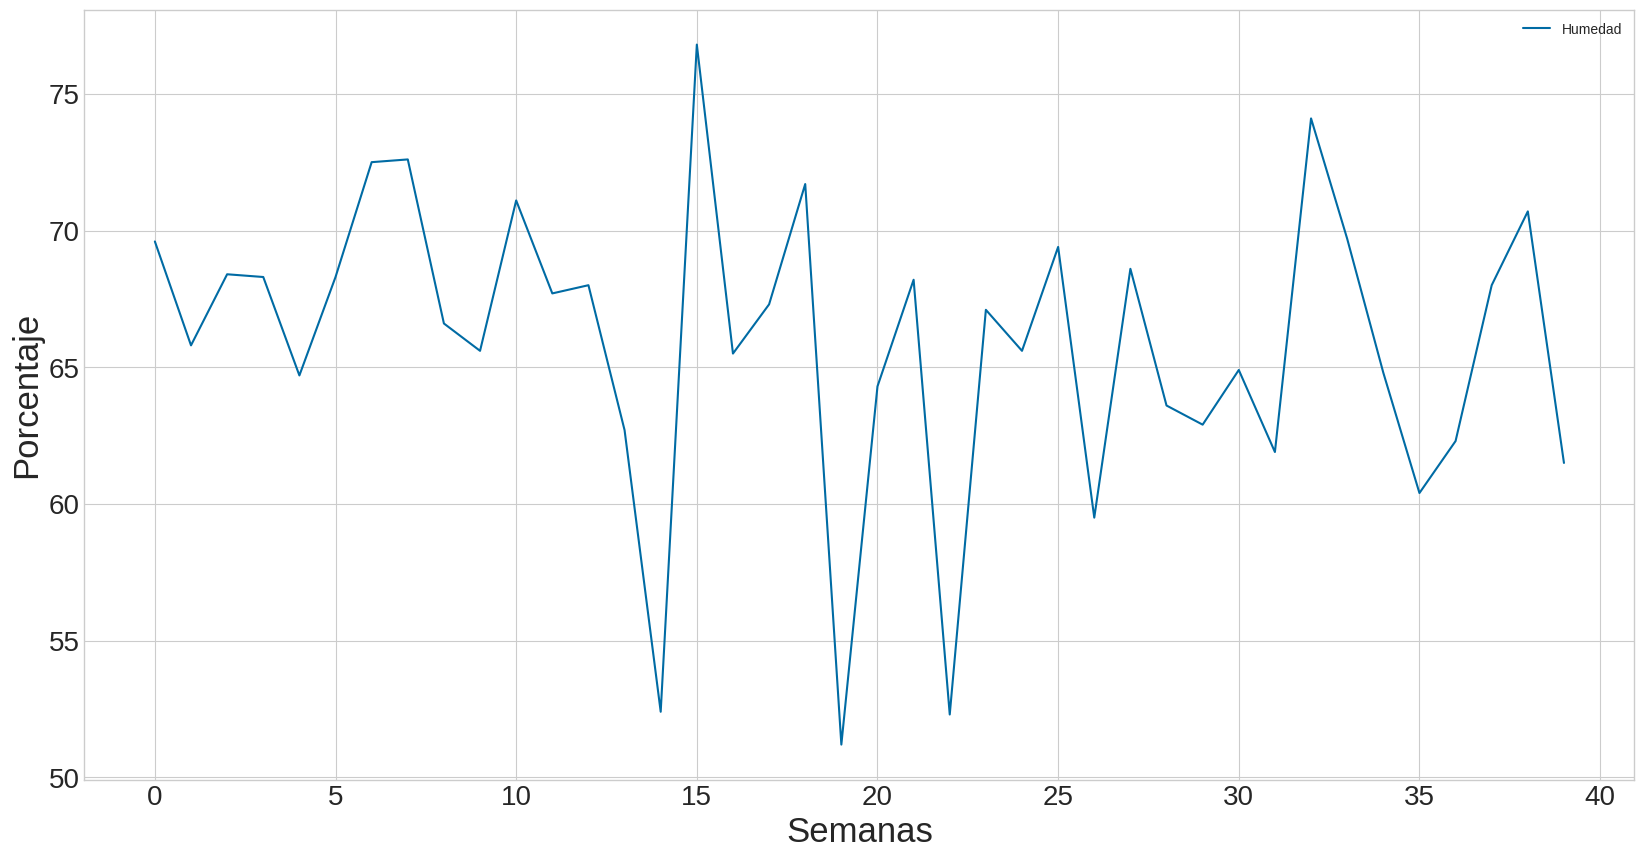

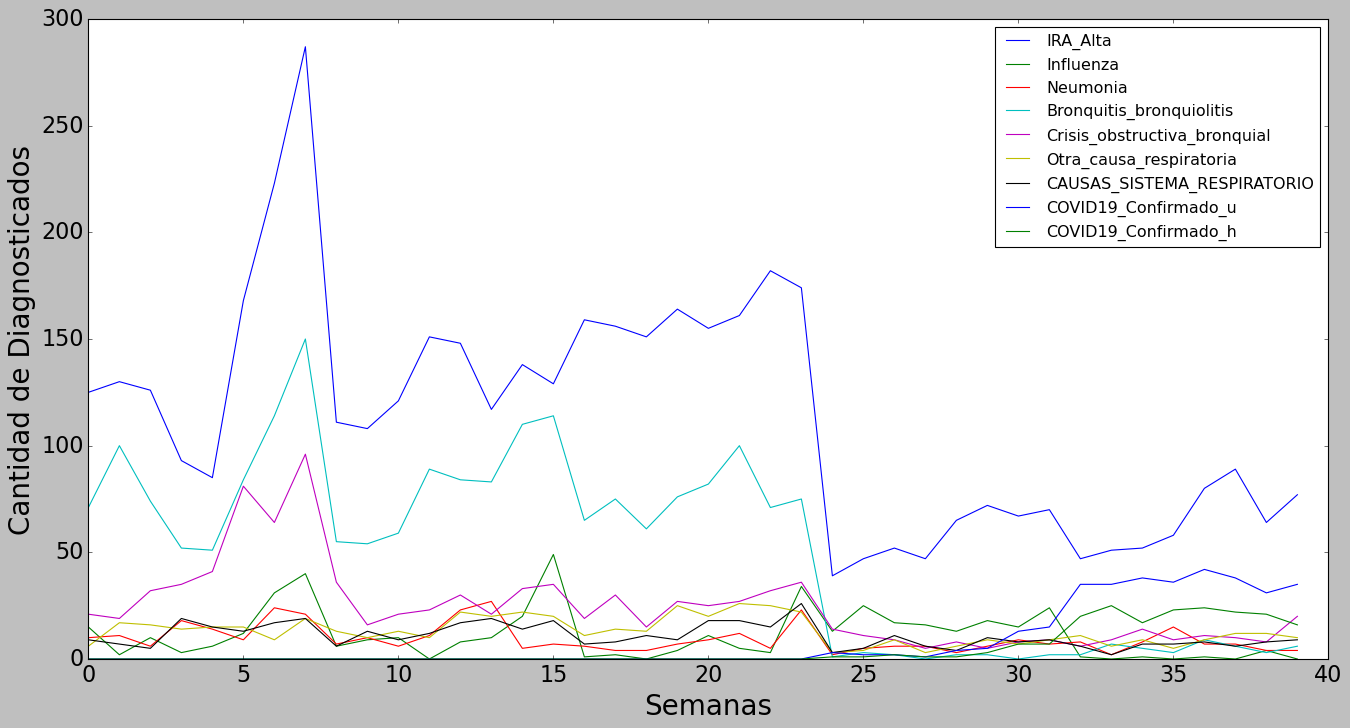

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0   0.212586   0.345555  0.086965                  0.495278   
1   0.304814  -0.770523  0.245084                  1.180865   
2   0.231031  -0.083706 -0.545510                  0.566201   
3  -0.377674  -0.684671  1.351916                  0.046100   
4  -0.525239  -0.427114  0.719441                  0.022459   
5   1.005747   0.087998 -0.071153                  0.802610   
6   2.020255   1.719189  2.300629                  1.511838   
7   3.200773   2.491858  1.826272                  2.362912   
8  -0.045653  -0.427114 -0.387391                  0.117023   
9  -0.100990  -0.169558  0.086965                  0.093382   
10  0.138803  -0.083706 -0.545510                  0.211586   
11  0.692171  -0.942227  0.245084                  0.920815   
12  0.636834  -0.255410  2.142510                  0.802610   
13  0.065021  -0.083706  2.774985                  0.778969   
14  0.452378   0.774815 -0.703629                  1.417275   
15  0.286368   3.264527 -0.387391                  1.511838   
16  0.839736  -0.856375 -0.545510                  0.353432   
17  0.784399  -0.770523 -0.861748                  0.589842   
18  0.692171  -0.942227 -0.861748                  0.258868   
19  0.931964  -0.598819 -0.387391                  0.613482   
20  0.765954   0.002146 -0.071153                  0.755328   
21  0.876627  -0.512966  0.403203                  1.180865   
22  1.263985  -0.684671 -0.703629                  0.495278   
23  1.116420   1.976745  2.142510                  0.589842   
24 -1.373736   0.173851 -1.177985                 -1.159588   
25 -1.226171   1.204076 -0.703629                 -1.112306   
26 -1.133943   0.517259 -0.545510                 -1.135947   
27 -1.226171   0.431407 -0.545510                 -1.183229   
28 -0.894151   0.173851 -1.019866                 -1.135947   
29 -0.765031   0.603111 -0.545510                 -1.135947   
30 -0.857259   0.345555 -0.071153                 -1.183229   
31 -0.801923   1.118224 -0.387391                 -1.135947   
32 -1.226171  -0.856375 -0.229272                 -1.135947   
33 -1.152389  -0.942227 -1.177985                 -1.017743   
34 -1.133943  -0.856375 -0.229272                 -1.065024   
35 -1.023270  -0.942227  0.877559                 -1.112306   
36 -0.617467  -0.856375 -0.387391                 -0.970461   
37 -0.451456  -0.942227 -0.387391                 -1.041384   
38 -0.912596  -0.598819 -0.861748                 -1.112306   
39 -0.672803  -0.942227 -0.861748                 -1.041384   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                      -0.170053                -1.118121   
1                      -0.273902                 0.632673   
2                       0.401116                 0.473510   
3                       0.556890                 0.155184   
4                       0.868437                 0.314347   
5                       2.945415                 0.314347   
6                       2.062699                -0.640631   
7                       3.724282                 0.950999   
8                       0.608814                -0.003979   
9                      -0.429675                -0.481468   
10                     -0.170053                -0.003979   
11                     -0.066204                -0.481468   
12                      0.297268                 1.428489   
13                     -0.170053                 1.110163   
14                      0.453041                 1.428489   
15                      0.556890                 1.110163   
16                     -0.273902                -0.322305   
17                      0.297268                 0.155184   
18                     -0.481599                -0.003979   
19                      0.141494                 1.905978   
20                      0.037645                 1.110163   
21                      0.141494                 2.065141   
22               

'     *** DataFrame con todos los componentes principales PCA ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1   0.382712   0.224280  0.275875                  0.402305   
PC2  -0.012386  -0.092682  0.061998                  0.028948   
PC3   0.053188   0.291516 -0.111653                  0.019109   
PC4   0.049193  -0.013756 -0.437326                  0.022147   
PC5  -0.341312   0.383434 -0.017290                 -0.182069   
PC6   0.153905  -0.520186 -0.411681                  0.244912   
PC7   0.168565   0.315593 -0.209123                  0.045431   
PC8  -0.227826   0.427071 -0.445466                  0.043335   
PC9  -0.104767  -0.244523  0.239363                 -0.018003   
PC10 -0.274826  -0.290121 -0.249593                 -0.464506   
PC11 -0.198213   0.005690  0.411126                 -0.252902   
PC12 -0.525690  -0.006050  0.106836                  0.284329   
PC13 -0.470952  -0.089636 -0.015143                  0.573457   
PC14  0.048370   0.051757  0.041985                 -0.188576   
PC15  0.036504   0.032733 -0.027247                 -0.116420   
PC16  0.004274  -0.022760 -0.040157                 -0.022904   

      Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                       0.346198                 0.316000   
PC2                       0.026128                -0.077546   
PC3                       0.093799                -0.222625   
PC4                      -0.116297                 0.119426   
PC5                      -0.239081                -0.318606   
PC6                       0.033001                 0.108145   
PC7                       0.635021                -0.375096   
PC8                      -0.046228                 0.555894   
PC9                       0.054386                -0.079066   
PC10                      0.544755                 0.018598   
PC11                      0.211634                 0.350416   
PC12                      0.205608                 0.213533   
PC13                      0.069036                -0.248735   
PC14                      0.022335                 0.161855   
PC15                      0.029631                 0.060995   
PC16                      0.024121                -0.024782   

      CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                      0.363761             -0.313703             -0.310160   
PC2                     -0.060513             -0.155337             -0.175721   
PC3                     -0.095834             -0.062213             -0.054293   
PC4                     -0.165344             -0.347379             -0.360716   
PC5                     -0.001096             -0.400276             -0.386187   
PC6                     -0.325957             -0.151583             -0.106282   
PC7                     -0.382796              0.112138              0.095351   
PC8                      0.059335              0.153203              0.132985   
PC9                     -0.126385             -0.164945             -0.138273   
PC10                     0.481897             -0.063820             -0.119640   
PC11                    -0.435551             -0.082372             -0.009726   
PC12                    -0.271671             -0.040029             -0.067362   
PC13                     0.221948              0.042044              0.130546   
PC14                    -0.095272              0.242342             -0.222397   
PC15                     0.003952             -0.643032              0.657444   
PC16                     0.033609              0.141490             -0.125878   

       Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1   0.037885 -0.003985    -0.022211        -0.031991        -0.067816   
PC2   0.057869  0.438344     0.507091         0.508754         0.440207   
PC3   0.476666  0.217209    -0.169152        -0.038529        -0.256970   
PC4  -0.474175 -0.334232     0.047216        -0.042958         0.079366   
PC5   0.104302  0.045898    -0.041985        -0.024671        -0.116473   


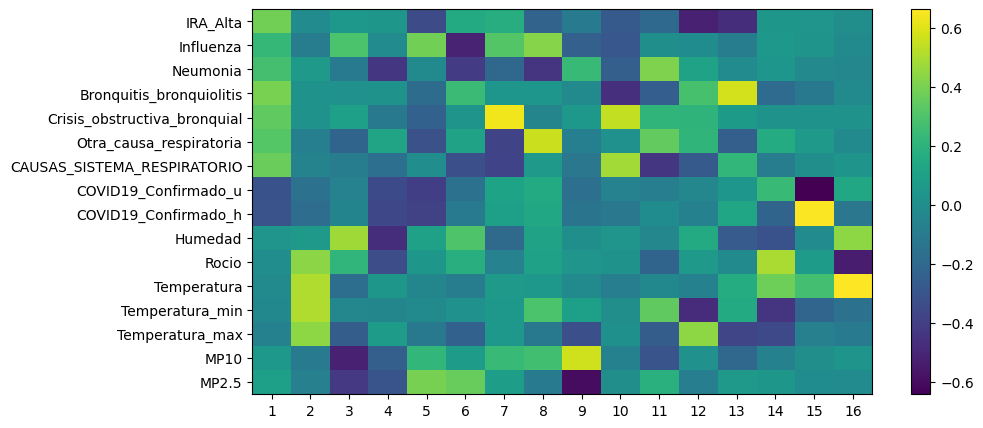

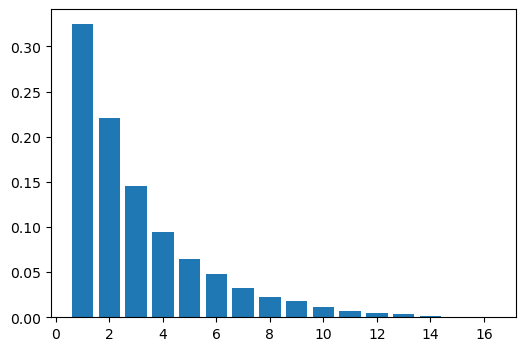

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.32480962 0.54560271 0.69094571 0.78488169 0.84893581 0.89695405
 0.92961841 0.95238574 0.97085059 0.9820431  0.98933815 0.99442566
 0.99803282 0.99904716 0.99983022 1.        ]


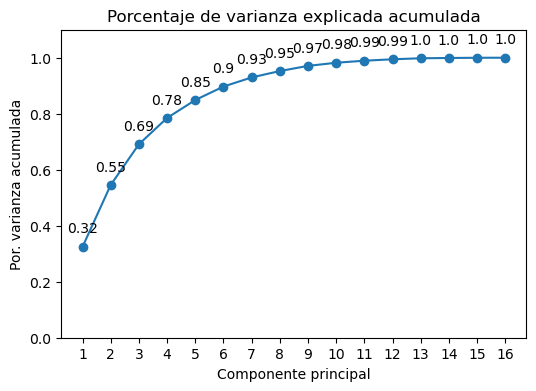

'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1  0.382712   0.224280  0.275875                  0.402305   
PC2 -0.012386  -0.092682  0.061998                  0.028948   
PC3  0.053188   0.291516 -0.111653                  0.019109   
PC4  0.049193  -0.013756 -0.437326                  0.022147   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                      0.346198                 0.316000   
PC2                      0.026128                -0.077546   
PC3                      0.093799                -0.222625   
PC4                     -0.116297                 0.119426   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                     0.363761             -0.313703             -0.310160   
PC2                    -0.060513             -0.155337             -0.175721   
PC3                    -0.095834             -0.062213             -0.054293   
PC4                    -0.165344             -0.347379             -0.360716   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1  0.037885 -0.003985    -0.022211        -0.031991        -0.067816   
PC2  0.057869  0.438344     0.507091         0.508754         0.440207   
PC3  0.476666  0.217209    -0.169152        -0.038529        -0.256970   
PC4 -0.474175 -0.334232     0.047216        -0.042958         0.079366   

         MP10     MP2.5  
PC1  0.051248  0.091871  
PC2 -0.102521 -0.073826  
PC3 -0.523528 -0.424728  
PC4 -0.246709 -0.303216

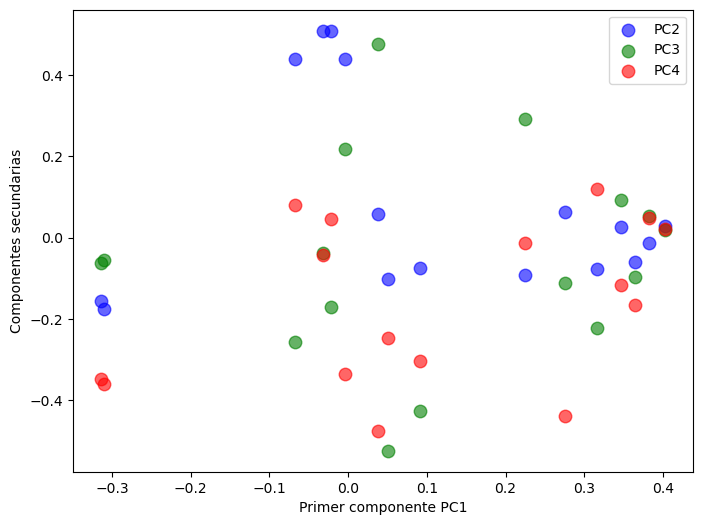

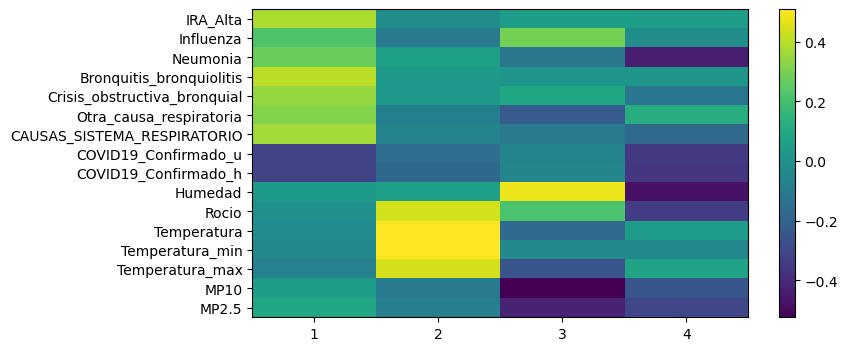

In [16]:
algoritmo_dataframe(diccionario['may_junDFtotaltodos'])

### - Categoria: Todas las edades
### - Periodo: Julio - Agosto (9 semanas por 5 años, 2017-2021)

----------------------
Media de cada variable
----------------------
IRA_Alta                        121.488889
Influenza                        19.555556
Neumonia                         13.400000
Bronquitis_bronquiolitis         59.088889
Crisis_obstructiva_bronquial     30.422222
Otra_causa_respiratoria          14.222222
CAUSAS_SISTEMA_RESPIRATORIO      15.600000
COVID19_Confirmado_u              7.088889
COVID19_Confirmado_h              3.688889
Humedad                          66.402222
Rocio                             7.342222
Temperatura                      14.486667
Temperatura_min                   9.391111
Temperatura_max                  22.582222
MP10                             50.020000
MP2.5                            17.953333
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        6081.937374
Influenza                        577.570707
Neumonia                          93.927273
Bronquitis_bronqui

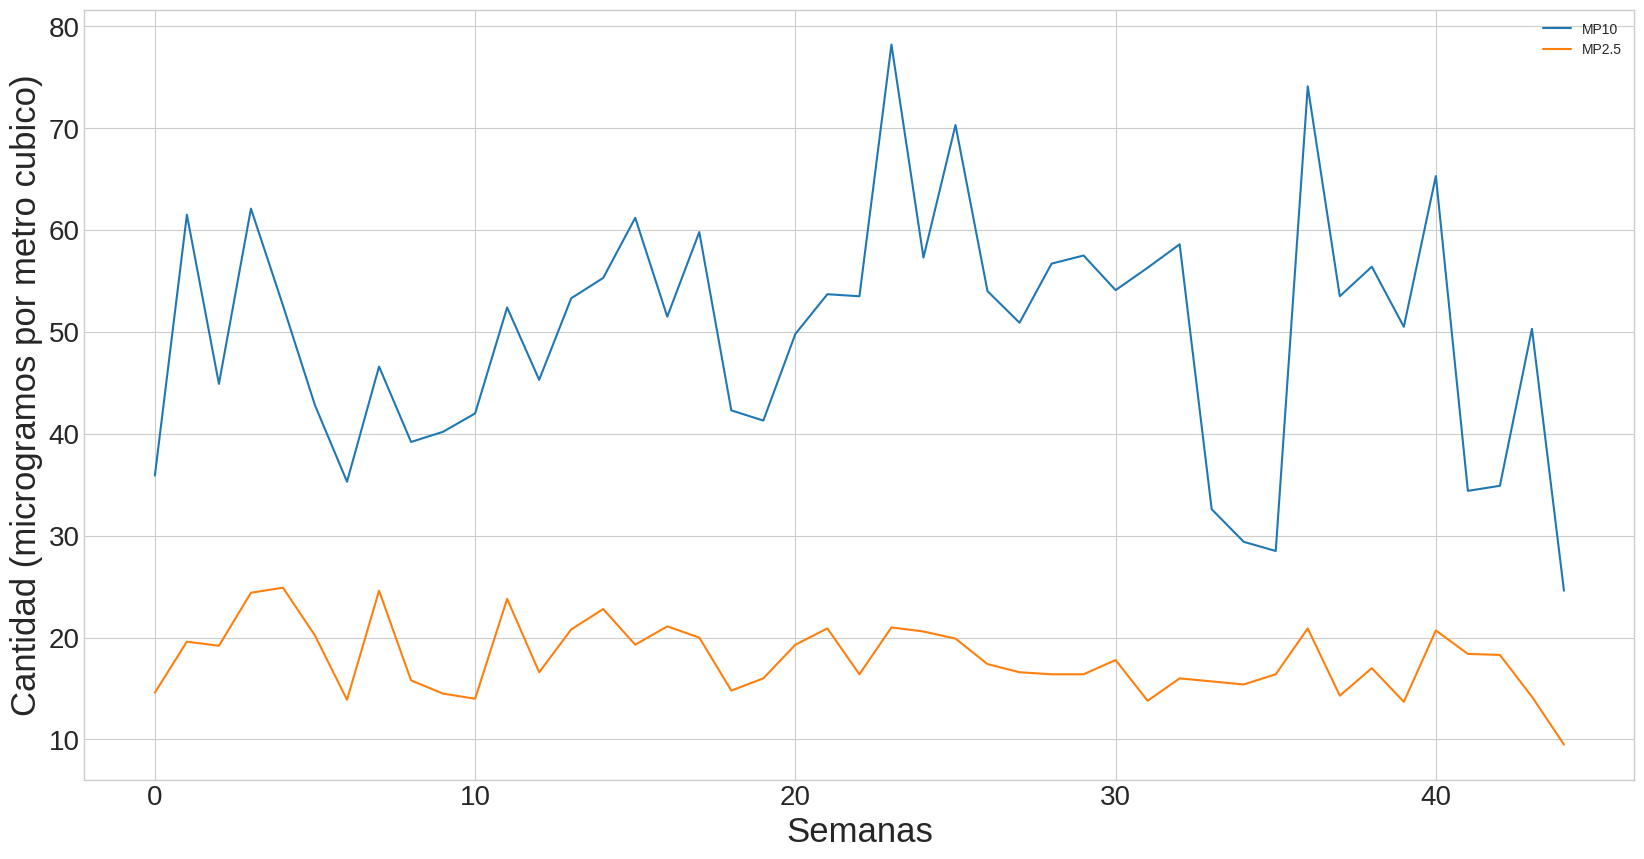

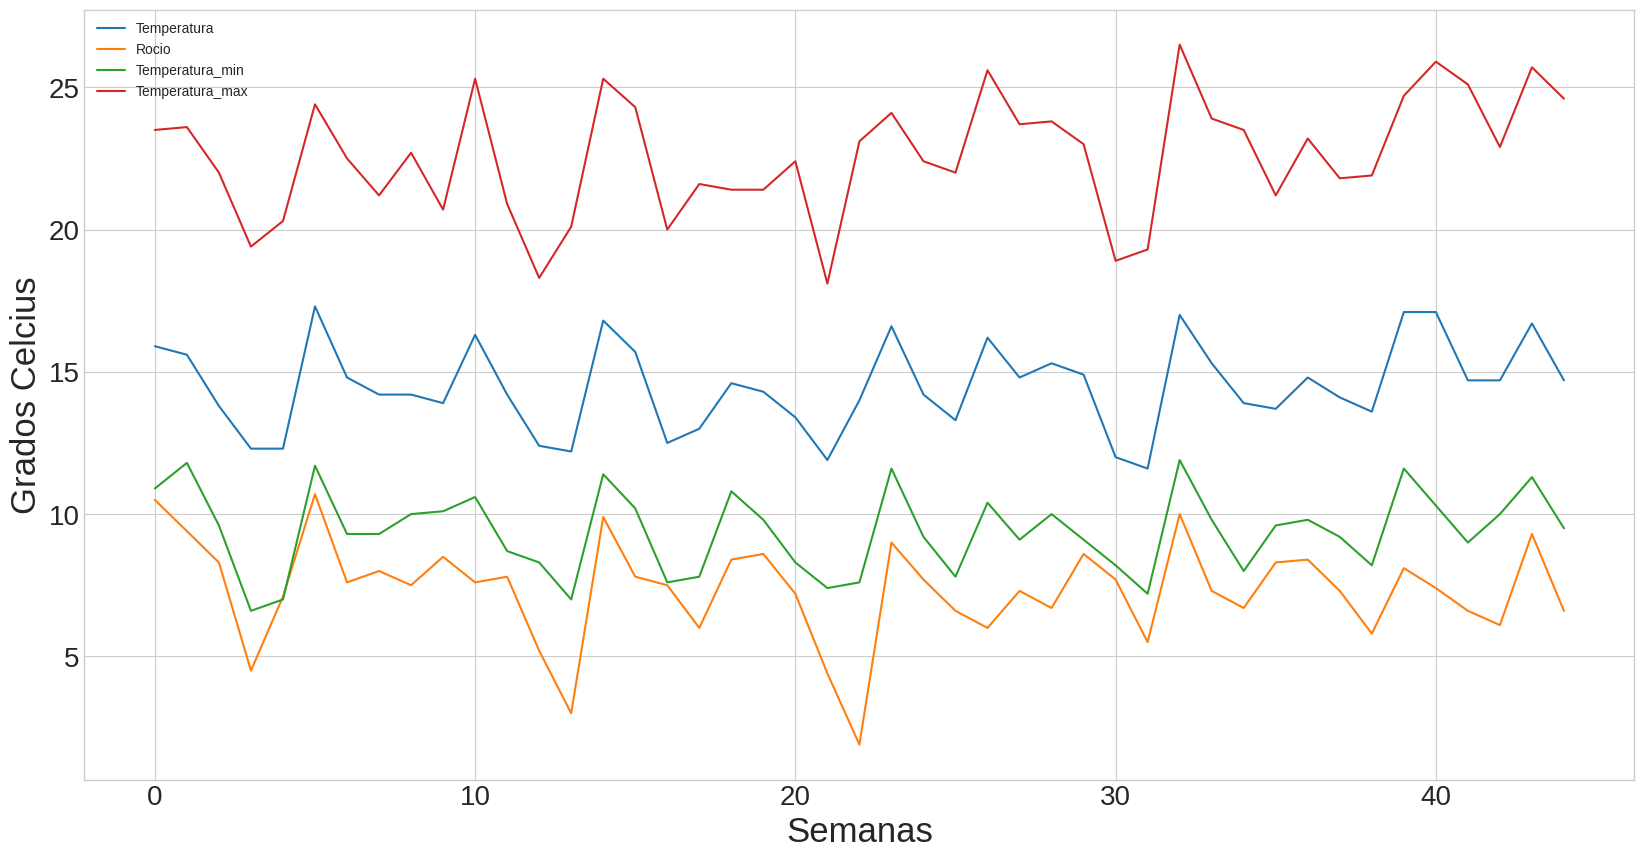

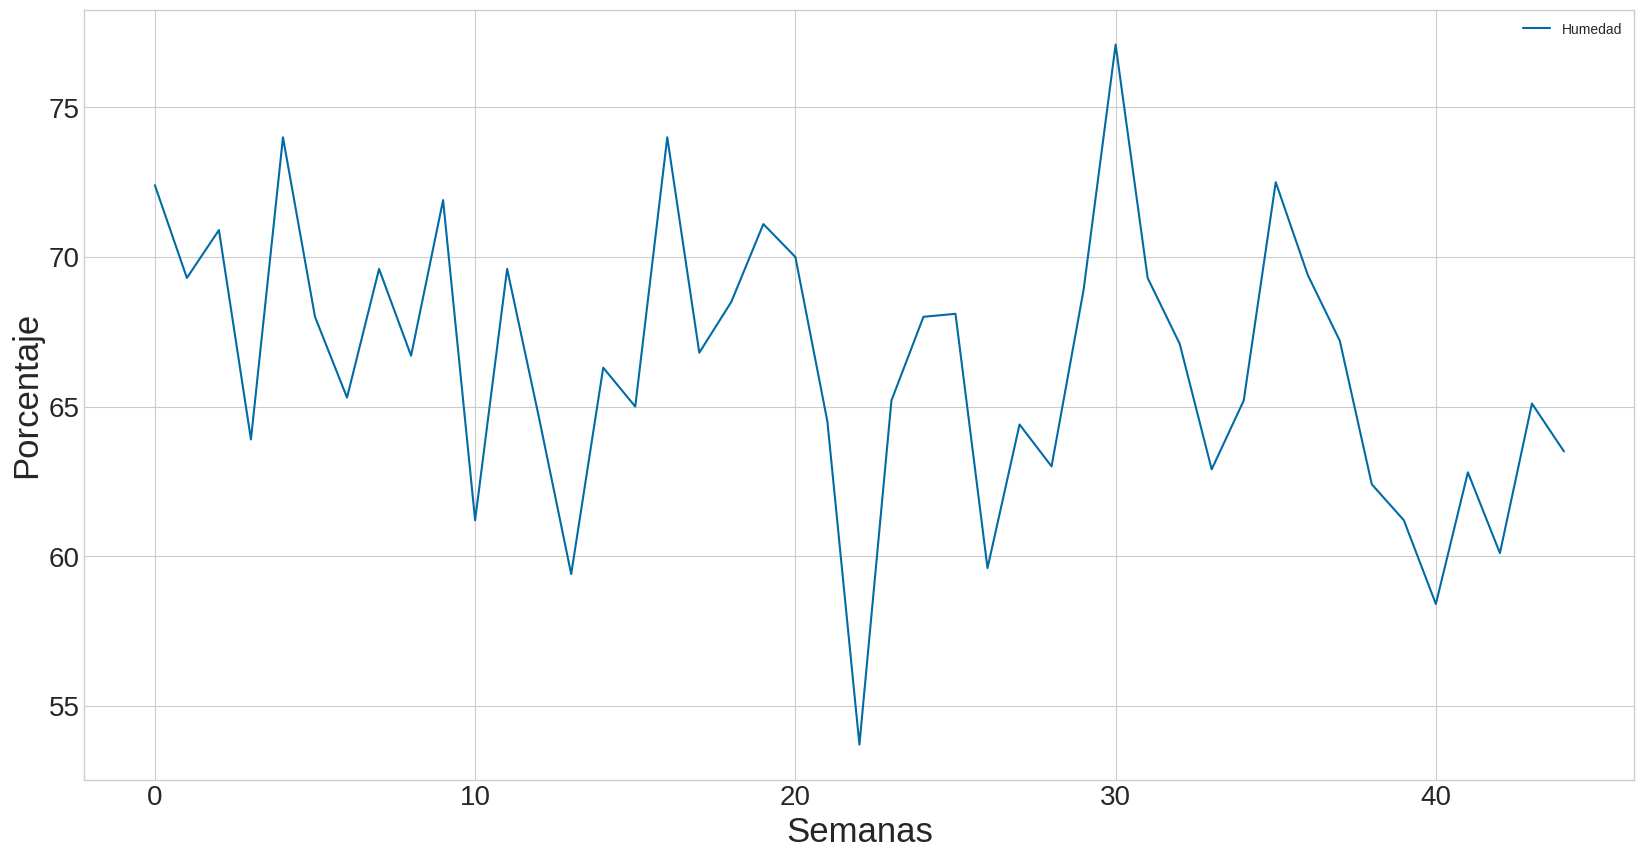

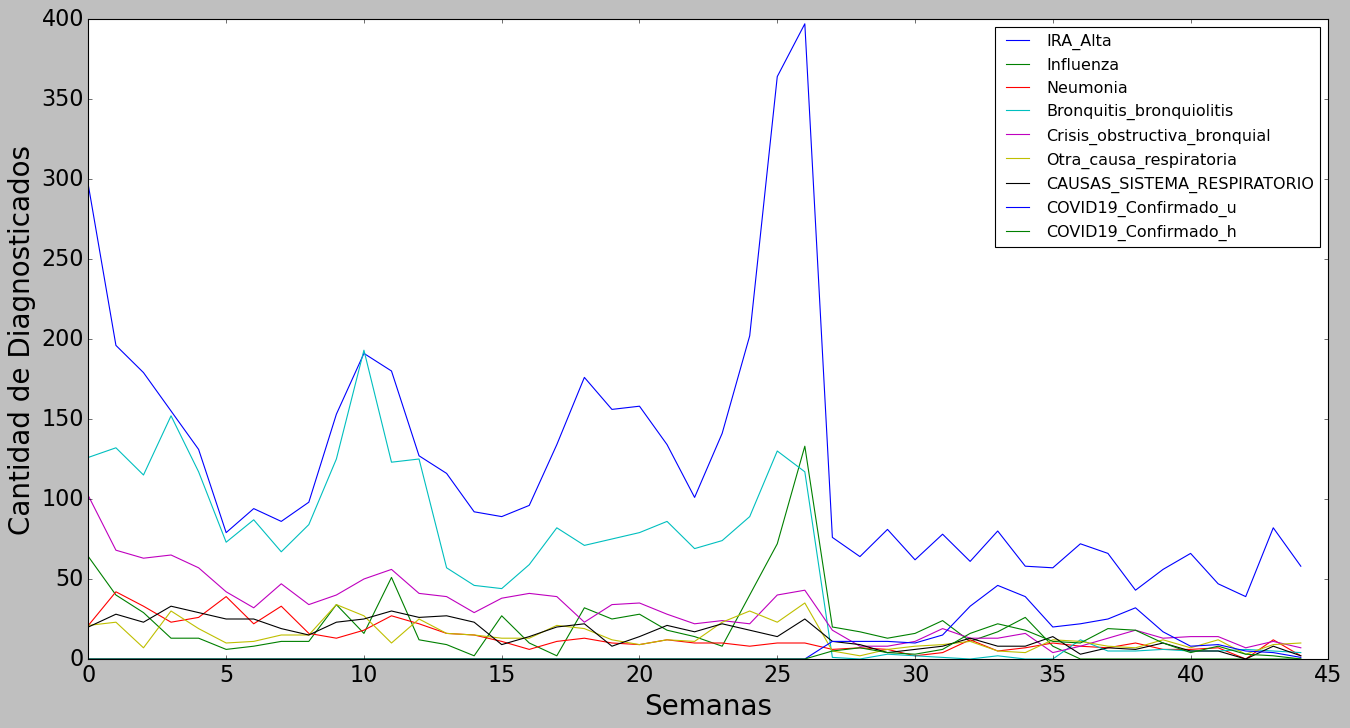

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0   2.262987   1.870229  0.793045                  1.268516   
1   0.966229   0.860305  2.984352                  1.382266   
2   0.745780   0.397424  2.045220                  1.059976   
3   0.434558  -0.275859  1.001741                  1.761430   
4   0.123336  -0.275859  1.314785                  1.097892   
5  -0.550978  -0.570420  2.671308                  0.263730   
6  -0.356464  -0.486260  0.897393                  0.529145   
7  -0.460205  -0.360019  2.045220                  0.149981   
8  -0.304594  -0.360019  0.271305                  0.472271   
9   0.408623   0.607824 -0.041739                  1.249558   
10  0.901391  -0.149618  0.480001                  2.538718   
11  0.758748   1.323187  1.419133                  1.211641   
12  0.071466  -0.317939  0.897393                  1.249558   
13 -0.071178  -0.444179  0.271305                 -0.039602   
14 -0.382400  -0.738741  0.166957                 -0.248142   
15 -0.421302   0.313263 -0.250435                 -0.286059   
16 -0.330529  -0.402099 -0.772175                 -0.001685   
17  0.162239  -0.738741 -0.250435                  0.434354   
18  0.706877   0.523664 -0.041739                  0.225814   
19  0.447526   0.229103 -0.354783                  0.301646   
20  0.473461   0.355344 -0.459131                  0.377479   
21  0.162239  -0.065458 -0.146087                  0.510187   
22 -0.265691  -0.233779 -0.354783                  0.187897   
23  0.253012  -0.486260 -0.354783                  0.282688   
24  1.044034   0.860305 -0.563479                  0.567062   
25  3.144782   2.206870 -0.354783                  1.344349   
26  3.572712   4.773760 -0.354783                  1.097892   
27 -0.589881   0.018702 -0.772175                 -1.101262   
28 -0.745492  -0.107538 -0.667827                 -1.120221   
29 -0.525043  -0.275859 -0.772175                 -1.063346   
30 -0.771427  -0.149618 -1.189567                 -1.082304   
31 -0.563946   0.187023 -0.980871                 -1.101262   
32 -0.784395  -0.360019 -0.146087                 -1.120221   
33 -0.538010  -0.107538 -0.876523                 -1.082304   
34 -0.823297   0.271183 -0.667827                 -1.120221   
35 -0.836265  -0.486260 -0.354783                 -1.120221   
36 -0.641751  -0.822901 -0.563479                 -0.892722   
37 -0.719557  -0.822901 -0.667827                 -1.025430   
38 -1.017811  -0.822901 -0.354783                 -1.025430   
39 -0.849232  -0.822901 -0.772175                 -1.006471   
40 -0.719557  -0.822901 -0.772175                 -1.025430   
41 -0.965941  -0.822901 -0.667827                 -1.025430   
42 -1.069681  -0.822901 -1.398263                 -1.006471   
43 -0.512075  -0.822901 -0.146087                 -1.025430   
44 -0.823297  -0.822901 -1.189567                 -1.044388   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                       3.533158                 0.826015   
1                       1.854880                 1.069758   
2                       1.608075                -0.880180   
3                       1.706797                 1.922856   
4                       1.311908                 0.582273   
5                       0.571492                -0.514567   
6                       0.077881                -0.392696   
7                       0.818297                 0.094789   
8                       0.176603                 0.094789   
9                       0.472770                 2.410340   
10                      0.966381                 1.557242   
11                      1.262547                -0.514567   
12                      0.522131                 1.313500   
13                      0.423409                 0.216660   
14                     -0.070202                 0.094789   
15                      0.374047                -0.148954   
16                      0.522131                -0.148954   
17     

'     *** DataFrame con todos los componentes principales PCA ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1  -0.315400  -0.226627 -0.270198                 -0.385928   
PC2  -0.117575  -0.117025 -0.132676                 -0.038502   
PC3   0.300739   0.333420 -0.335919                  0.060532   
PC4   0.242489   0.362900 -0.108915                  0.051903   
PC5  -0.265410  -0.338287  0.184788                  0.101377   
PC6  -0.039797   0.000403  0.407588                  0.121073   
PC7  -0.158427  -0.384567 -0.144419                  0.150863   
PC8  -0.051047   0.087718 -0.255140                 -0.094917   
PC9   0.026429  -0.385342 -0.269193                  0.273047   
PC10 -0.081525   0.103406  0.260937                 -0.180715   
PC11  0.099106  -0.092728 -0.536247                  0.224757   
PC12  0.334682  -0.179656  0.225054                  0.609556   
PC13 -0.680401   0.427482 -0.082181                  0.494142   
PC14 -0.018526   0.061796  0.106338                 -0.058333   
PC15 -0.168319   0.134921 -0.023590                  0.094623   
PC16  0.130096  -0.131287  0.032826                 -0.026354   

      Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                      -0.354063                -0.309804   
PC2                      -0.066855                -0.075382   
PC3                      -0.116636                 0.220171   
PC4                       0.098773                 0.072282   
PC5                       0.049333                -0.086884   
PC6                       0.224531                -0.011732   
PC7                      -0.231744                 0.680995   
PC8                      -0.253342                 0.334900   
PC9                       0.558203                 0.154464   
PC10                      0.216337                 0.301316   
PC11                      0.218561                -0.328568   
PC12                     -0.514309                -0.156255   
PC13                     -0.017448                -0.020531   
PC14                     -0.064733                 0.114527   
PC15                     -0.029559                -0.018646   
PC16                     -0.005507                 0.011492   

      CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                     -0.352729              0.310325              0.311582   
PC2                     -0.023161              0.016083              0.011965   
PC3                     -0.058775             -0.027642             -0.017429   
PC4                     -0.086271              0.194773              0.176231   
PC5                      0.129441             -0.304250             -0.277898   
PC6                      0.328800              0.498342              0.517179   
PC7                      0.224129              0.108545              0.138455   
PC8                      0.095789              0.013135              0.005051   
PC9                     -0.400611              0.040977              0.080088   
PC10                    -0.589203             -0.050258              0.060911   
PC11                     0.193401              0.041314              0.068310   
PC12                    -0.333447              0.025497              0.079340   
PC13                    -0.105469              0.187084             -0.177155   
PC14                    -0.106175              0.059234             -0.102967   
PC15                     0.011698             -0.673379              0.661955   
PC16                    -0.033167              0.115590             -0.079120   

       Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1  -0.103535  0.011043     0.092946         0.060149         0.144812   
PC2   0.035394 -0.421064    -0.520020        -0.523013        -0.453154   
PC3  -0.566077 -0.431226     0.077324        -0.072872         0.208703   
PC4   0.351652  0.138635    -0.179608        -0.027259        -0.152920   
PC5  -0.295435 -0.171480     0.032718         0.042213         0.019264   


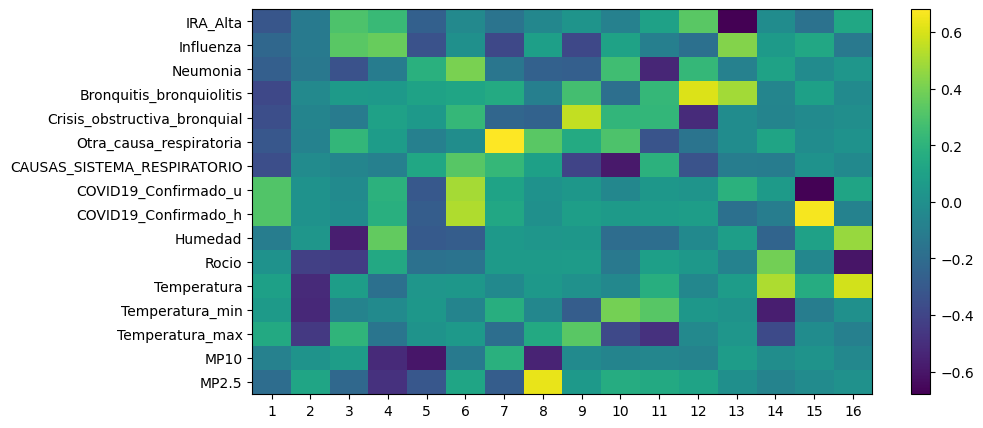

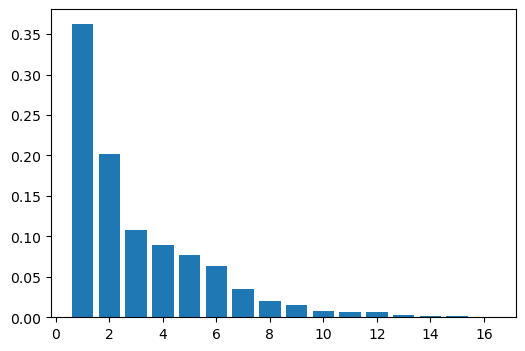

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.36261046 0.56443734 0.67220309 0.76204095 0.83917847 0.90269725
 0.93732206 0.95692445 0.97253831 0.9800498  0.9871771  0.99369312
 0.99639625 0.99831936 0.99951357 1.        ]


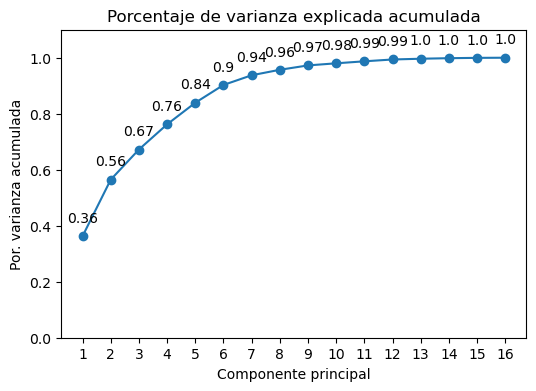

'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1 -0.315400  -0.226627 -0.270198                 -0.385928   
PC2 -0.117575  -0.117025 -0.132676                 -0.038502   
PC3  0.300739   0.333420 -0.335919                  0.060532   
PC4  0.242489   0.362900 -0.108915                  0.051903   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                     -0.354063                -0.309804   
PC2                     -0.066855                -0.075382   
PC3                     -0.116636                 0.220171   
PC4                      0.098773                 0.072282   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                    -0.352729              0.310325              0.311582   
PC2                    -0.023161              0.016083              0.011965   
PC3                    -0.058775             -0.027642             -0.017429   
PC4                    -0.086271              0.194773              0.176231   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1 -0.103535  0.011043     0.092946         0.060149         0.144812   
PC2  0.035394 -0.421064    -0.520020        -0.523013        -0.453154   
PC3 -0.566077 -0.431226     0.077324        -0.072872         0.208703   
PC4  0.351652  0.138635    -0.179608        -0.027259        -0.152920   

         MP10     MP2.5  
PC1 -0.081246 -0.193403  
PC2  0.018988  0.118682  
PC3  0.075886 -0.219718  
PC4 -0.516109 -0.487744

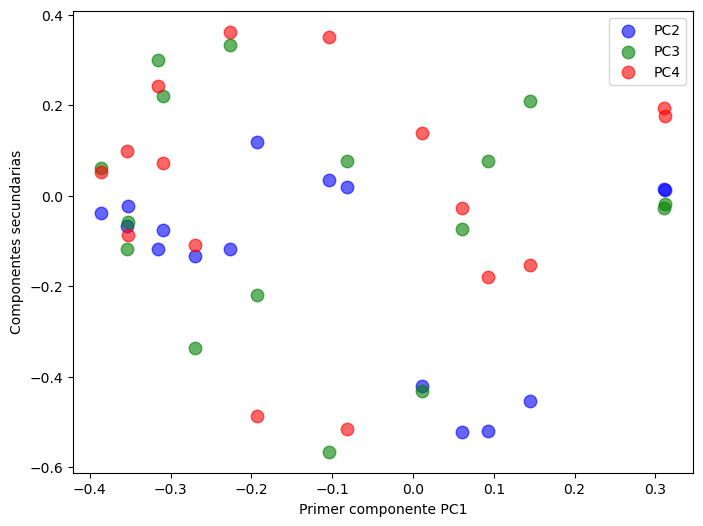

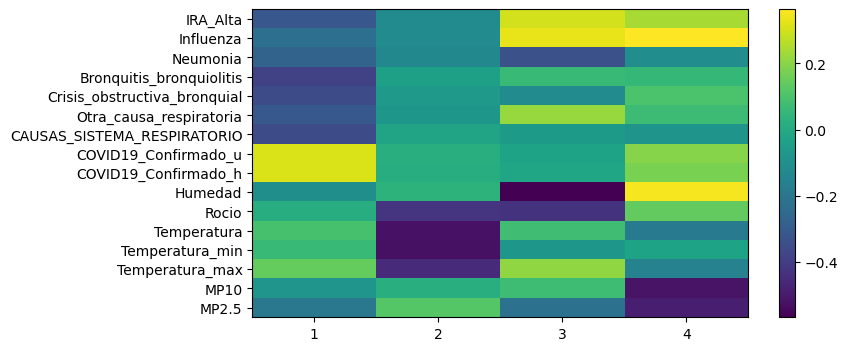

In [17]:
algoritmo_dataframe(diccionario['jul_agoDFtotaltodos'])

### - Categoria: Todas las edades
### - Periodo: Septiembre - Octubre (9 semanas por 5 años, 2017-2021)

----------------------
Media de cada variable
----------------------
IRA_Alta                        103.288889
Influenza                         7.977778
Neumonia                         10.133333
Bronquitis_bronquiolitis         45.933333
Crisis_obstructiva_bronquial     23.133333
Otra_causa_respiratoria          13.600000
CAUSAS_SISTEMA_RESPIRATORIO      11.066667
COVID19_Confirmado_u              2.355556
COVID19_Confirmado_h              1.200000
Humedad                          66.411111
Rocio                             8.622222
Temperatura                      15.677778
Temperatura_min                  10.555556
Temperatura_max                  24.251111
MP10                             36.375556
MP2.5                            12.491111
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        4074.710101
Influenza                        161.840404
Neumonia                          35.981818
Bronquitis_bronqui

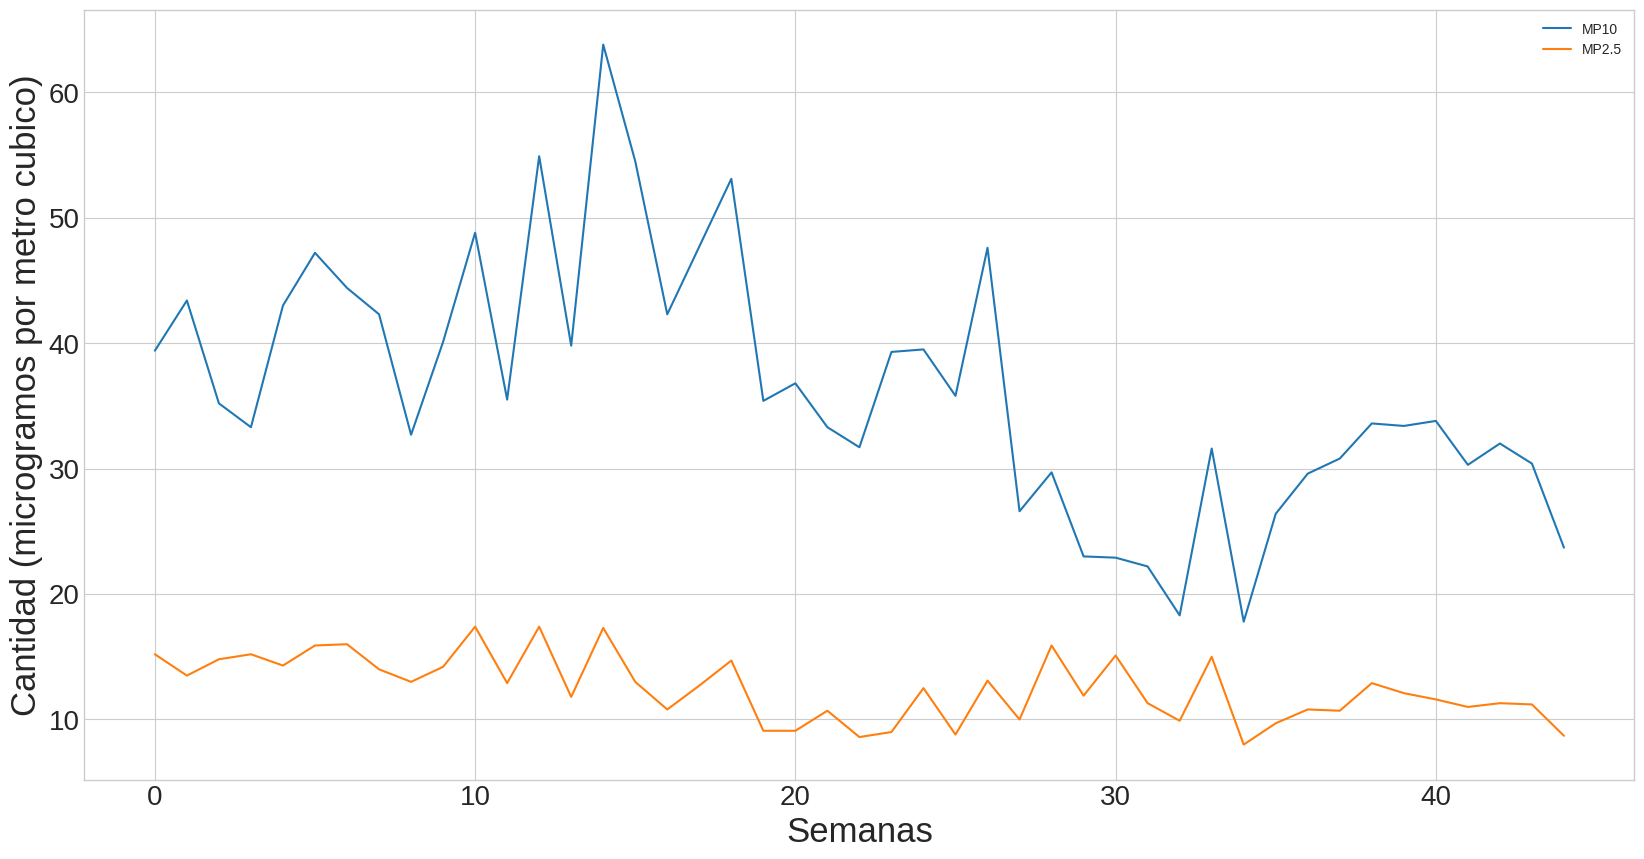

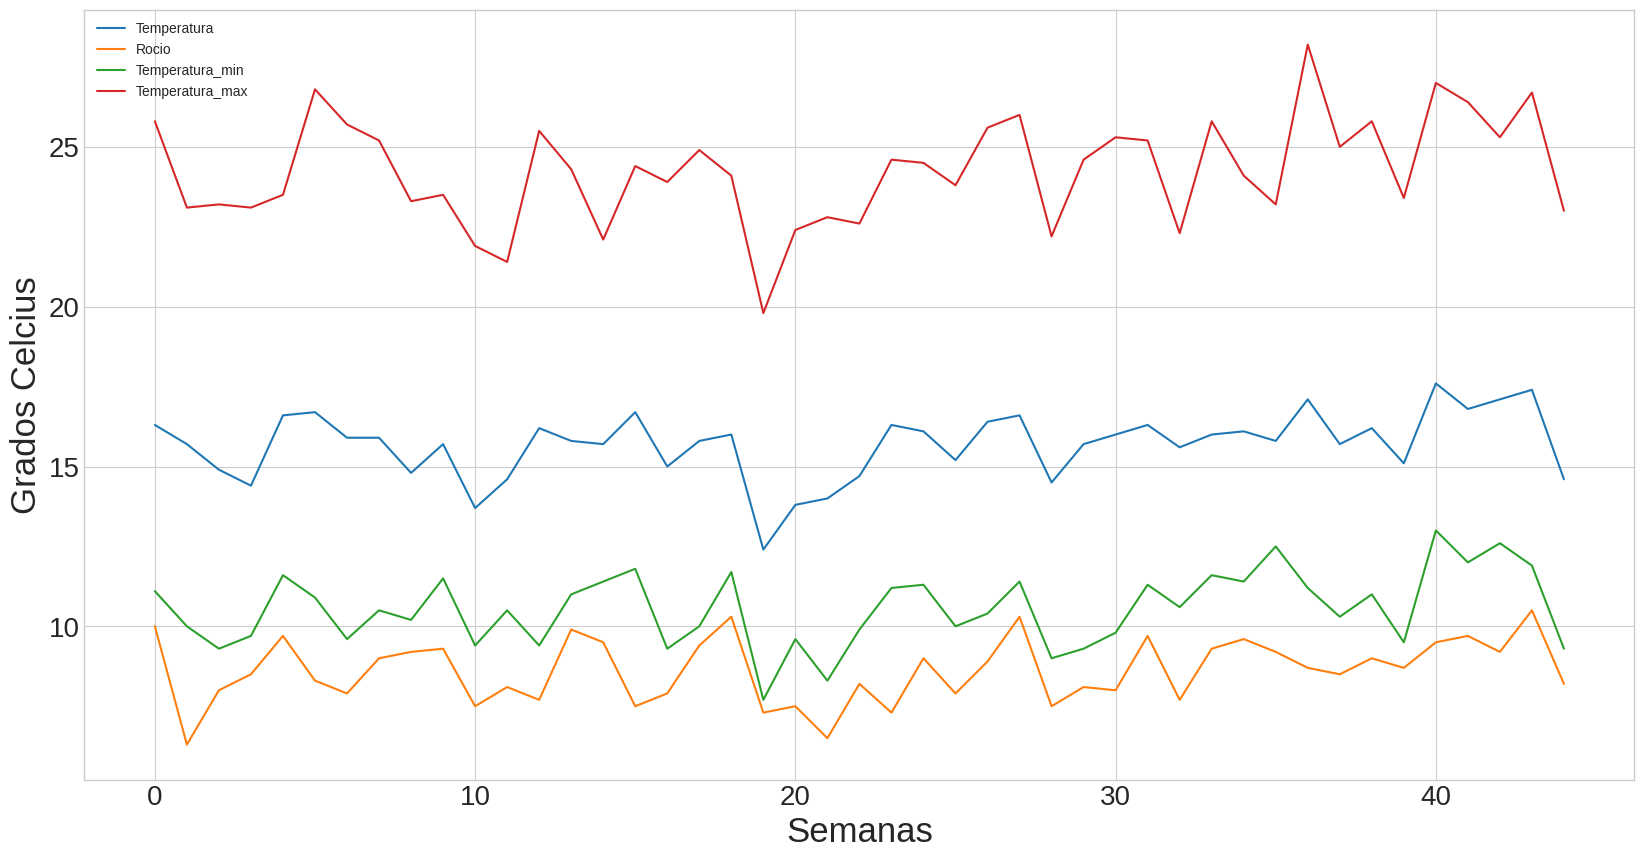

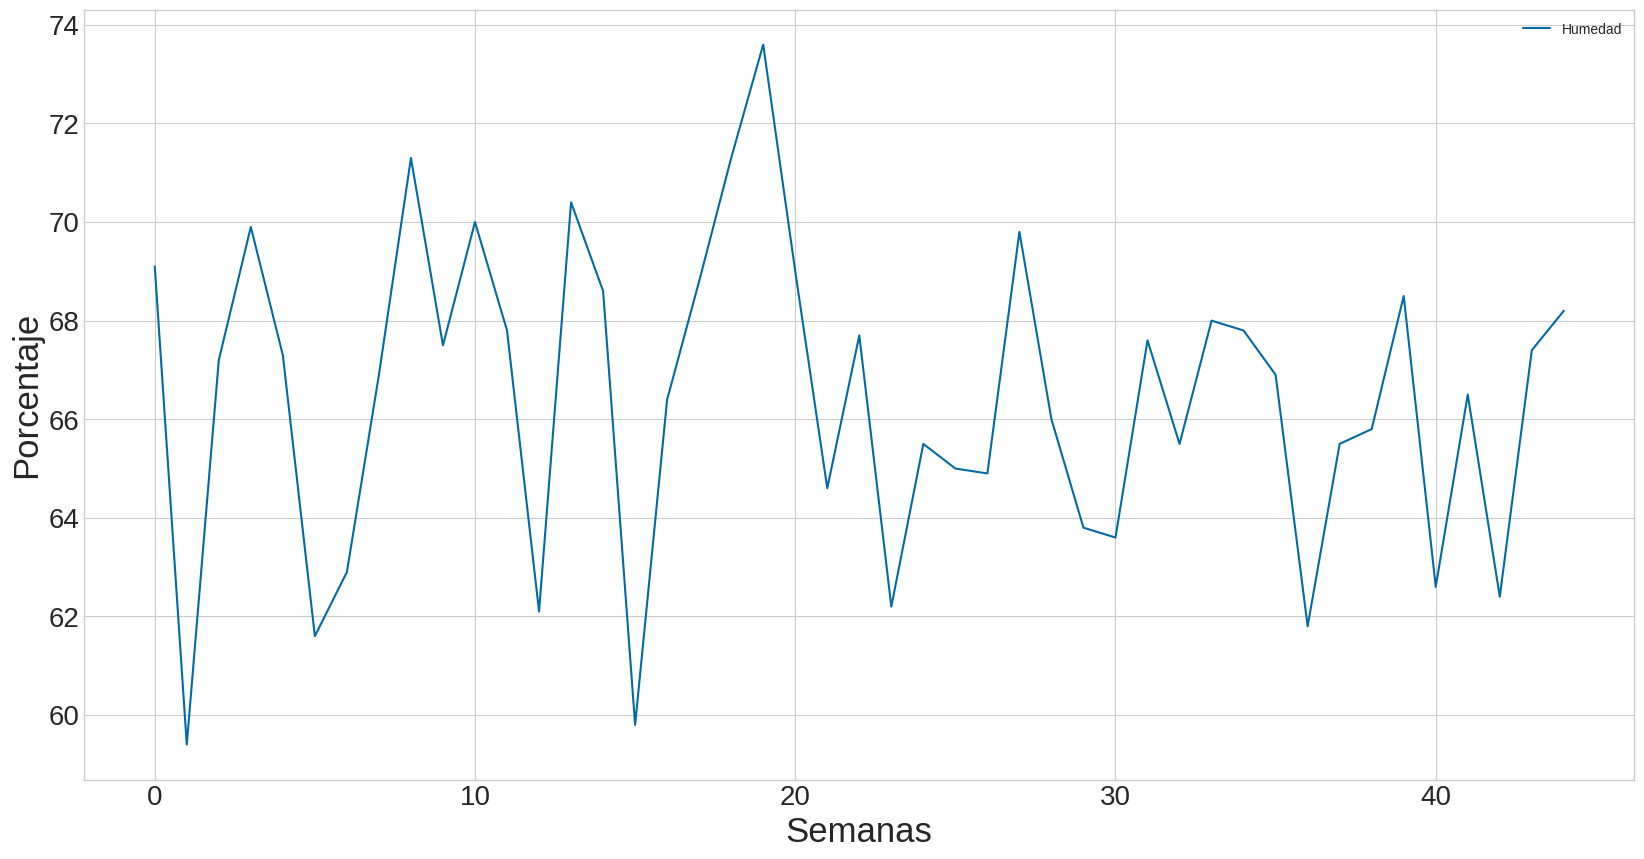

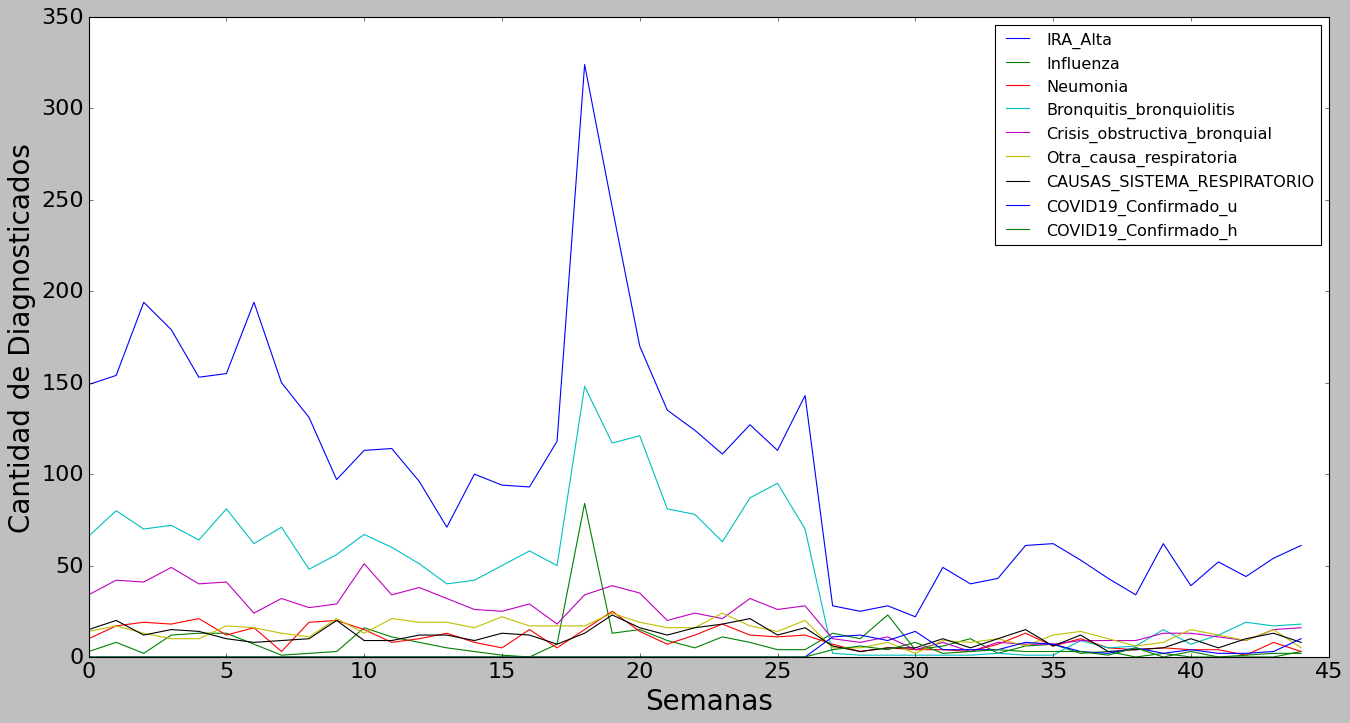

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0   0.724191  -0.395705 -0.022479                  0.535511   
1   0.803405   0.001767  1.157669                  0.909123   
2   1.437117  -0.475200  1.494854                  0.642257   
3   1.199475   0.319744  1.326261                  0.695630   
4   0.787563   0.399238  1.832039                  0.482138   
5   0.819248   0.399238  0.314706                  0.935810   
6   1.437117  -0.077728  0.989076                  0.428765   
7   0.740034  -0.554694 -1.202627                  0.668944   
8   0.439021  -0.475200  1.494854                  0.055152   
9  -0.099634  -0.395705  1.663446                  0.268645   
10  0.153851   0.637722  0.820484                  0.562197   
11  0.169694   0.240250 -0.359664                  0.375391   
12 -0.115476   0.001767 -0.022479                  0.135212   
13 -0.511546  -0.236717  0.483299                 -0.158340   
14 -0.052105  -0.395705 -0.359664                 -0.104967   
15 -0.147162  -0.554694 -0.865442                  0.108525   
16 -0.163005  -0.634189  0.820484                  0.322018   
17  0.233065  -0.077728 -0.865442                  0.108525   
18  3.496679   6.043340  0.820484                  2.723811   
19  2.260942   0.399238  2.506409                  1.896527   
20  1.056890   0.558227  0.651891                  2.003273   
21  0.502392   0.081261 -0.528257                  0.935810   
22  0.328122  -0.236717  0.314706                  0.855750   
23  0.122165   0.240250  1.326261                  0.455451   
24  0.375650   0.001767  0.314706                  1.095929   
25  0.153851  -0.316211  0.146114                  1.309422   
26  0.629135  -0.316211  0.314706                  0.642257   
27 -1.192786   0.399238 -0.528257                 -1.172431   
28 -1.240314   0.160755 -1.202627                 -1.199117   
29 -1.192786   1.194182 -0.865442                 -1.199117   
30 -1.287842  -0.316211 -1.034034                 -1.199117   
31 -0.860087  -0.157222 -1.034034                 -1.199117   
32 -1.002672   0.160755 -1.202627                 -1.199117   
33 -0.955144  -0.475200 -0.528257                 -1.172431   
34 -0.669974  -0.157222  0.483299                 -1.199117   
35 -0.654131  -0.077728 -0.696849                 -1.199117   
36 -0.796716  -0.475200 -0.022479                 -0.985625   
37 -0.955144  -0.395705 -0.865442                 -1.092371   
38 -1.097729  -0.634189 -1.034034                 -1.065684   
39 -0.654131  -0.475200 -0.865442                 -0.825505   
40 -1.018515  -0.634189 -1.034034                 -1.038998   
41 -0.812559  -0.634189 -1.034034                 -0.905565   
42 -0.939301  -0.634189 -1.539812                 -0.718759   
43 -0.780873  -0.634189 -0.359664                 -0.772132   
44 -0.669974  -0.395705 -1.202627                 -0.745445   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                       0.832609                 0.074570   
1                       1.445572                 0.633846   
2                       1.368951                -0.111855   
3                       1.981915                -0.671131   
4                       1.292331                -0.671131   
5                       1.368951                 0.633846   
6                       0.066404                 0.447421   
7                       0.679368                -0.111855   
8                       0.296266                -0.484706   
9                       0.449506                 1.379547   
10                      2.135156                -0.111855   
11                      0.832609                 1.379547   
12                      1.139090                 1.006697   
13                      0.679368                 1.006697   
14                      0.219645                 0.447421   
15                      0.143025                 1.565973   
16                      0.449506                 0.633846   
17     

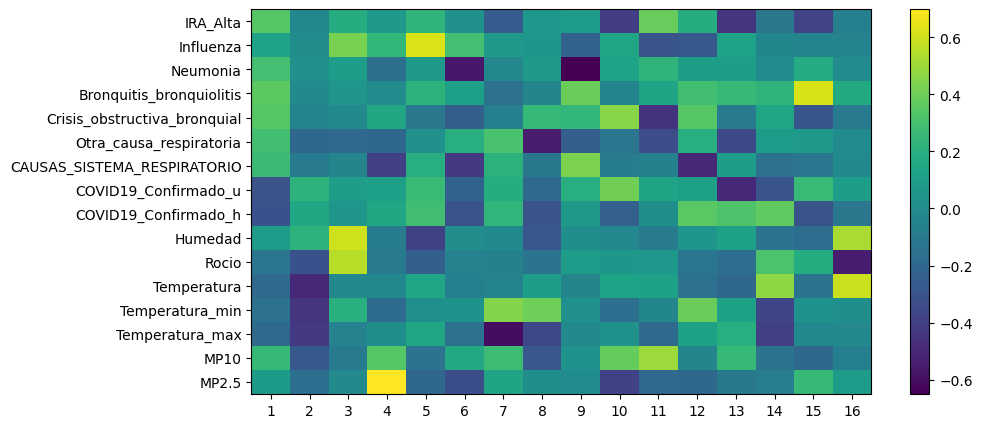

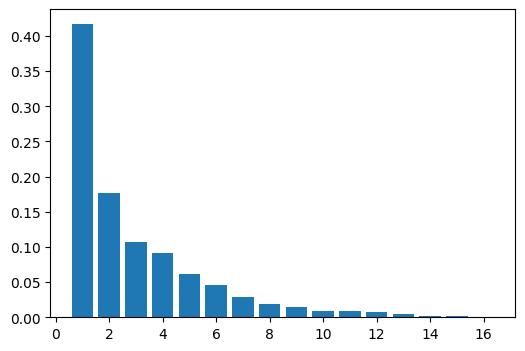

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.41718812 0.59391136 0.70143953 0.79346002 0.85513177 0.90172092
 0.93079351 0.95025046 0.96463321 0.97414445 0.98278728 0.99011523
 0.99510941 0.99753748 0.99934583 1.        ]


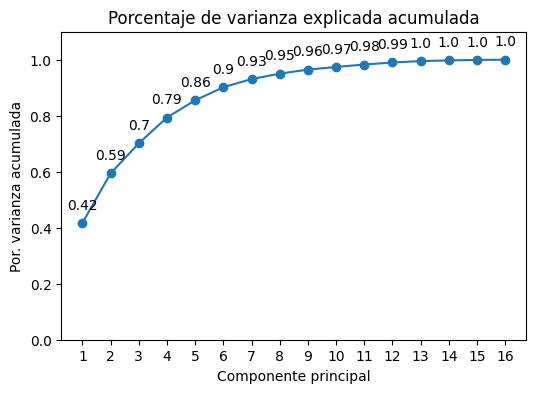

'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1  0.339880   0.131090  0.297410                  0.359078   
PC2 -0.020075   0.008787  0.030037                 -0.011328   
PC3  0.185540   0.424721  0.098903                  0.054816   
PC4  0.079858   0.243675 -0.151420                  0.002180   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                      0.344036                 0.288287   
PC2                     -0.040799                -0.195178   
PC3                     -0.003745                -0.192496   
PC4                      0.156080                -0.201389   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                     0.267291             -0.307555             -0.311106   
PC2                    -0.091207              0.221831              0.154718   
PC3                    -0.037103              0.105008              0.052041   
PC4                    -0.393376              0.108260              0.155113   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1  0.093013 -0.122083    -0.191006        -0.143432        -0.185084   
PC2  0.221212 -0.310606    -0.498680        -0.447929        -0.422127   
PC3  0.598402  0.555540    -0.013534         0.203997        -0.054658   
PC4 -0.081291 -0.096628    -0.023177        -0.181708         0.022501   

         MP10     MP2.5  
PC1  0.252233  0.084412  
PC2 -0.280524 -0.160148  
PC3 -0.093289 -0.004712  
PC4  0.343795  0.698332

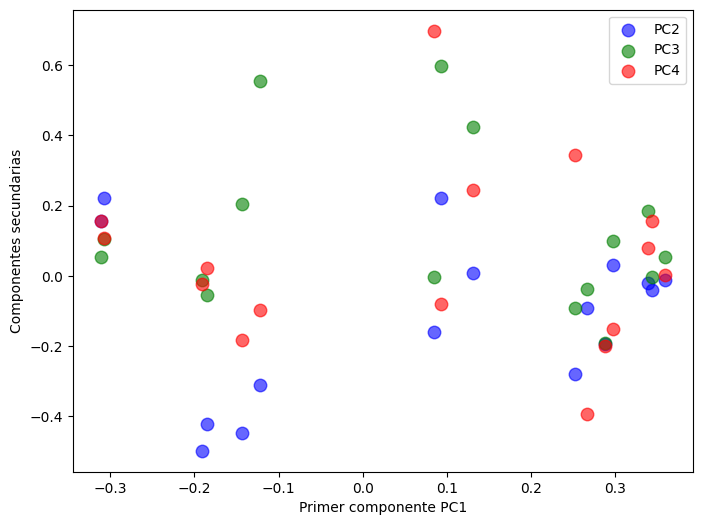

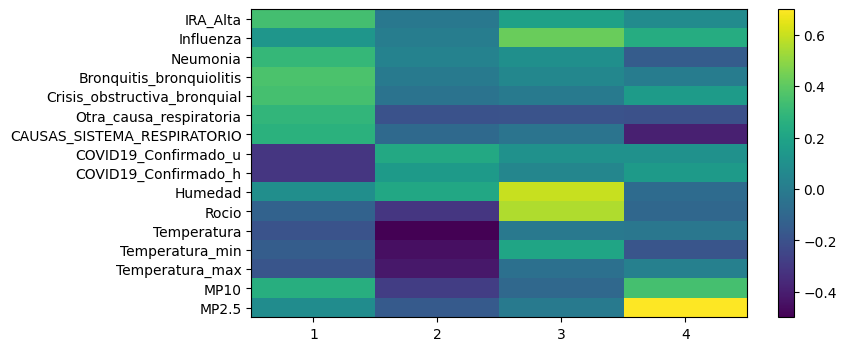

In [30]:
algoritmo_dataframe(diccionario['sep_octDFtotaltodos'])

### - Categoria: Todas las edades
### - Periodo: Noviembre - Diciembre (9 semanas por 5 años, 2017-2021)

----------------------
Media de cada variable
----------------------
IRA_Alta                        76.111111
Influenza                        2.844444
Neumonia                         6.533333
Bronquitis_bronquiolitis        24.177778
Crisis_obstructiva_bronquial    16.955556
Otra_causa_respiratoria         11.177778
CAUSAS_SISTEMA_RESPIRATORIO      7.711111
COVID19_Confirmado_u             1.555556
COVID19_Confirmado_h             0.933333
Humedad                         65.597778
Rocio                           10.406667
Temperatura                     17.664444
Temperatura_min                 12.657778
Temperatura_max                 25.744444
MP10                            31.604444
MP2.5                            9.057778
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        613.737374
Influenza                         8.907071
Neumonia                         20.981818
Bronquitis_bronquiolitis        234.2

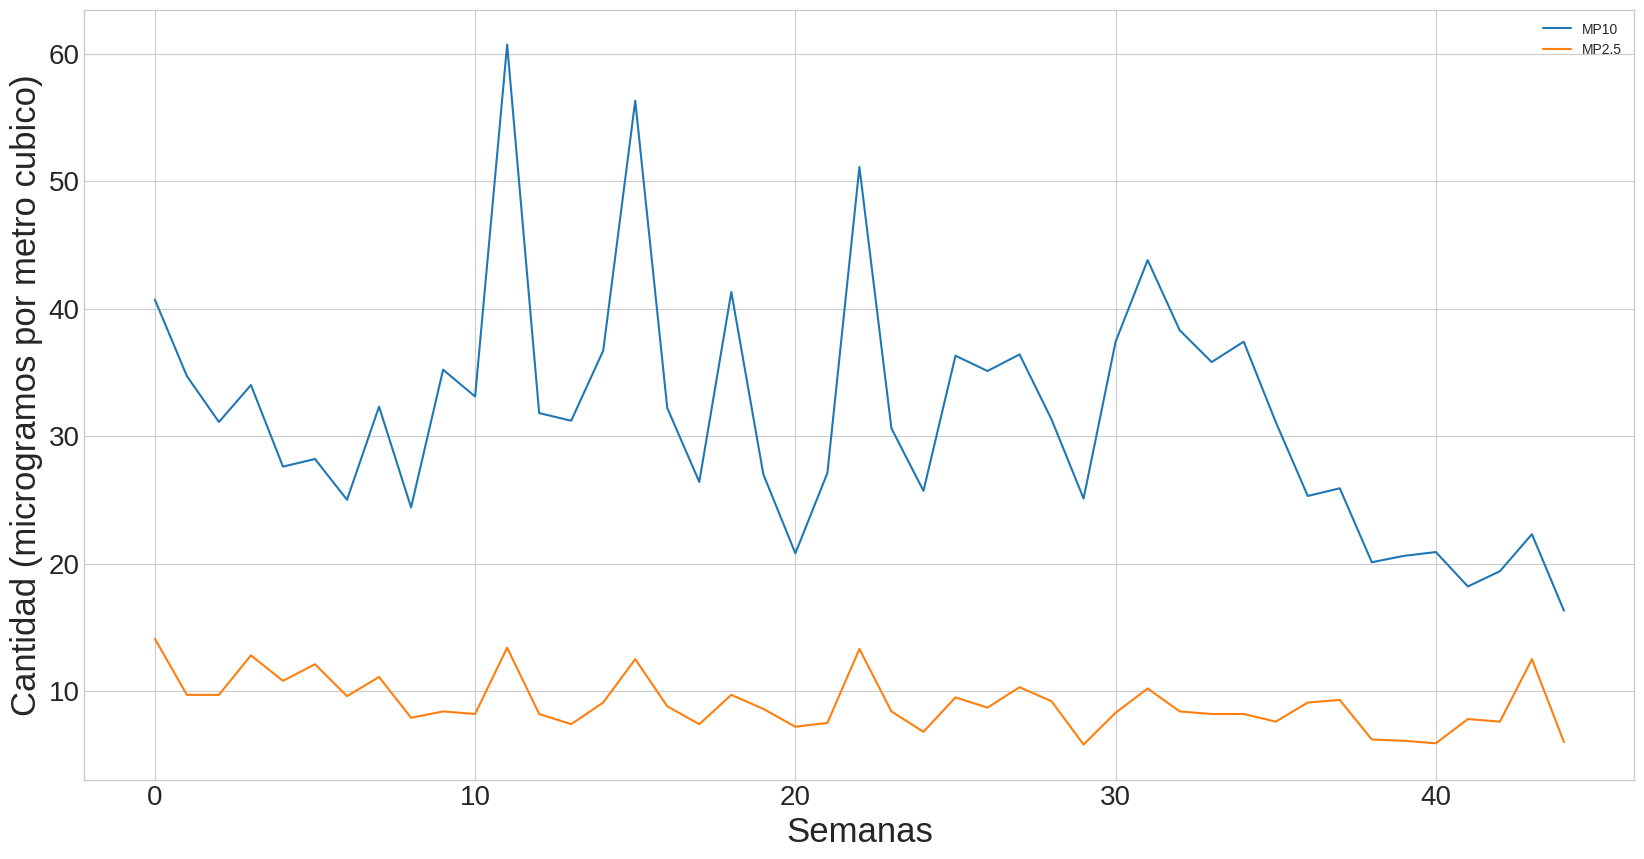

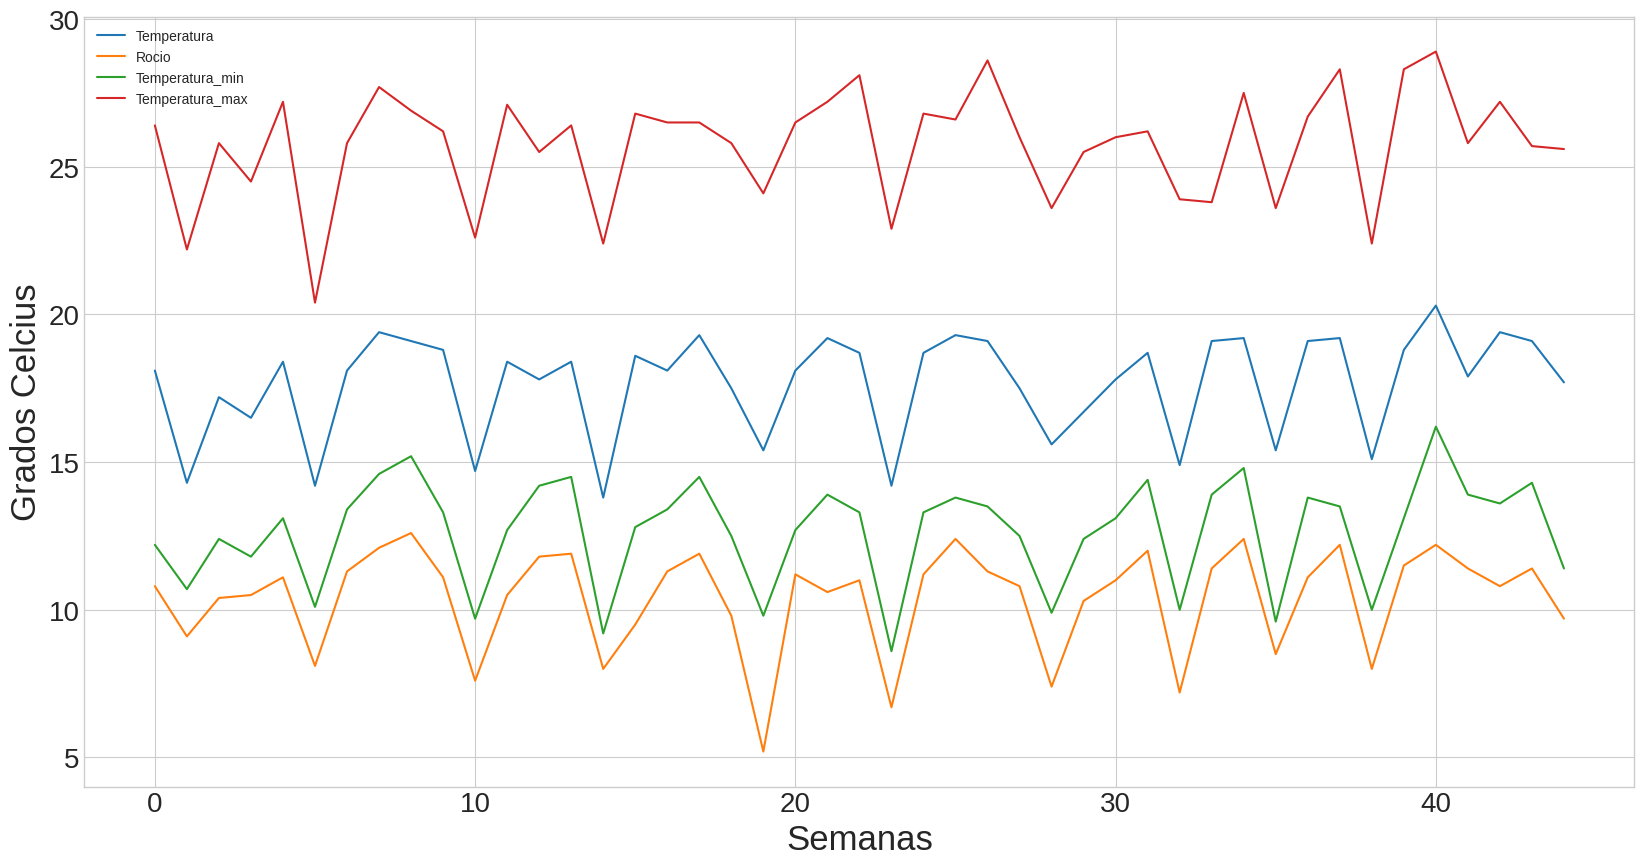

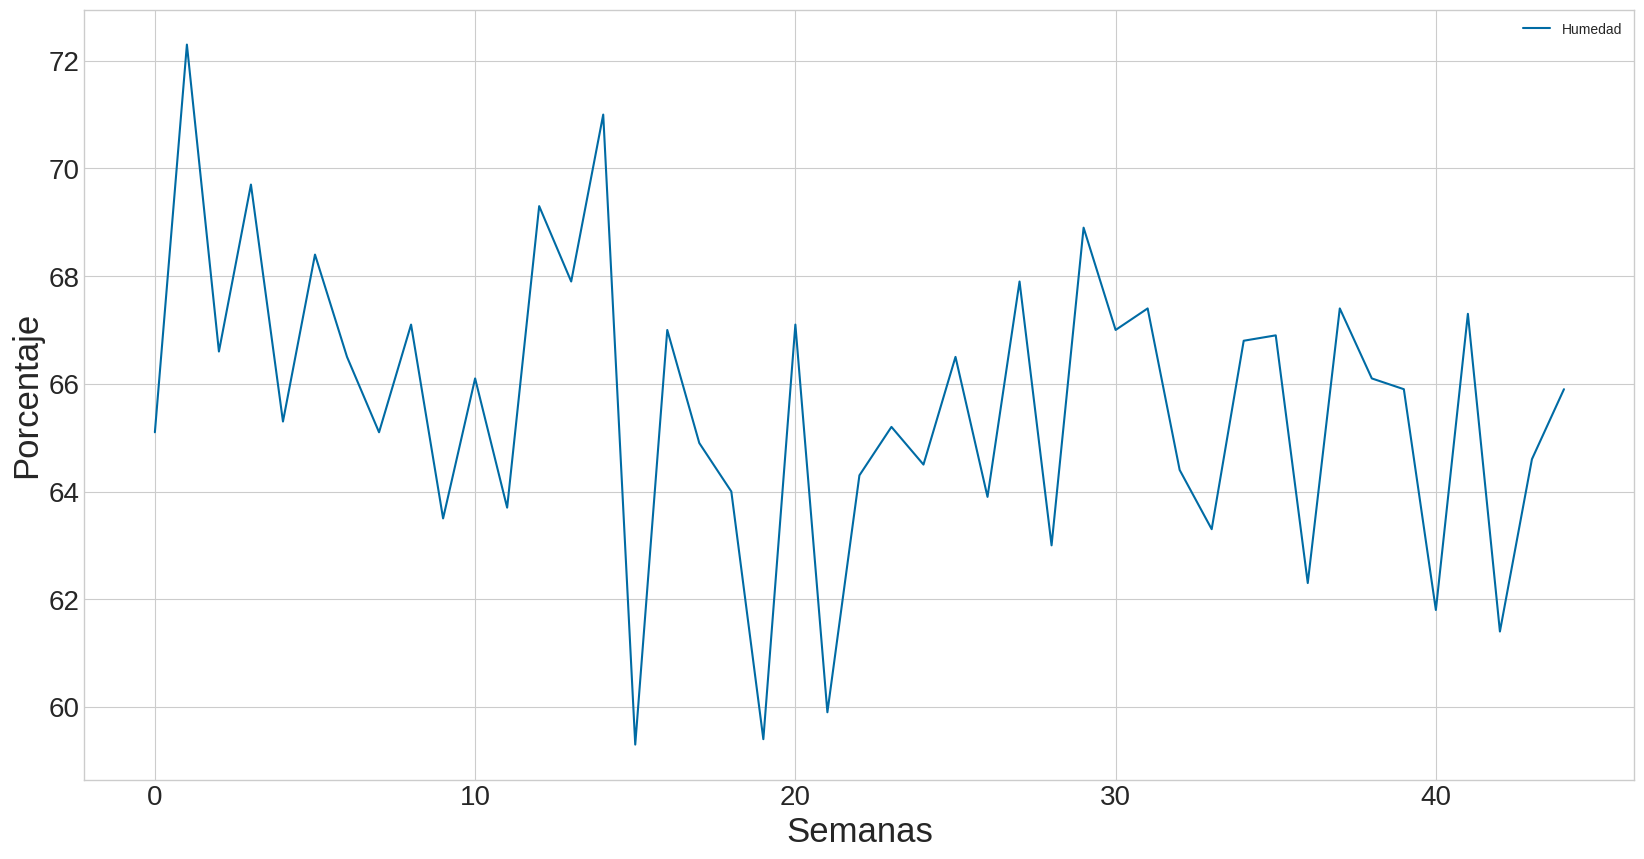

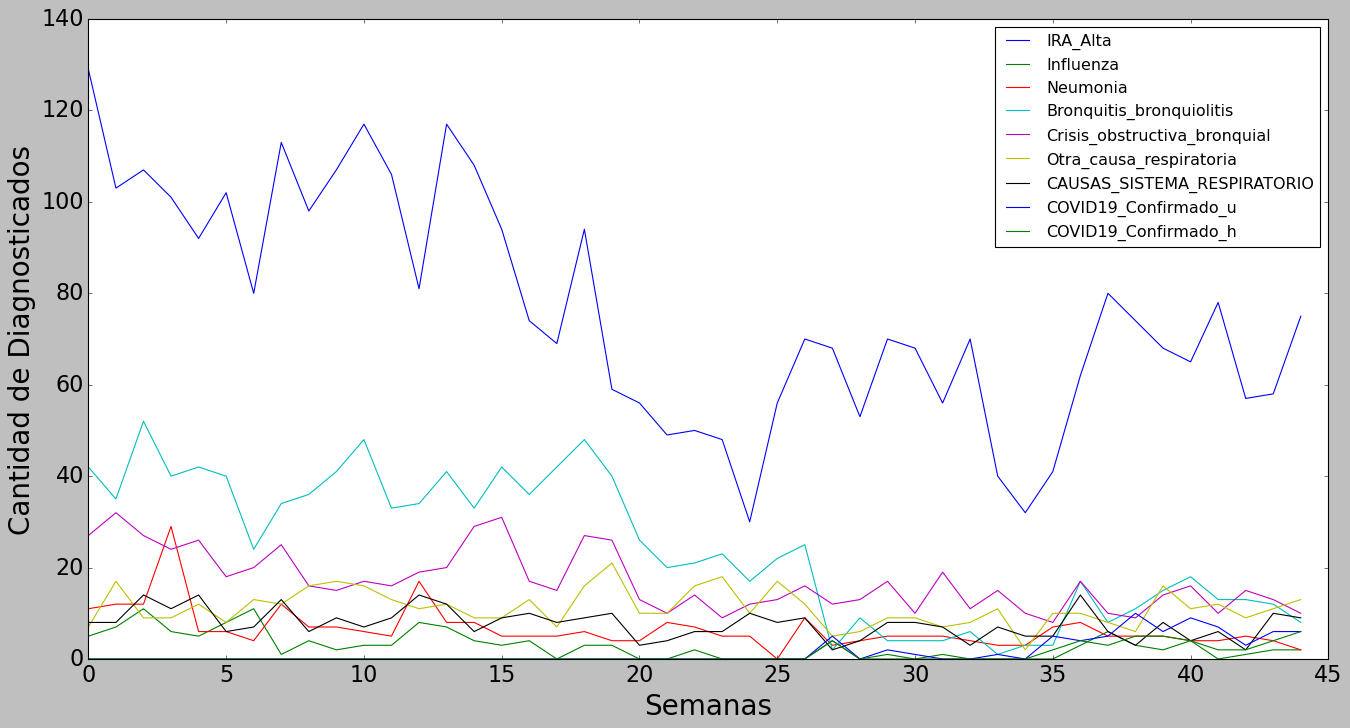

'     *** DataFrame normalizado a continuacion***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
0   2.159002   0.730418  0.986148                  1.177521   
1   1.097644   1.408126  1.206927                  0.715028   
2   1.260930   2.763542  1.206927                  1.838225   
3   1.016001   1.069272  4.960175                  1.045380   
4   0.648608   0.730418 -0.117749                  1.177521   
5   1.056822   1.746980 -0.117749                  1.045380   
6   0.158750   2.763542 -0.559308                 -0.011746   
7   1.505859  -0.624997  1.206927                  0.648958   
8   0.893537   0.391564  0.103030                  0.781099   
9   1.260930  -0.286143  0.103030                  1.111451   
10  1.669145   0.052711 -0.117749                  1.573944   
11  1.220108   0.052711 -0.338528                  0.582888   
12  0.199572   1.746980  2.310823                  0.648958   
13  1.669145   1.408126  0.323810                  1.111451   
14  1.301751   0.391564  0.323810                  0.582888   
15  0.730251   0.052711 -0.338528                  1.177521   
16 -0.086179   0.391564 -0.338528                  0.781099   
17 -0.290286  -0.963851 -0.338528                  1.177521   
18  0.730251   0.052711 -0.117749                  1.573944   
19 -0.698501   0.052711 -0.559308                  1.045380   
20 -0.820965  -0.963851 -0.559308                  0.120395   
21 -1.106715  -0.963851  0.323810                 -0.276027   
22 -1.065894  -0.286143  0.103030                 -0.209957   
23 -1.147537  -0.963851 -0.338528                 -0.077816   
24 -1.882323  -0.963851 -0.338528                 -0.474239   
25 -0.820965  -0.963851 -1.442425                 -0.143887   
26 -0.249465  -0.963851  0.544589                  0.054325   
27 -0.331107   0.391564 -0.780087                 -1.465294   
28 -0.943430  -0.963851 -0.559308                 -1.002802   
29 -0.249465  -0.963851 -0.338528                 -1.333154   
30 -0.331107  -0.963851 -0.338528                 -1.333154   
31 -0.820965  -0.624997 -0.338528                 -1.333154   
32 -0.249465  -0.963851 -0.559308                 -1.201013   
33 -1.474109  -0.963851 -0.780087                 -1.531365   
34 -1.800680  -0.963851 -0.780087                 -1.399224   
35 -1.433287  -0.963851  0.103030                 -1.399224   
36 -0.576036   0.052711  0.323810                 -0.474239   
37  0.158750   1.069272 -0.338528                 -1.068872   
38 -0.086179   0.052711 -0.338528                 -0.870661   
39 -0.331107  -0.286143 -0.338528                 -0.606379   
40 -0.453572   0.391564 -0.559308                 -0.408168   
41  0.077107  -0.963851 -0.559308                 -0.738520   
42 -0.780144  -0.624997 -0.338528                 -0.738520   
43 -0.739322  -0.286143 -0.559308                 -0.804591   
44 -0.045357  -0.286143 -1.000866                 -1.068872   

    Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
0                       1.563219                -1.077439   
1                       2.341369                 1.501537   
2                       1.563219                -0.561644   
3                       1.096328                -0.561644   
4                       1.407588                 0.212049   
5                       0.162547                -0.819541   
6                       0.473807                 0.469947   
7                       1.251958                 0.212049   
8                      -0.148713                 1.243640   
9                      -0.304343                 1.501537   
10                      0.006917                 1.243640   
11                     -0.148713                 0.469947   
12                      0.318177                -0.045848   
13                      0.473807                 0.212049   
14                      1.874479                -0.561644   
15                      2.185739                -0.561644   
16                      0.006917                 0.469947   
17     

'     *** DataFrame con todos los componentes principales PCA ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1   0.334732   0.266647  0.266637                  0.370514   
PC2  -0.076887  -0.074130 -0.094697                 -0.125764   
PC3   0.257652   0.401082  0.229590                  0.052848   
PC4   0.018888  -0.050870 -0.202243                  0.292609   
PC5   0.173052   0.119873 -0.106567                 -0.015363   
PC6  -0.344278  -0.236327  0.648040                 -0.107208   
PC7  -0.109331  -0.165305  0.064106                 -0.269617   
PC8   0.385397  -0.381312  0.523449                  0.213037   
PC9  -0.401487   0.567764  0.234709                 -0.000258   
PC10 -0.294802   0.034963  0.165986                 -0.265275   
PC11 -0.041012  -0.423121 -0.113672                  0.036056   
PC12  0.034626   0.028145  0.110369                 -0.013051   
PC13 -0.504492  -0.097625 -0.062361                  0.740140   
PC14  0.027452   0.015810 -0.070403                 -0.077908   
PC15 -0.006598   0.060607  0.002861                 -0.049552   
PC16  0.007202   0.012201  0.017514                  0.022522   

      Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                       0.366844                 0.119596   
PC2                      -0.114880                -0.006594   
PC3                       0.069121                -0.046477   
PC4                       0.090974                 0.655402   
PC5                       0.148035                -0.146661   
PC6                       0.003352                -0.210497   
PC7                      -0.216914                 0.574760   
PC8                      -0.193381                 0.175328   
PC9                      -0.257214                 0.263587   
PC10                      0.739713                 0.176570   
PC11                      0.330106                 0.052136   
PC12                     -0.050295                 0.079466   
PC13                     -0.013692                -0.129039   
PC14                     -0.035491                -0.013996   
PC15                      0.078356                 0.017881   
PC16                     -0.019526                -0.013368   

      CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                      0.223389             -0.295586             -0.279273   
PC2                     -0.255150              0.094994              0.074223   
PC3                      0.163164              0.397972              0.410559   
PC4                      0.223809              0.055607              0.098682   
PC5                     -0.082211              0.383607              0.419515   
PC6                      0.458150              0.007906              0.060878   
PC7                      0.273337              0.122383              0.189614   
PC8                     -0.514480              0.124953             -0.008724   
PC9                     -0.357915             -0.080424             -0.114154   
PC10                    -0.308640              0.095404              0.035747   
PC11                    -0.099533              0.031992             -0.040341   
PC12                     0.013414              0.286810             -0.134379   
PC13                    -0.033370              0.244916              0.103379   
PC14                     0.131173              0.586846             -0.632394   
PC15                     0.015684              0.238791             -0.268256   
PC16                    -0.014354              0.063849             -0.076863   

       Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1   0.122137 -0.140009    -0.201228        -0.158345        -0.174317   
PC2   0.094055 -0.452567    -0.466178        -0.470812        -0.439234   
PC3   0.351696  0.127216    -0.044947         0.049348        -0.054767   
PC4  -0.426088 -0.198969     0.044677        -0.042684         0.076273   
PC5  -0.432573 -0.181992     0.051274        -0.100087         0.081943   


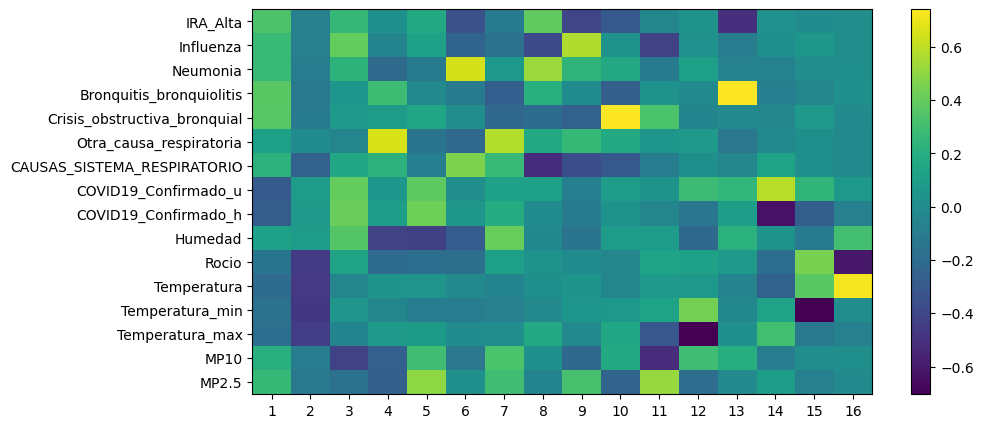

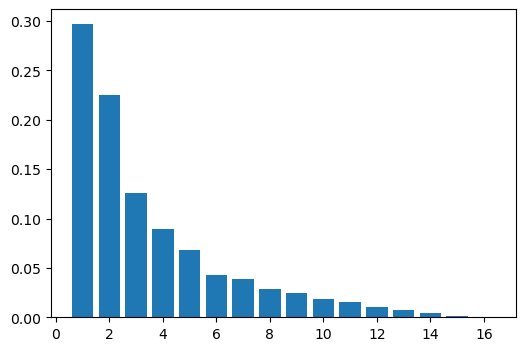

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.29703006 0.5219343  0.64821471 0.73719323 0.80483375 0.84769546
 0.8868901  0.91555887 0.94050652 0.95950481 0.97537766 0.98622721
 0.99379709 0.99802263 0.99975426 1.        ]


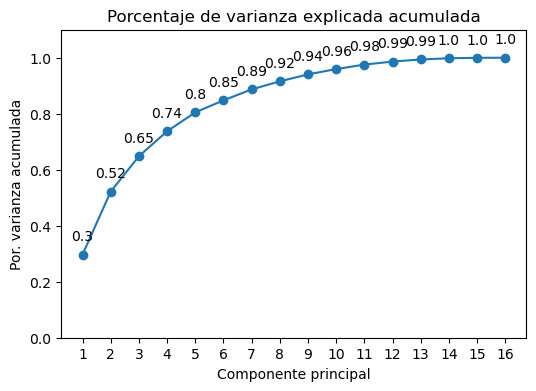

'     *** DataFrame 4 componentes principales a continuacion ***'

IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
PC1  0.334732   0.266647  0.266637                  0.370514   
PC2 -0.076887  -0.074130 -0.094697                 -0.125764   
PC3  0.257652   0.401082  0.229590                  0.052848   
PC4  0.018888  -0.050870 -0.202243                  0.292609   

     Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
PC1                      0.366844                 0.119596   
PC2                     -0.114880                -0.006594   
PC3                      0.069121                -0.046477   
PC4                      0.090974                 0.655402   

     CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  COVID19_Confirmado_h  \
PC1                     0.223389             -0.295586             -0.279273   
PC2                    -0.255150              0.094994              0.074223   
PC3                     0.163164              0.397972              0.410559   
PC4                     0.223809              0.055607              0.098682   

      Humedad     Rocio  Temperatura  Temperatura_min  Temperatura_max  \
PC1  0.122137 -0.140009    -0.201228        -0.158345        -0.174317   
PC2  0.094055 -0.452567    -0.466178        -0.470812        -0.439234   
PC3  0.351696  0.127216    -0.044947         0.049348        -0.054767   
PC4 -0.426088 -0.198969     0.044677        -0.042684         0.076273   

         MP10     MP2.5  
PC1  0.211195  0.263168  
PC2 -0.094510 -0.128166  
PC3 -0.426201 -0.166637  
PC4 -0.258609 -0.268570

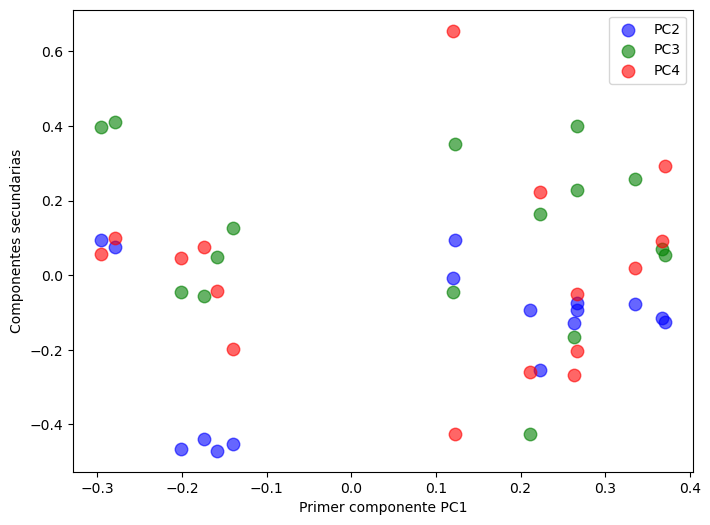

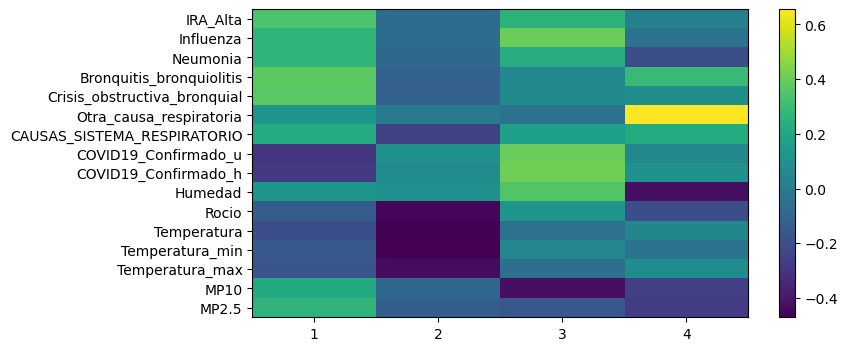

In [19]:
algoritmo_dataframe(diccionario['nov_dicDFtotaltodos'])

### Dentro de este pequeño for esta el describe de cada una de los 36 dataframes (cada periodo y categoria)

In [20]:
#print(list(map(lambda x:diccionario[x].describe(), diccionario)))
for i in diccionario:
    print('     Periodo y categoria: '+i)
    display(diccionario[i].describe())
#dataframefinal.describe() 
#Count = cantidad de datos
#Mean = promedio 
#std = desviación estandar
#min = mínimo
#max = máximo

     Periodo y categoria: ene_febDFtotaltodos


IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
count   40.000000  40.000000  40.00000                  40.00000   
mean    63.875000   1.850000   6.60000                  13.92500   
std     19.682333   2.154899   2.93345                   7.57319   
min     34.000000   0.000000   1.00000                   1.00000   
25%     53.000000   0.000000   4.00000                   9.00000   
50%     59.000000   1.000000   7.00000                  13.50000   
75%     71.250000   3.000000   8.00000                  19.50000   
max    119.000000   9.000000  13.00000                  30.00000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                      13.100000                 9.500000   
std                        5.285685                 3.658499   
min                        4.000000                 2.000000   
25%                        9.750000                 7.750000   
50%                       13.000000                 9.000000   
75%                       16.000000                11.250000   
max                       25.000000                19.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      7.400000              3.600000   
std                       3.053371              7.631917   
min                       3.000000              0.000000   
25%                       5.000000              0.000000   
50%                       6.500000              0.000000   
75%                      10.250000              0.000000   
max                      13.000000             29.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               2.100000  65.595000  11.415000    18.672500   
std                4.539287   3.015511   2.522976     2.407466   
min                0.000000  58.100000   5.800000    14.000000   
25%                0.000000  63.825000  10.475000    17.125000   
50%                0.000000  65.750000  11.950000    18.950000   
75%                0.000000  67.500000  13.000000    20.025000   
max               18.000000  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: ene_febDFmenores


IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.00000                 40.000000   
mean    8.950000   0.125000   0.15000                  4.500000   
std     4.755294   0.515777   0.36162                  3.250247   
min     1.000000   0.000000   0.00000                  0.000000   
25%     5.750000   0.000000   0.00000                  2.000000   
50%     8.000000   0.000000   0.00000                  4.500000   
75%    13.000000   0.000000   0.00000                  7.000000   
max    18.000000   3.000000   1.00000                 11.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       0.050000                 0.625000   
std                        0.220721                 0.867874   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        1.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      0.250000              0.025000   
std                       0.543021              0.158114   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       0.000000              0.000000   
max                       2.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               0.025000  65.595000  11.415000    18.672500   
std                0.158114   3.015511   2.522976     2.407466   
min                0.000000  58.100000   5.800000    14.000000   
25%                0.000000  63.825000  10.475000    17.125000   
50%                0.000000  65.750000  11.950000    18.950000   
75%                0.000000  67.500000  13.000000    20.025000   
max                1.000000  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: ene_febDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                 40.000000   
mean   18.725000   0.350000   0.475000                  5.950000   
std     9.969151   0.769615   0.750641                  3.630003   
min     4.000000   0.000000   0.000000                  0.000000   
25%    12.000000   0.000000   0.000000                  3.000000   
50%    18.000000   0.000000   0.000000                  6.000000   
75%    23.000000   0.000000   1.000000                  8.250000   
max    46.000000   3.000000   3.000000                 13.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       0.125000                 0.500000   
std                        0.334932                 0.905822   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        1.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000                  40.0   
mean                      0.250000                   0.0   
std                       0.630425                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       0.000000                   0.0   
75%                       0.000000                   0.0   
max                       3.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  40.0  40.000000  40.000000    40.000000   
mean                    0.0  65.595000  11.415000    18.672500   
std                     0.0   3.015511   2.522976     2.407466   
min                     0.0  58.100000   5.800000    14.000000   
25%                     0.0  63.825000  10.475000    17.125000   
50%                     0.0  65.750000  11.950000    18.950000   
75%                     0.0  67.500000  13.000000    20.025000   
max                     0.0  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: ene_febDFde5a14


IRA_Alta  Influenza  Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.00000                 40.000000   
mean   15.650000   0.700000   0.15000                  3.175000   
std     8.125774   0.939176   0.36162                  2.406055   
min     2.000000   0.000000   0.00000                  0.000000   
25%     9.000000   0.000000   0.00000                  1.000000   
50%    15.000000   0.000000   0.00000                  2.500000   
75%    21.000000   2.000000   0.00000                  5.000000   
max    33.000000   3.000000   1.00000                  8.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       0.575000                 0.800000   
std                        0.594311                 1.362501   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        1.000000                 0.000000   
75%                        1.000000                 1.000000   
max                        2.000000                 6.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000                  40.0   
mean                      0.200000                   0.0   
std                       0.516398                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       0.000000                   0.0   
75%                       0.000000                   0.0   
max                       2.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  40.0  40.000000  40.000000    40.000000   
mean                    0.0  65.595000  11.415000    18.672500   
std                     0.0   3.015511   2.522976     2.407466   
min                     0.0  58.100000   5.800000    14.000000   
25%                     0.0  63.825000  10.475000    17.125000   
50%                     0.0  65.750000  11.950000    18.950000   
75%                     0.0  67.500000  13.000000    20.025000   
max                     0.0  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: ene_febDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                 40.000000   
mean   19.025000   0.600000   2.950000                  0.250000   
std     8.939935   1.007663   2.194983                  0.630425   
min     8.000000   0.000000   0.000000                  0.000000   
25%    13.000000   0.000000   1.000000                  0.000000   
50%    16.000000   0.000000   3.000000                  0.000000   
75%    24.000000   1.000000   5.000000                  0.000000   
max    43.000000   4.000000   7.000000                  3.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       7.050000                 4.075000   
std                        3.396454                 1.831176   
min                        1.000000                 0.000000   
25%                        4.750000                 3.000000   
50%                        7.000000                 4.000000   
75%                        9.000000                 5.000000   
max                       18.000000                 8.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      3.150000              2.350000   
std                       2.032429              4.959063   
min                       0.000000              0.000000   
25%                       1.750000              0.000000   
50%                       3.000000              0.000000   
75%                       5.000000              0.000000   
max                       8.000000             18.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               1.250000  65.595000  11.415000    18.672500   
std                2.686624   3.015511   2.522976     2.407466   
min                0.000000  58.100000   5.800000    14.000000   
25%                0.000000  63.825000  10.475000    17.125000   
50%                0.000000  65.750000  11.950000    18.950000   
75%                0.000000  67.500000  13.000000    20.025000   
max               10.000000  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: ene_febDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                 40.000000   
mean    1.525000   0.075000   2.875000                  0.050000   
std     1.601081   0.266747   1.588218                  0.220721   
min     0.000000   0.000000   0.000000                  0.000000   
25%     0.000000   0.000000   2.000000                  0.000000   
50%     1.000000   0.000000   3.000000                  0.000000   
75%     2.000000   0.000000   4.000000                  0.000000   
max     7.000000   1.000000   7.000000                  1.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                     40.0   
mean                       5.300000                      3.5   
std                        2.936944                      2.0   
min                        1.000000                      0.0   
25%                        3.000000                      2.0   
50%                        5.000000                      3.0   
75%                        7.000000                      4.0   
max                       12.000000                      9.0   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      3.550000              1.225000   
std                       1.866712              2.731464   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       3.000000              0.000000   
75%                       4.250000              0.000000   
max                       8.000000             11.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               0.825000  65.595000  11.415000    18.672500   
std                1.920036   3.015511   2.522976     2.407466   
min                0.000000  58.100000   5.800000    14.000000   
25%                0.000000  63.825000  10.475000    17.125000   
50%                0.000000  65.750000  11.950000    18.950000   
75%                0.000000  67.500000  13.000000    20.025000   
max                8.000000  71.900000  16.400000    23.800000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean         13.815000        26.812500  29.932500   9.130000  
std           2.536053         2.320056   4.430164   2.036362  
min           9.100000        20.700000  22.300000   5.600000  
25%          12.550000        25.775000  27.450000   7.350000  
50%          14.550000        27.300000  29.200000   9.000000  
75%          15.250000        28.400000  31.925000  10.525000  
max          19.200000        30.800000  42.000000  13.300000

     Periodo y categoria: mar_abrDFtotaltodos


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    93.155556   3.111111   6.622222                 31.288889   
std     39.773767   3.785272   3.235379                 26.578035   
min     23.000000   0.000000   0.000000                  0.000000   
25%     56.000000   0.000000   4.000000                  4.000000   
50%    102.000000   2.000000   6.000000                 20.000000   
75%    123.000000   5.000000   9.000000                 56.000000   
max    171.000000  15.000000  14.000000                 88.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      16.311111                11.266667   
std                        7.159933                 3.990899   
min                        4.000000                 4.000000   
25%                       11.000000                 8.000000   
50%                       15.000000                11.000000   
75%                       22.000000                13.000000   
max                       30.000000                22.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      7.044444              7.133333   
std                       3.081879             15.564528   
min                       0.000000              0.000000   
25%                       5.000000              0.000000   
50%                       7.000000              0.000000   
75%                       9.000000              0.000000   
max                      14.000000             52.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count              45.00000  45.000000  45.000000    45.000000   
mean                3.80000  68.904444  10.371111    16.728889   
std                 8.47617   3.467443   1.722923     1.637296   
min                 0.00000  61.300000   6.600000    14.000000   
25%                 0.00000  66.700000   9.500000    15.500000   
50%                 0.00000  69.500000  10.300000    16.400000   
75%                 0.00000  70.800000  11.500000    18.100000   
max                30.00000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: mar_abrDFmenores


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   12.088889   0.022222   0.177778                  6.666667   
std     8.081467   0.149071   0.490310                  6.131143   
min     0.000000   0.000000   0.000000                  0.000000   
25%     5.000000   0.000000   0.000000                  1.000000   
50%    12.000000   0.000000   0.000000                  6.000000   
75%    18.000000   0.000000   0.000000                 11.000000   
max    36.000000   1.000000   2.000000                 22.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                          45.0                45.000000   
mean                            0.0                 0.822222   
std                             0.0                 1.006544   
min                             0.0                 0.000000   
25%                             0.0                 0.000000   
50%                             0.0                 1.000000   
75%                             0.0                 1.000000   
max                             0.0                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000                  45.0   
mean                      0.288889                   0.0   
std                       0.626034                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       0.000000                   0.0   
75%                       0.000000                   0.0   
max                       3.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.022222  68.904444  10.371111    16.728889   
std                0.149071   3.467443   1.722923     1.637296   
min                0.000000  61.300000   6.600000    14.000000   
25%                0.000000  66.700000   9.500000    15.500000   
50%                0.000000  69.500000  10.300000    16.400000   
75%                0.000000  70.800000  11.500000    18.100000   
max                1.000000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: mar_abrDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   27.288889   0.400000   0.400000                 16.088889   
std    20.420157   1.031327   0.863397                 14.986088   
min     1.000000   0.000000   0.000000                  0.000000   
25%     8.000000   0.000000   0.000000                  1.000000   
50%    23.000000   0.000000   0.000000                 10.000000   
75%    43.000000   0.000000   0.000000                 29.000000   
max    89.000000   6.000000   4.000000                 51.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.333333                 0.822222   
std                        0.768706                 1.050733   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 1.000000   
75%                        0.000000                 1.000000   
max                        3.000000                 5.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000                  45.0   
mean                      0.355556                   0.0   
std                       0.570309                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       0.000000                   0.0   
75%                       1.000000                   0.0   
max                       2.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.022222  68.904444  10.371111    16.728889   
std                0.149071   3.467443   1.722923     1.637296   
min                0.000000  61.300000   6.600000    14.000000   
25%                0.000000  66.700000   9.500000    15.500000   
50%                0.000000  69.500000  10.300000    16.400000   
75%                0.000000  70.800000  11.500000    18.100000   
max                1.000000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: mar_abrDFde5a14


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   21.288889   1.088889   0.311111                  7.888889   
std    13.076040   1.592914   0.668180                  7.046025   
min     2.000000   0.000000   0.000000                  0.000000   
25%     9.000000   0.000000   0.000000                  2.000000   
50%    24.000000   0.000000   0.000000                  6.000000   
75%    30.000000   2.000000   0.000000                 14.000000   
max    45.000000   6.000000   3.000000                 24.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.866667                 0.866667   
std                        1.159937                 0.919486   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 1.000000   
75%                        1.000000                 1.000000   
max                        5.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      0.511111              0.177778   
std                       0.869227              0.534657   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       4.000000              3.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.044444  68.904444  10.371111    16.728889   
std                0.298142   3.467443   1.722923     1.637296   
min                0.000000  61.300000   6.600000    14.000000   
25%                0.000000  66.700000   9.500000    15.500000   
50%                0.000000  69.500000  10.300000    16.400000   
75%                0.000000  70.800000  11.500000    18.100000   
max                2.000000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: mar_abrDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    30.577778   1.555556   3.022222                  0.422222   
std     19.719037   3.151879   2.359593                  0.753443   
min     12.000000   0.000000   0.000000                  0.000000   
25%     21.000000   0.000000   2.000000                  0.000000   
50%     25.000000   0.000000   2.000000                  0.000000   
75%     30.000000   1.000000   4.000000                  1.000000   
max    123.000000  15.000000  10.000000                  3.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       9.933333                 5.155556   
std                        5.029007                 3.044784   
min                        1.000000                 1.000000   
25%                        7.000000                 3.000000   
50%                        9.000000                 4.000000   
75%                       13.000000                 6.000000   
max                       22.000000                18.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      2.844444              5.866667   
std                       1.594815             13.028989   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       3.000000              0.000000   
75%                       3.000000              0.000000   
max                       8.000000             43.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               3.000000  68.904444  10.371111    16.728889   
std                6.855655   3.467443   1.722923     1.637296   
min                0.000000  61.300000   6.600000    14.000000   
25%                0.000000  66.700000   9.500000    15.500000   
50%                0.000000  69.500000  10.300000    16.400000   
75%                0.000000  70.800000  11.500000    18.100000   
max               24.000000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: mar_abrDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean    1.911111   0.044444   2.711111                  0.222222   
std     1.221441   0.208409   1.575699                  0.471405   
min     0.000000   0.000000   0.000000                  0.000000   
25%     1.000000   0.000000   2.000000                  0.000000   
50%     2.000000   0.000000   3.000000                  0.000000   
75%     3.000000   0.000000   3.000000                  0.000000   
max     5.000000   1.000000   7.000000                  2.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       5.177778                 3.600000   
std                        2.846760                 1.737292   
min                        0.000000                 0.000000   
25%                        3.000000                 2.000000   
50%                        5.000000                 4.000000   
75%                        7.000000                 5.000000   
max                       15.000000                 7.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      3.044444              1.088889   
std                       1.953500              2.391483   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       3.000000              0.000000   
75%                       4.000000              0.000000   
max                       7.000000              9.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.711111  68.904444  10.371111    16.728889   
std                1.659987   3.467443   1.722923     1.637296   
min                0.000000  61.300000   6.600000    14.000000   
25%                0.000000  66.700000   9.500000    15.500000   
50%                0.000000  69.500000  10.300000    16.400000   
75%                0.000000  70.800000  11.500000    18.100000   
max                6.000000  77.200000  13.500000    20.700000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         11.942222        24.851111  36.442222  11.591111  
std           1.748569         1.833975   7.860271   2.705283  
min           7.500000        21.300000  24.100000   7.100000  
25%          10.700000        23.300000  28.600000   9.700000  
50%          11.700000        24.800000  37.700000  11.300000  
75%          13.600000        26.400000  41.700000  13.100000  
max          15.800000        27.500000  56.200000  19.200000

     Periodo y categoria: may_junDFtotaltodos


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   40.000000  40.000000  40.000000                 40.000000   
mean   113.475000  10.975000   9.450000                 50.050000   
std     54.904106  11.796322   6.404926                 42.838366   
min     39.000000   0.000000   2.000000                  0.000000   
25%     66.500000   1.750000   5.750000                  3.000000   
50%    114.000000   8.500000   7.000000                 57.000000   
75%    152.000000  15.250000  11.000000                 82.250000   
max    287.000000  49.000000  27.000000                150.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                      24.275000                13.025000   
std                       19.504092                 6.362903   
min                        5.000000                 3.000000   
25%                        9.750000                 9.000000   
50%                       20.500000                12.000000   
75%                       32.000000                17.500000   
max                       96.000000                26.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                     10.825000              8.375000   
std                       5.481379             14.527935   
min                       2.000000              0.000000   
25%                       7.000000              0.000000   
50%                       9.000000              0.000000   
75%                      15.000000              7.000000   
max                      26.000000             42.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               4.775000  65.915000   7.385000    14.675000   
std                8.477686   5.497811   2.379674     1.758897   
min                0.000000  51.200000   0.700000    11.100000   
25%                0.000000  63.425000   6.450000    13.275000   
50%                0.000000  66.850000   7.850000    14.450000   
75%                4.000000  68.800000   9.125000    16.100000   
max               25.000000  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: may_junDFmenores


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                  40.00000   
mean   13.825000   0.125000   0.525000                  11.22500   
std     8.926732   0.404304   1.535687                  10.52832   
min     2.000000   0.000000   0.000000                   0.00000   
25%     6.000000   0.000000   0.000000                   0.75000   
50%    13.500000   0.000000   0.000000                  11.00000   
75%    22.000000   0.000000   0.000000                  19.25000   
max    29.000000   2.000000   8.000000                  39.00000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       0.075000                 0.850000   
std                        0.266747                 1.098951   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.250000   
max                        1.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      1.375000              0.100000   
std                       2.108438              0.303822   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.500000              0.000000   
75%                       2.250000              0.000000   
max                       9.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               0.050000  65.915000   7.385000    14.675000   
std                0.220721   5.497811   2.379674     1.758897   
min                0.000000  51.200000   0.700000    11.100000   
25%                0.000000  63.425000   6.450000    13.275000   
50%                0.000000  66.850000   7.850000    14.450000   
75%                0.000000  68.800000   9.125000    16.100000   
max                1.000000  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: may_junDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                  40.00000   
mean   33.975000   2.000000   1.025000                  25.65000   
std    23.907393   3.544588   2.056728                  22.28205   
min     1.000000   0.000000   0.000000                   0.00000   
25%    11.000000   0.000000   0.000000                   1.00000   
50%    38.500000   0.000000   0.000000                  29.00000   
75%    52.250000   2.250000   1.000000                  44.00000   
max    78.000000  15.000000  10.000000                  69.00000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       0.250000                 0.950000   
std                        0.630425                 1.036513   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 1.000000   
75%                        0.000000                 1.000000   
max                        3.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000                  40.0   
mean                      0.925000                   0.0   
std                       1.268706                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       1.000000                   0.0   
75%                       1.000000                   0.0   
max                       5.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  40.0  40.000000  40.000000    40.000000   
mean                    0.0  65.915000   7.385000    14.675000   
std                     0.0   5.497811   2.379674     1.758897   
min                     0.0  51.200000   0.700000    11.100000   
25%                     0.0  63.425000   6.450000    13.275000   
50%                     0.0  66.850000   7.850000    14.450000   
75%                     0.0  68.800000   9.125000    16.100000   
max                     0.0  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: may_junDFde5a14


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   40.000000  40.000000  40.000000                 40.000000   
mean    27.650000   4.375000   0.500000                 12.425000   
std     22.517856   7.564043   1.176697                 11.390251   
min      1.000000   0.000000   0.000000                  0.000000   
25%      8.000000   0.000000   0.000000                  2.000000   
50%     26.500000   1.500000   0.000000                 13.000000   
75%     41.250000   4.250000   0.000000                 18.250000   
max    102.000000  36.000000   5.000000                 48.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                      40.00000                40.000000   
mean                        1.45000                 0.925000   
std                         1.69388                 1.185111   
min                         0.00000                 0.000000   
25%                         0.00000                 0.000000   
50%                         1.00000                 0.000000   
75%                         2.00000                 2.000000   
max                         7.00000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      0.575000              0.125000   
std                       0.812956              0.334932   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       3.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               0.075000  65.915000   7.385000    14.675000   
std                0.266747   5.497811   2.379674     1.758897   
min                0.000000  51.200000   0.700000    11.100000   
25%                0.000000  63.425000   6.450000    13.275000   
50%                0.000000  66.850000   7.850000    14.450000   
75%                0.000000  68.800000   9.125000    16.100000   
max                1.000000  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: may_junDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                 40.000000   
mean   35.725000   4.350000   4.125000                  0.675000   
std    14.783892   6.908004   2.728647                  2.004962   
min    15.000000   0.000000   0.000000                  0.000000   
25%    25.000000   0.000000   2.000000                  0.000000   
50%    32.500000   1.000000   3.500000                  0.000000   
75%    42.500000   3.500000   5.250000                  0.250000   
max    81.000000  24.000000  11.000000                 12.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                      15.075000                 5.925000   
std                       13.303918                 3.392204   
min                        3.000000                 1.000000   
25%                        6.750000                 3.000000   
50%                       12.000000                 5.500000   
75%                       19.250000                 8.000000   
max                       68.000000                17.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      3.700000              6.400000   
std                       1.727604             11.010019   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       4.000000              0.000000   
75%                       5.000000              6.250000   
max                       8.000000             33.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               3.375000  65.915000   7.385000    14.675000   
std                6.002937   5.497811   2.379674     1.758897   
min                0.000000  51.200000   0.700000    11.100000   
25%                0.000000  63.425000   6.450000    13.275000   
50%                0.000000  66.850000   7.850000    14.450000   
75%                3.750000  68.800000   9.125000    16.100000   
max               18.000000  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: may_junDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  40.000000  40.000000  40.000000                 40.000000   
mean    2.300000   0.125000   3.275000                  0.075000   
std     1.842518   0.404304   2.364128                  0.266747   
min     0.000000   0.000000   0.000000                  0.000000   
25%     1.000000   0.000000   1.750000                  0.000000   
50%     2.000000   0.000000   3.000000                  0.000000   
75%     3.000000   0.000000   5.000000                  0.000000   
max     7.000000   2.000000  10.000000                  1.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     40.000000                40.000000   
mean                       7.425000                 4.375000   
std                        5.930743                 2.958582   
min                        1.000000                 0.000000   
25%                        3.000000                 2.750000   
50%                        6.000000                 4.000000   
75%                       10.000000                 6.000000   
max                       25.000000                13.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    40.000000             40.000000   
mean                      4.250000              1.750000   
std                       2.888971              3.432499   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       4.000000              0.000000   
75%                       6.000000              1.000000   
max                      10.000000             11.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             40.000000  40.000000  40.000000    40.000000   
mean               1.275000  65.915000   7.385000    14.675000   
std                2.611488   5.497811   2.379674     1.758897   
min                0.000000  51.200000   0.700000    11.100000   
25%                0.000000  63.425000   6.450000    13.275000   
50%                0.000000  66.850000   7.850000    14.450000   
75%                0.250000  68.800000   9.125000    16.100000   
max                9.000000  76.800000  10.700000    18.000000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        40.000000        40.000000  40.000000  40.000000  
mean          9.550000        22.525000  54.360000  17.145000  
std           1.862725         1.964525  15.631786   4.669868  
min           5.900000        17.700000  31.200000   9.100000  
25%           7.975000        21.225000  40.050000  13.875000  
50%           9.450000        21.950000  53.300000  15.950000  
75%          11.075000        24.700000  63.700000  19.450000  
max          13.000000        25.700000  87.800000  30.600000

     Periodo y categoria: jul_agoDFtotaltodos


IRA_Alta   Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000   45.000000  45.000000                 45.000000   
mean   121.488889   19.555556  13.400000                 59.088889   
std     77.986777   24.032701   9.691608                 53.343579   
min     39.000000    0.000000   0.000000                  0.000000   
25%     66.000000    6.000000   7.000000                  5.000000   
50%     94.000000   13.000000  10.000000                 67.000000   
75%    155.000000   26.000000  16.000000                 89.000000   
max    397.000000  133.000000  42.000000                193.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      30.422222                14.222222   
std                       20.487789                 8.298107   
min                        4.000000                 2.000000   
25%                       13.000000                 9.000000   
50%                       28.000000                12.000000   
75%                       41.000000                19.000000   
max                      102.000000                35.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                     45.00000             45.000000   
mean                      15.60000              7.088889   
std                        8.81476             11.833739   
min                        0.00000              0.000000   
25%                        8.00000              0.000000   
50%                       14.00000              0.000000   
75%                       23.00000             11.000000   
max                       33.00000             46.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               3.688889  66.402222   7.342222    14.486667   
std                6.189515   4.659911   1.779873     1.565915   
min                0.000000  53.700000   1.900000    11.600000   
25%                0.000000  63.500000   6.600000    13.600000   
50%                0.000000  66.700000   7.500000    14.300000   
75%                5.000000  69.400000   8.400000    15.600000   
max               22.000000  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: jul_agoDFmenores


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   15.044444   0.288889   0.955556                 16.933333   
std    10.101655   0.626034   1.623066                 16.410086   
min     0.000000   0.000000   0.000000                  0.000000   
25%     6.000000   0.000000   0.000000                  1.000000   
50%    14.000000   0.000000   0.000000                 15.000000   
75%    22.000000   0.000000   1.000000                 28.000000   
max    40.000000   3.000000   8.000000                 53.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                          45.0                45.000000   
mean                            0.0                 0.866667   
std                             0.0                 1.057441   
min                             0.0                 0.000000   
25%                             0.0                 0.000000   
50%                             0.0                 1.000000   
75%                             0.0                 1.000000   
max                             0.0                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      3.355556              0.044444   
std                       3.536534              0.208409   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       2.000000              0.000000   
75%                       6.000000              0.000000   
max                      11.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.022222  66.402222   7.342222    14.486667   
std                0.149071   4.659911   1.779873     1.565915   
min                0.000000  53.700000   1.900000    11.600000   
25%                0.000000  63.500000   6.600000    13.600000   
50%                0.000000  66.700000   7.500000    14.300000   
75%                0.000000  69.400000   8.400000    15.600000   
max                1.000000  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: jul_agoDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    31.688889   3.311111   1.911111                 28.666667   
std     26.261640   5.636013   2.826998                 26.224555   
min      1.000000   0.000000   0.000000                  0.000000   
25%      8.000000   0.000000   0.000000                  2.000000   
50%     30.000000   1.000000   1.000000                 29.000000   
75%     48.000000   5.000000   3.000000                 47.000000   
max    113.000000  28.000000  12.000000                 82.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.222222                 0.555556   
std                        0.559581                 1.098668   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        2.000000                 5.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      1.733333              0.022222   
std                       2.071451              0.149071   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       1.000000              0.000000   
75%                       3.000000              0.000000   
max                       7.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  66.402222   7.342222    14.486667   
std                     0.0   4.659911   1.779873     1.565915   
min                     0.0  53.700000   1.900000    11.600000   
25%                     0.0  63.500000   6.600000    13.600000   
50%                     0.0  66.700000   7.500000    14.300000   
75%                     0.0  69.400000   8.400000    15.600000   
max                     0.0  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: jul_agoDFde5a14


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    31.488889   8.911111   0.577778                 12.688889   
std     41.502805  16.651266   1.033284                 14.075805   
min      2.000000   0.000000   0.000000                  0.000000   
25%      8.000000   0.000000   0.000000                  1.000000   
50%     17.000000   3.000000   0.000000                  8.000000   
75%     41.000000  11.000000   1.000000                 20.000000   
max    195.000000  94.000000   4.000000                 56.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       1.244444                 0.955556   
std                        1.568954                 1.296070   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        1.000000                 1.000000   
75%                        2.000000                 2.000000   
max                        8.000000                 7.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      0.555556              0.022222   
std                       0.813398              0.149071   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       3.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  66.402222   7.342222    14.486667   
std                     0.0   4.659911   1.779873     1.565915   
min                     0.0  53.700000   1.900000    11.600000   
25%                     0.0  63.500000   6.600000    13.600000   
50%                     0.0  66.700000   7.500000    14.300000   
75%                     0.0  69.400000   8.400000    15.600000   
max                     0.0  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: jul_agoDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   40.444444   6.444444   4.555556                  0.711111   
std    14.782600   6.753974   2.996631                  0.968181   
min    16.000000   0.000000   0.000000                  0.000000   
25%    28.000000   1.000000   3.000000                  0.000000   
50%    40.000000   4.000000   4.000000                  0.000000   
75%    51.000000  10.000000   5.000000                  1.000000   
max    69.000000  24.000000  15.000000                  3.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      17.977778                 5.866667   
std                       12.364702                 3.858874   
min                        2.000000                 0.000000   
25%                        9.000000                 3.000000   
50%                       17.000000                 5.000000   
75%                       24.000000                 8.000000   
max                       73.000000                20.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      3.844444              5.222222   
std                       2.235616              8.933820   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       4.000000              0.000000   
75%                       5.000000              9.000000   
max                       8.000000             33.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               2.555556  66.402222   7.342222    14.486667   
std                4.293523   4.659911   1.779873     1.565915   
min                0.000000  53.700000   1.900000    11.600000   
25%                0.000000  63.500000   6.600000    13.600000   
50%                0.000000  66.700000   7.500000    14.300000   
75%                4.000000  69.400000   8.400000    15.600000   
max               14.000000  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: jul_agoDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean    2.822222   0.600000   5.400000                  0.088889   
std     2.433562   1.074498   4.030565                  0.358166   
min     0.000000   0.000000   0.000000                  0.000000   
25%     1.000000   0.000000   2.000000                  0.000000   
50%     2.000000   0.000000   4.000000                  0.000000   
75%     4.000000   1.000000   8.000000                  0.000000   
max    12.000000   4.000000  17.000000                  2.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      10.977778                 5.977778   
std                        8.539983                 3.822713   
min                        0.000000                 1.000000   
25%                        4.000000                 3.000000   
50%                        9.000000                 5.000000   
75%                       16.000000                 8.000000   
max                       33.000000                18.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      6.111111              1.777778   
std                       3.984186              3.103436   
min                       0.000000              0.000000   
25%                       3.000000              0.000000   
50%                       6.000000              0.000000   
75%                       8.000000              3.000000   
max                      16.000000             12.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               1.111111  66.402222   7.342222    14.486667   
std                2.123700   4.659911   1.779873     1.565915   
min                0.000000  53.700000   1.900000    11.600000   
25%                0.000000  63.500000   6.600000    13.600000   
50%                0.000000  66.700000   7.500000    14.300000   
75%                1.000000  69.400000   8.400000    15.600000   
max                9.000000  77.100000  10.700000    17.300000   

       Temperatura_min  Temperatura_max      MP10      MP2.5  
count        45.000000        45.000000  45.00000  45.000000  
mean          9.391111        22.582222  50.02000  17.953333  
std           1.452400         2.122637  11.87175   3.404315  
min           6.600000        18.100000  24.60000   9.500000  
25%           8.200000        21.200000  42.00000  15.700000  
50%           9.500000        22.700000  52.40000  17.400000  
75%          10.300000        24.100000  56.70000  20.600000  
max          11.900000        26.500000  78.20000  24.900000

     Periodo y categoria: sep_octDFtotaltodos


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean   103.288889   7.977778  10.133333                 45.933333   
std     63.833456  12.721651   5.998485                 37.895430   
min     22.000000   0.000000   1.000000                  1.000000   
25%     52.000000   2.000000   5.000000                  7.000000   
50%     97.000000   5.000000  10.000000                 50.000000   
75%    143.000000  10.000000  15.000000                 70.000000   
max    324.000000  84.000000  25.000000                148.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      23.133333                13.600000   
std                       13.198829                 5.424691   
min                        3.000000                 2.000000   
25%                       10.000000                10.000000   
50%                       24.000000                14.000000   
75%                       34.000000                17.000000   
max                       51.000000                24.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                     11.066667              2.355556   
std                       4.928581              3.778862   
min                       3.000000              0.000000   
25%                       8.000000              0.000000   
50%                      10.000000              0.000000   
75%                      14.000000              4.000000   
max                      23.000000             14.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               1.200000  66.411111   8.622222    15.677778   
std                1.949359   3.159705   1.013744     1.049868   
min                0.000000  59.400000   6.300000    12.400000   
25%                0.000000  64.600000   7.900000    15.000000   
50%                0.000000  66.900000   8.700000    15.800000   
75%                2.000000  68.500000   9.400000    16.300000   
max                8.000000  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: sep_octDFmenores


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   12.888889   0.133333   0.466667                 11.311111   
std     8.581752   0.343776   0.726135                  9.739382   
min     0.000000   0.000000   0.000000                  0.000000   
25%     6.000000   0.000000   0.000000                  1.000000   
50%    12.000000   0.000000   0.000000                 14.000000   
75%    20.000000   0.000000   1.000000                 17.000000   
max    34.000000   1.000000   2.000000                 34.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.044444                 1.088889   
std                        0.208409                 1.104170   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 1.000000   
75%                        0.000000                 2.000000   
max                        1.000000                 4.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      1.311111              0.044444   
std                       1.458864              0.208409   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       1.000000              0.000000   
75%                       2.000000              0.000000   
max                       6.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  66.411111   8.622222    15.677778   
std                     0.0   3.159705   1.013744     1.049868   
min                     0.0  59.400000   6.300000    12.400000   
25%                     0.0  64.600000   7.900000    15.000000   
50%                     0.0  66.900000   8.700000    15.800000   
75%                     0.0  68.500000   9.400000    16.300000   
max                     0.0  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: sep_octDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   33.288889   1.600000   1.511111                 21.933333   
std    23.068694   2.387467   1.713877                 17.429599   
min     2.000000   0.000000   0.000000                  0.000000   
25%    11.000000   0.000000   0.000000                  5.000000   
50%    39.000000   0.000000   1.000000                 22.000000   
75%    51.000000   3.000000   3.000000                 33.000000   
max    76.000000   9.000000   6.000000                 61.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.222222                 0.466667   
std                        0.420437                 0.694131   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        1.000000                 3.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000                  45.0   
mean                      1.177778                   0.0   
std                       1.599558                   0.0   
min                       0.000000                   0.0   
25%                       0.000000                   0.0   
50%                       0.000000                   0.0   
75%                       2.000000                   0.0   
max                       5.000000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  66.411111   8.622222    15.677778   
std                     0.0   3.159705   1.013744     1.049868   
min                     0.0  59.400000   6.300000    12.400000   
25%                     0.0  64.600000   7.900000    15.000000   
50%                     0.0  66.900000   8.700000    15.800000   
75%                     0.0  68.500000   9.400000    16.300000   
max                     0.0  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: sep_octDFde5a14


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    27.311111   3.200000   0.711111                 12.177778   
std     26.072297  10.100855   1.057919                 12.175402   
min      2.000000   0.000000   0.000000                  0.000000   
25%      7.000000   0.000000   0.000000                  2.000000   
50%     24.000000   1.000000   0.000000                 12.000000   
75%     36.000000   3.000000   1.000000                 18.000000   
max    144.000000  68.000000   4.000000                 59.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       1.466667                 0.955556   
std                        1.341641                 1.065056   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        1.000000                 1.000000   
75%                        3.000000                 2.000000   
max                        4.000000                 3.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      0.533333              0.066667   
std                       0.814639              0.252262   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       3.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.022222  66.411111   8.622222    15.677778   
std                0.149071   3.159705   1.013744     1.049868   
min                0.000000  59.400000   6.300000    12.400000   
25%                0.000000  64.600000   7.900000    15.000000   
50%                0.000000  66.900000   8.700000    15.800000   
75%                0.000000  68.500000   9.400000    16.300000   
max                1.000000  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: sep_octDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   27.866667   2.733333   3.755556                  0.355556   
std    14.386863   4.196319   2.337010                  0.679423   
min    11.000000   0.000000   0.000000                  0.000000   
25%    19.000000   0.000000   2.000000                  0.000000   
50%    24.000000   1.000000   3.000000                  0.000000   
75%    35.000000   3.000000   5.000000                  1.000000   
max    82.000000  21.000000   9.000000                  3.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      13.288889                 5.644444   
std                        8.052730                 3.083354   
min                        1.000000                 1.000000   
25%                        7.000000                 3.000000   
50%                       12.000000                 5.000000   
75%                       19.000000                 8.000000   
max                       35.000000                13.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      3.333333              1.266667   
std                       2.044949              2.415857   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       3.000000              0.000000   
75%                       4.000000              2.000000   
max                       9.000000             13.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.644444  66.411111   8.622222    15.677778   
std                1.281965   3.159705   1.013744     1.049868   
min                0.000000  59.400000   6.300000    12.400000   
25%                0.000000  64.600000   7.900000    15.000000   
50%                0.000000  66.900000   8.700000    15.800000   
75%                1.000000  68.500000   9.400000    16.300000   
max                7.000000  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: sep_octDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean    1.933333   0.311111   3.688889                  0.155556   
std     1.601136   0.763432   2.626977                  0.366529   
min     0.000000   0.000000   0.000000                  0.000000   
25%     1.000000   0.000000   2.000000                  0.000000   
50%     2.000000   0.000000   3.000000                  0.000000   
75%     3.000000   0.000000   5.000000                  0.000000   
max     6.000000   4.000000  10.000000                  1.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       8.111111                 5.444444   
std                        4.777895                 2.935330   
min                        1.000000                 0.000000   
25%                        4.000000                 3.000000   
50%                        8.000000                 5.000000   
75%                       12.000000                 8.000000   
max                       18.000000                10.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      4.711111              0.977778   
std                       2.464495              1.738454   
min                       1.000000              0.000000   
25%                       3.000000              0.000000   
50%                       4.000000              0.000000   
75%                       6.000000              1.000000   
max                      11.000000              7.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.533333  66.411111   8.622222    15.677778   
std                1.013545   3.159705   1.013744     1.049868   
min                0.000000  59.400000   6.300000    12.400000   
25%                0.000000  64.600000   7.900000    15.000000   
50%                0.000000  66.900000   8.700000    15.800000   
75%                1.000000  68.500000   9.400000    16.300000   
max                4.000000  73.600000  10.500000    17.600000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         10.555556        24.251111  36.375556  12.491111  
std           1.159066         1.687066  10.018486   2.591316  
min           7.700000        19.800000  17.800000   8.000000  
25%           9.600000        23.100000  30.400000  10.700000  
50%          10.500000        24.300000  35.200000  12.500000  
75%          11.400000        25.500000  42.300000  14.700000  
max          13.000000        28.200000  63.800000  17.400000

     Periodo y categoria: nov_dicDFtotaltodos


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count   45.000000  45.000000  45.000000                 45.000000   
mean    76.111111   2.844444   6.533333                 24.177778   
std     24.773723   2.984472   4.580591                 15.306399   
min     30.000000   0.000000   0.000000                  1.000000   
25%     57.000000   0.000000   4.000000                 11.000000   
50%     70.000000   2.000000   5.000000                 23.000000   
75%     98.000000   4.000000   7.000000                 40.000000   
max    129.000000  11.000000  29.000000                 52.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                      16.955556                11.177778   
std                        6.498096                 3.921322   
min                        8.000000                 2.000000   
25%                       12.000000                 9.000000   
50%                       16.000000                11.000000   
75%                       20.000000                13.000000   
max                       32.000000                21.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      7.711111              1.555556   
std                       3.223650              2.759739   
min                       2.000000              0.000000   
25%                       6.000000              0.000000   
50%                       8.000000              0.000000   
75%                       9.000000              2.000000   
max                      14.000000             10.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.933333  65.597778  10.406667    17.664444   
std                1.737292   2.795165   1.741655     1.752810   
min                0.000000  59.300000   5.200000    13.800000   
25%                0.000000  64.000000   9.700000    16.700000   
50%                0.000000  65.900000  11.000000    18.100000   
75%                1.000000  67.100000  11.400000    19.100000   
max                6.000000  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

     Periodo y categoria: nov_dicDFmenores


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean    9.844444   0.133333   0.288889                  6.600000   
std     4.790879   0.343776   0.842675                  5.284626   
min     3.000000   0.000000   0.000000                  0.000000   
25%     6.000000   0.000000   0.000000                  3.000000   
50%     9.000000   0.000000   0.000000                  6.000000   
75%    13.000000   0.000000   0.000000                 10.000000   
max    23.000000   1.000000   5.000000                 18.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.022222                 0.711111   
std                        0.149071                 0.968181   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        1.000000                 3.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      0.733333              0.022222   
std                       1.031327              0.149071   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       4.000000              1.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  65.597778  10.406667    17.664444   
std                     0.0   2.795165   1.741655     1.752810   
min                     0.0  59.300000   5.200000    13.800000   
25%                     0.0  64.000000   9.700000    16.700000   
50%                     0.0  65.900000  11.000000    18.100000   
75%                     0.0  67.100000  11.400000    19.100000   
max                     0.0  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

     Periodo y categoria: nov_dicDFde1a4


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   25.555556   0.755556   0.711111                 11.444444   
std    13.740378   1.170772   1.198905                  7.281844   
min     3.000000   0.000000   0.000000                  1.000000   
25%    14.000000   0.000000   0.000000                  4.000000   
50%    25.000000   0.000000   0.000000                 11.000000   
75%    37.000000   1.000000   1.000000                 18.000000   
max    55.000000   5.000000   6.000000                 27.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       0.244444                 0.777778   
std                        0.484090                 1.084789   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 1.000000   
max                        2.000000                 5.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                     45.00000                  45.0   
mean                       0.60000                   0.0   
std                        0.83666                   0.0   
min                        0.00000                   0.0   
25%                        0.00000                   0.0   
50%                        0.00000                   0.0   
75%                        1.00000                   0.0   
max                        3.00000                   0.0   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count                  45.0  45.000000  45.000000    45.000000   
mean                    0.0  65.597778  10.406667    17.664444   
std                     0.0   2.795165   1.741655     1.752810   
min                     0.0  59.300000   5.200000    13.800000   
25%                     0.0  64.000000   9.700000    16.700000   
50%                     0.0  65.900000  11.000000    18.100000   
75%                     0.0  67.100000  11.400000    19.100000   
max                     0.0  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

     Periodo y categoria: nov_dicDFde5a14


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   16.866667   1.244444   0.622222                  5.844444   
std     9.930669   1.944170   1.301902                  5.160847   
min     2.000000   0.000000   0.000000                  0.000000   
25%     9.000000   0.000000   0.000000                  2.000000   
50%    15.000000   0.000000   0.000000                  4.000000   
75%    24.000000   1.000000   1.000000                  9.000000   
max    37.000000   8.000000   5.000000                 19.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       1.000000                 1.111111   
std                        1.224745                 1.091751   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 1.000000   
75%                        2.000000                 2.000000   
max                        4.000000                 3.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      0.466667              0.044444   
std                       0.756787              0.298142   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       1.000000              0.000000   
max                       3.000000              2.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.022222  65.597778  10.406667    17.664444   
std                0.149071   2.795165   1.741655     1.752810   
min                0.000000  59.300000   5.200000    13.800000   
25%                0.000000  64.000000   9.700000    16.700000   
50%                0.000000  65.900000  11.000000    18.100000   
75%                0.000000  67.100000  11.400000    19.100000   
max                1.000000  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

     Periodo y categoria: nov_dicDFde15a64


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean   22.266667   0.666667   1.888889                  0.200000   
std    11.414504   1.187051   1.283146                  0.504525   
min     3.000000   0.000000   0.000000                  0.000000   
25%    14.000000   0.000000   1.000000                  0.000000   
50%    21.000000   0.000000   2.000000                  0.000000   
75%    26.000000   1.000000   2.000000                  0.000000   
max    54.000000   6.000000   5.000000                  2.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       9.111111                 4.488889   
std                        3.821127                 2.201469   
min                        2.000000                 0.000000   
25%                        6.000000                 3.000000   
50%                        9.000000                 5.000000   
75%                       11.000000                 6.000000   
max                       20.000000                 9.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      2.577778              0.888889   
std                       1.405976              1.909572   
min                       0.000000              0.000000   
25%                       1.000000              0.000000   
50%                       3.000000              0.000000   
75%                       3.000000              1.000000   
max                       6.000000              8.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count             45.000000  45.000000  45.000000    45.000000   
mean               0.511111  65.597778  10.406667    17.664444   
std                1.179796   2.795165   1.741655     1.752810   
min                0.000000  59.300000   5.200000    13.800000   
25%                0.000000  64.000000   9.700000    16.700000   
50%                0.000000  65.900000  11.000000    18.100000   
75%                0.000000  67.100000  11.400000    19.100000   
max                5.000000  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

     Periodo y categoria: nov_dicDFde65ymas


IRA_Alta  Influenza   Neumonia  Bronquitis_bronquiolitis  \
count  45.000000  45.000000  45.000000                 45.000000   
mean    1.577778   0.044444   3.022222                  0.088889   
std     1.529838   0.208409   1.971258                  0.287799   
min     0.000000   0.000000   0.000000                  0.000000   
25%     0.000000   0.000000   2.000000                  0.000000   
50%     1.000000   0.000000   3.000000                  0.000000   
75%     3.000000   0.000000   4.000000                  0.000000   
max     6.000000   1.000000   8.000000                  1.000000   

       Crisis_obstructiva_bronquial  Otra_causa_respiratoria  \
count                     45.000000                45.000000   
mean                       6.577778                 4.088889   
std                        3.421117                 2.234260   
min                        1.000000                 0.000000   
25%                        4.000000                 2.000000   
50%                        6.000000                 4.000000   
75%                        9.000000                 5.000000   
max                       14.000000                11.000000   

       CAUSAS_SISTEMA_RESPIRATORIO  COVID19_Confirmado_u  \
count                    45.000000             45.000000   
mean                      3.333333              0.600000   
std                       1.745123              1.232145   
min                       0.000000              0.000000   
25%                       2.000000              0.000000   
50%                       3.000000              0.000000   
75%                       5.000000              0.000000   
max                       7.000000              4.000000   

       COVID19_Confirmado_h    Humedad      Rocio  Temperatura  \
count              45.00000  45.000000  45.000000    45.000000   
mean                0.40000  65.597778  10.406667    17.664444   
std                 0.83666   2.795165   1.741655     1.752810   
min                 0.00000  59.300000   5.200000    13.800000   
25%                 0.00000  64.000000   9.700000    16.700000   
50%                 0.00000  65.900000  11.000000    18.100000   
75%                 0.00000  67.100000  11.400000    19.100000   
max                 4.00000  72.300000  12.600000    20.300000   

       Temperatura_min  Temperatura_max       MP10      MP2.5  
count        45.000000        45.000000  45.000000  45.000000  
mean         12.657778        25.744444  31.604444   9.057778  
std           1.810762         1.921240   9.394533   2.114935  
min           8.600000        20.400000  16.300000   5.800000  
25%          11.800000        24.500000  25.300000   7.600000  
50%          13.100000        26.200000  31.200000   8.600000  
75%          13.900000        26.900000  36.300000   9.700000  
max          16.200000        28.900000  60.700000  14.100000

In [16]:
#dfcategorico2 = diccionario['ene_febDFtotaltodos']
#este for permite convertir los datos numericos en cadenas de texto que representan las categorias, solo se ejecuta una vez
#for clave in dfcategorico2:
#    minimo = dfcategorico2.describe()[clave]['min'] # obtengo el minimo y maximo
#    maximo = dfcategorico2.describe()[clave]['max']
#    quinto = ( maximo - minimo ) / 5 # obtengo un quinto de la diferencia#
#
#    dfcategorico2[clave] = pd.cut(x=dfcategorico2[clave], bins=[ minimo - 1 , minimo + quinto, minimo + quinto*2 , minimo + quinto*3, minimo + quinto*4 , maximo ] ,
#                               labels=[clave +'_Muy_Bajo', clave +'_Bajo', clave +'_Medio', clave +'_Alto',clave +'_Muy_Alto'])
#

In [21]:
#dfcategorico2 = diccionario['ene_febDFtotaltodos']
#A partir de aqui implemento apriori
from mlxtend.frequent_patterns import apriori, association_rules 


def funcion_apriori(dfcategorico2):
    dfapriori = pd.DataFrame(
        data=False,
        index=np.arange(dfcategorico2.shape[0]),
        columns = ['IRA_Alta_Bajo','IRA_Alta_Medio','IRA_Alta_Alto',
                   'Influenza_Bajo','Influenza_Medio', 'Influenza_Alto',
                   'Neumonia_Bajo', 'Neumonia_Medio', 'Neumonia_Alto', 
                   'Bronquitis_bronquiolitis_Bajo', 'Bronquitis_bronquiolitis_Medio', 'Bronquitis_bronquiolitis_Alto',
                   'Crisis_obstructiva_bronquial_Bajo', 'Crisis_obstructiva_bronquial_Medio', 'Crisis_obstructiva_bronquial_Alto',
                   'Otra_causa_respiratoria_Bajo', 'Otra_causa_respiratoria_Medio', 'Otra_causa_respiratoria_Alto',
                   'CAUSAS_SISTEMA_RESPIRATORIO_Bajo', 'CAUSAS_SISTEMA_RESPIRATORIO_Medio', 'CAUSAS_SISTEMA_RESPIRATORIO_Alto',
                   'COVID19_Confirmado_u_Bajo', 'COVID19_Confirmado_u_Medio', 'COVID19_Confirmado_u_Alto',
                   'COVID19_Confirmado_h_Bajo', 'COVID19_Confirmado_h_Medio', 'COVID19_Confirmado_h_Alto',
                   'Humedad_Bajo', 'Humedad_Medio', 'Humedad_Alto', 
                   'Rocio_Bajo', 'Rocio_Medio', 'Rocio_Alto', 
                   'Temperatura_Bajo', 'Temperatura_Medio', 'Temperatura_Alto',
                   'Temperatura_min_Bajo', 'Temperatura_min_Medio', 'Temperatura_min_Alto', 
                   'Temperatura_max_Bajo', 'Temperatura_max_Medio', 'Temperatura_max_Alto',
                   'MP10_Bajo', 'MP10_Medio', 'MP10_Alto', 
                   'MP2.5_Bajo' ,'MP2.5_Medio', 'MP2.5_Alto']
    )

    for clave in dfcategorico2:
        minimo = dfcategorico2.describe()[clave]['min'] # obtengo el minimo y maximo
        maximo = dfcategorico2.describe()[clave]['max']
        tercio = ( maximo - minimo ) / 3 # obtengo un quinto de la diferencia
        print ("Min :", minimo)
        print ("Max :", maximo)
        print ("ter :", tercio)
        for indice in range(0, dfcategorico2.shape[0]):

            if(dfcategorico2[clave][indice] < minimo+ tercio):
                dfapriori[clave+'_Bajo'][indice] = True
            elif( minimo + tercio <= dfcategorico2[clave][indice] and dfcategorico2[clave][indice] < minimo+ tercio*2):
                dfapriori[clave+'_Medio'][indice] = True
            else:
                dfapriori[clave+'_Alto'][indice] = True
                
                
                
                
    dfapriori.rename(columns={ 
        'IRA_Alta_Bajo':'IRASu_B',
        'IRA_Alta_Medio':'IRASu_M',
        'IRA_Alta_Alto':'IRASu_A',
        'Influenza_Bajo':'INFu_B',
        'Influenza_Medio':'INFu_M',
        'Influenza_Alto':'INFu_A',
        'Neumonia_Bajo':'NNIAu_B', 
        'Neumonia_Medio':'NNIAu_M',
        'Neumonia_Alto':'NNIAu_A',
       'Bronquitis_bronquiolitis_Bajo':'BROIu_B',
        'Bronquitis_bronquiolitis_Medio':'BROIu_M',
       'Bronquitis_bronquiolitis_Alto':'BROIu_A', 
       'Crisis_obstructiva_bronquial_Bajo':'COBu_B',
       'Crisis_obstructiva_bronquial_Medio':'COBu_M',
       'Crisis_obstructiva_bronquial_Alto':'COBu_A',
        'Otra_causa_respiratoria_Bajo':'OCRu_B',
       'Otra_causa_respiratoria_Medio':'OCRu_M', 
        'Otra_causa_respiratoria_Alto':'OCRu_A',
       'CAUSAS_SISTEMA_RESPIRATORIO_Bajo':'CSRh_B',
        'CAUSAS_SISTEMA_RESPIRATORIO_Medio':'CSRh_M',
       'CAUSAS_SISTEMA_RESPIRATORIO_Alto':'CSRh_A',
       'COVID19_Confirmado_u_Bajo':'COVIDu_B', 
        'COVID19_Confirmado_u_Medio':'COVIDu_M',
       'COVID19_Confirmado_u_Alto':'COVIDu_A', 
        'COVID19_Confirmado_h_Bajo':'COVIDh_B',
       'COVID19_Confirmado_h_Medio':'COVIDh_M', 
        'COVID19_Confirmado_h_Alto':'COVIDh_A',
        'Humedad_Bajo':'H_B',
       'Humedad_Medio':'H_M',
        'Humedad_Alto':'H_A',        
       'Rocio_Bajo':'R_B', 
        'Rocio_Medio':'R_M', 
        'Rocio_Alto':'R_A',
        'Temperatura_Bajo':'T_B', 
        'Temperatura_Medio':'T_M',
       'Temperatura_Alto':'T_A',
       'Temperatura_min_Bajo':'Tmin_B',
        'Temperatura_min_Medio':'Tmin_M', 
        'Temperatura_min_Alto':'Tmin_A',
       'Temperatura_max_Bajo':'Tmax_B',
        'Temperatura_max_Medio':'Tmax_M', 
        'Temperatura_max_Alto':'Tmax_A',
        'MP10_Bajo':'MP10_B', 
        'MP10_Medio':'MP10_M',
       'MP10_Alto':'MP10_A', 
        'MP2.5_Bajo':'MP25_B',
       'MP2.5_Medio':'MP25_M',
        'MP2.5_Alto':'MP25_A',
        }, inplace = True)
    
    return dfapriori


   

ModuleNotFoundError: No module named 'mlxtend'

## El proximo for muestra las reglas de asociacion
### Ajustadas con los parametros de la celda anterior (actualmente 25% minimo de soporte), ademas genera los archivos .csv que se encuentran en la carpeta "reglas_de_asociacion" ubicada en la raiz de este repositorio, *OJO* cada vez que se cambie los parametros de la celda anterior se sobreescribiran estos archivos, pero puede ejecutarse las veces que sean. Esta es la ultima celda que muestra informacion relevante.

In [4]:
def reglas_asociacion(dfaprio,i):
    frq_items = apriori(dfaprio, min_support=0.20, use_colnames=True)
    rules = association_rules(frq_items, metric ="lift", min_threshold = 2)
    rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
    rules.to_csv('reglas_de_asociacion/reglas'+i+'.csv')
    display(rules)

In [5]:
for i in diccionario:
    df_apriori = funcion_apriori(diccionario[i])
    print(i,"\n")
    reglas_asociacion(df_apriori, i)

Min : 34.0
Max : 119.0
ter : 28.333333333333332
Min : 0.0
Max : 9.0
ter : 3.0
Min : 1.0
Max : 13.0
ter : 4.0
Min : 1.0
Max : 30.0
ter : 9.666666666666666
Min : 4.0
Max : 25.0
ter : 7.0
Min : 2.0
Max : 19.0
ter : 5.666666666666667
Min : 3.0
Max : 13.0
ter : 3.3333333333333335
Min : 0.0
Max : 29.0
ter : 9.666666666666666
Min : 0.0
Max : 18.0
ter : 6.0
Min : 58.1
Max : 71.9
ter : 4.600000000000001
Min : 5.8
Max : 16.4
ter : 3.5333333333333328
Min : 14.0
Max : 23.8
ter : 3.266666666666667
Min : 9.1
Max : 19.2
ter : 3.3666666666666667
Min : 20.7
Max : 30.8
ter : 3.366666666666667
Min : 22.3
Max : 42.0
ter : 6.566666666666666
Min : 5.6
Max : 13.3
ter : 2.566666666666667
ene_febDFtotaltodos 



antecedents                                 consequents  \
316   (Tmin_B, COVIDu_B)                             (T_B, COVIDh_B)   
317   (Tmin_B, COVIDh_B)                             (T_B, COVIDu_B)   
3                  (R_B)                                    (Tmin_B)   
48            (T_B, R_B)                                    (Tmin_B)   
52                 (R_B)                               (T_B, Tmin_B)   
...                  ...                                         ...   
2432    (INFu_B, Tmin_M)           (T_M, Tmax_A, COVIDh_B, COVIDu_B)   
2914    (INFu_B, Tmin_M)  (COVIDu_B, COVIDh_B, T_M, OCRu_M, BROIu_M)   
2996    (INFu_B, Tmin_M)  (COVIDu_B, Tmax_A, COVIDh_B, T_M, BROIu_M)   
3070    (INFu_B, Tmin_M)   (COVIDu_B, COBu_M, COVIDh_B, T_M, OCRu_M)   
3211    (INFu_B, Tmin_M)      (COVIDu_B, R_M, COVIDh_B, T_M, OCRu_M)   

      antecedent support  consequent support  support  confidence      lift  \
316                  0.2               0.225      0.2         1.0  4.444444   
317                  0.2               0.225      0.2         1.0  4.444444   
3                    0.2               0.250      0.2         1.0  4.000000   
48                   0.2               0.250      0.2         1.0  4.000000   
52                   0.2               0.250      0.2         1.0  4.000000   
...                  ...                 ...      ...         ...       ...   
2432                 0.5               0.200      0.2         0.4  2.000000   
2914                 0.5               0.200      0.2         0.4  2.000000   
2996                 0.5               0.200      0.2         0.4  2.000000   
3070                 0.5               0.200      0.2         0.4  2.000000   
3211                 0.5               0.200      0.2         0.4  2.000000   

      leverage  conviction  zhangs_metric  
316      0.155         inf        0.96875  
317      0.155         inf        0.96875  
3        0.150         inf        0.93750  
48       0.150         inf        0.93750  
52       0.150         inf        0.93750  
...        ...         ...            ...  
2432     0.100    1.333333        1.00000  
2914     0.100    1.333333        1.00000  
2996     0.100    1.333333        1.00000  
3070     0.100    1.333333        1.00000  
3211     0.100    1.333333        1.00000  

[3222 rows x 10 columns]

Min : 1.0
Max : 18.0
ter : 5.666666666666667
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 11.0
ter : 3.6666666666666665
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 2.0
ter : 0.6666666666666666
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 58.1
Max : 71.9
ter : 4.600000000000001
Min : 5.8
Max : 16.4
ter : 3.5333333333333328
Min : 14.0
Max : 23.8
ter : 3.266666666666667
Min : 9.1
Max : 19.2
ter : 3.3666666666666667
Min : 20.7
Max : 30.8
ter : 3.366666666666667
Min : 22.3
Max : 42.0
ter : 6.566666666666666
Min : 5.6
Max : 13.3
ter : 2.566666666666667
ene_febDFmenores 



antecedents  \
3                        (R_B)   
35               (COBu_B, R_B)   
37                       (R_B)   
49                       (R_B)   
51               (OCRu_B, R_B)   
...                        ...   
26529  (T_M, COVIDh_B, Tmin_M)   
26539            (COBu_B, R_M)   
26541         (OCRu_B, Tmin_M)   
26543        (NNIAu_B, Tmin_M)   
26551                    (R_M)   

                                             consequents  antecedent support  \
3                                               (Tmin_B)                 0.2   
35                                              (Tmin_B)                 0.2   
37                                      (COBu_B, Tmin_B)                 0.2   
49                                         (OCRu_B, T_B)                 0.2   
51                                              (Tmin_B)                 0.2   
...                                                  ...                 ...   
26529  (COBu_B, INFu_B, OCRu_B, NNIAu_B, COVIDu_B, R_...                 0.5   
26539  (OCRu_B, INFu_B, NNIAu_B, COVIDu_B, Tmin_M, CO...                 0.5   
26541  (COBu_B, INFu_B, NNIAu_B, COVIDu_B, R_M, COVID...                 0.5   
26543  (COBu_B, INFu_B, OCRu_B, COVIDu_B, R_M, COVIDh...                 0.5   
26551  (COBu_B, INFu_B, OCRu_B, NNIAu_B, Tmin_M, COVI...                 0.5   

       consequent support  support  confidence  lift  leverage  conviction  \
3                    0.25      0.2         1.0   4.0      0.15         inf   
35                   0.25      0.2         1.0   4.0      0.15         inf   
37                   0.25      0.2         1.0   4.0      0.15         inf   
49                   0.25      0.2         1.0   4.0      0.15         inf   
51                   0.25      0.2         1.0   4.0      0.15         inf   
...                   ...      ...         ...   ...       ...         ...   
26529                0.20      0.2         0.4   2.0      0.10    1.333333   
26539                0.20      0.2         0.4   2.0      0.10    1.333333   
26541                0.20      0.2         0.4   2.0      0.10    1.333333   
26543                0.20      0.2         0.4   2.0      0.10    1.333333   
26551                0.20      0.2         0.4   2.0      0.10    1.333333   

       zhangs_metric  
3             0.9375  
35            0.9375  
37            0.9375  
49            0.9375  
51            0.9375  
...              ...  
26529         1.0000  
26539         1.0000  
26541         1.0000  
26543         1.0000  
26551         1.0000  

[26552 rows x 10 columns]

Min : 4.0
Max : 46.0
ter : 14.0
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 13.0
ter : 4.333333333333333
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 0.0
ter : 0.0
Min : 0.0
Max : 0.0
ter : 0.0
Min : 58.1
Max : 71.9
ter : 4.600000000000001
Min : 5.8
Max : 16.4
ter : 3.5333333333333328
Min : 14.0
Max : 23.8
ter : 3.266666666666667
Min : 9.1
Max : 19.2
ter : 3.3666666666666667
Min : 20.7
Max : 30.8
ter : 3.366666666666667
Min : 22.3
Max : 42.0
ter : 6.566666666666666
Min : 5.6
Max : 13.3
ter : 2.566666666666667
ene_febDFde1a4 



antecedents  \
267                           (T_B, CSRh_B)   
269                        (Tmin_B, CSRh_B)   
1476                (T_B, COVIDu_A, CSRh_B)   
1477             (Tmin_B, COVIDu_A, CSRh_B)   
1481                          (T_B, CSRh_B)   
...                                     ...   
17945                                 (R_M)   
18216  (COBu_B, COVIDh_A, COVIDu_A, Tmin_M)   
18279            (COBu_B, COVIDh_A, Tmin_M)   
18280            (COBu_B, COVIDu_A, Tmin_M)   
18302                      (COBu_B, Tmin_M)   

                                             consequents  antecedent support  \
267                                    (Tmin_B, NNIAu_B)                 0.2   
269                                       (T_B, NNIAu_B)                 0.2   
1476                                   (Tmin_B, NNIAu_B)                 0.2   
1477                                      (T_B, NNIAu_B)                 0.2   
1481                         (Tmin_B, NNIAu_B, COVIDu_A)                 0.2   
...                                                  ...                 ...   
17945  (COBu_B, OCRu_B, Tmin_M, COVIDh_A, H_M, COVIDu...                 0.5   
18216        (OCRu_B, INFu_B, NNIAu_B, R_M, CSRh_B, T_M)                 0.5   
18279  (OCRu_B, INFu_B, NNIAu_B, R_M, COVIDu_A, CSRh_...                 0.5   
18280  (OCRu_B, INFu_B, NNIAu_B, COVIDh_A, R_M, CSRh_...                 0.5   
18302  (OCRu_B, INFu_B, NNIAu_B, COVIDh_A, R_M, COVID...                 0.5   

       consequent support  support  confidence      lift  leverage  \
267                 0.225      0.2         1.0  4.444444     0.155   
269                 0.225      0.2         1.0  4.444444     0.155   
1476                0.225      0.2         1.0  4.444444     0.155   
1477                0.225      0.2         1.0  4.444444     0.155   
1481                0.225      0.2         1.0  4.444444     0.155   
...                   ...      ...         ...       ...       ...   
17945               0.200      0.2         0.4  2.000000     0.100   
18216               0.200      0.2         0.4  2.000000     0.100   
18279               0.200      0.2         0.4  2.000000     0.100   
18280               0.200      0.2         0.4  2.000000     0.100   
18302               0.200      0.2         0.4  2.000000     0.100   

       conviction  zhangs_metric  
267           inf        0.96875  
269           inf        0.96875  
1476          inf        0.96875  
1477          inf        0.96875  
1481          inf        0.96875  
...           ...            ...  
17945    1.333333        1.00000  
18216    1.333333        1.00000  
18279    1.333333        1.00000  
18280    1.333333        1.00000  
18302    1.333333        1.00000  

[18306 rows x 10 columns]

Min : 2.0
Max : 33.0
ter : 10.333333333333334
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 8.0
ter : 2.6666666666666665
Min : 0.0
Max : 2.0
ter : 0.6666666666666666
Min : 0.0
Max : 6.0
ter : 2.0
Min : 0.0
Max : 2.0
ter : 0.6666666666666666
Min : 0.0
Max : 0.0
ter : 0.0
Min : 0.0
Max : 0.0
ter : 0.0
Min : 58.1
Max : 71.9
ter : 4.600000000000001
Min : 5.8
Max : 16.4
ter : 3.5333333333333328
Min : 14.0
Max : 23.8
ter : 3.266666666666667
Min : 9.1
Max : 19.2
ter : 3.3666666666666667
Min : 20.7
Max : 30.8
ter : 3.366666666666667
Min : 22.3
Max : 42.0
ter : 6.566666666666666
Min : 5.6
Max : 13.3
ter : 2.566666666666667
ene_febDFde5a14 



antecedents  \
3                         (R_B)   
43              (COVIDu_A, R_B)   
45                        (R_B)   
58              (COVIDh_A, R_B)   
60                        (R_B)   
...                         ...   
5967                      (R_M)   
6463  (R_M, COVIDh_A, COVIDu_A)   
6474            (R_M, COVIDh_A)   
6476            (R_M, COVIDu_A)   
6479                      (R_M)   

                                            consequents  antecedent support  \
3                                              (Tmin_B)                 0.2   
43                                             (Tmin_B)                 0.2   
45                                   (Tmin_B, COVIDu_A)                 0.2   
58                                             (Tmin_B)                 0.2   
60                                   (COVIDh_A, Tmin_B)                 0.2   
...                                                 ...                 ...   
5967  (NNIAu_B, Tmin_M, COVIDh_A, COVIDu_A, CSRh_B, ...                 0.5   
6463        (OCRu_B, NNIAu_B, Tmin_M, H_M, CSRh_B, T_M)                 0.5   
6474  (OCRu_B, NNIAu_B, Tmin_M, H_M, COVIDu_A, CSRh_...                 0.5   
6476  (OCRu_B, NNIAu_B, Tmin_M, COVIDh_A, H_M, CSRh_...                 0.5   
6479  (OCRu_B, NNIAu_B, Tmin_M, COVIDh_A, H_M, COVID...                 0.5   

      consequent support  support  confidence  lift  leverage  conviction  \
3                   0.25      0.2         1.0   4.0      0.15         inf   
43                  0.25      0.2         1.0   4.0      0.15         inf   
45                  0.25      0.2         1.0   4.0      0.15         inf   
58                  0.25      0.2         1.0   4.0      0.15         inf   
60                  0.25      0.2         1.0   4.0      0.15         inf   
...                  ...      ...         ...   ...       ...         ...   
5967                0.20      0.2         0.4   2.0      0.10    1.333333   
6463                0.20      0.2         0.4   2.0      0.10    1.333333   
6474                0.20      0.2         0.4   2.0      0.10    1.333333   
6476                0.20      0.2         0.4   2.0      0.10    1.333333   
6479                0.20      0.2         0.4   2.0      0.10    1.333333   

      zhangs_metric  
3            0.9375  
43           0.9375  
45           0.9375  
58           0.9375  
60           0.9375  
...             ...  
5967         1.0000  
6463         1.0000  
6474         1.0000  
6476         1.0000  
6479         1.0000  

[6480 rows x 10 columns]

Min : 8.0
Max : 43.0
ter : 11.666666666666666
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 7.0
ter : 2.3333333333333335
Min : 0.0
Max : 3.0
ter : 1.0
Min : 1.0
Max : 18.0
ter : 5.666666666666667
Min : 0.0
Max : 8.0
ter : 2.6666666666666665
Min : 0.0
Max : 8.0
ter : 2.6666666666666665
Min : 0.0
Max : 18.0
ter : 6.0
Min : 0.0
Max : 10.0
ter : 3.3333333333333335
Min : 58.1
Max : 71.9
ter : 4.600000000000001
Min : 5.8
Max : 16.4
ter : 3.5333333333333328
Min : 14.0
Max : 23.8
ter : 3.266666666666667
Min : 9.1
Max : 19.2
ter : 3.3666666666666667
Min : 20.7
Max : 30.8
ter : 3.366666666666667
Min : 22.3
Max : 42.0
ter : 6.566666666666666
Min : 5.6
Max : 13.3
ter : 2.566666666666667
ene_febDFde15a64 



antecedents  \
128             (IRASu_B, T_B)   
131         (Tmin_B, COVIDu_B)   
155             (IRASu_B, T_B)   
156         (Tmin_B, COVIDh_B)   
764   (IRASu_B, T_B, COVIDu_B)   
...                        ...   
1383             (INFu_B, T_M)   
1457             (INFu_B, T_M)   
2526                     (R_M)   
2527                     (H_M)   
2651             (INFu_B, T_M)   

                                         consequents  antecedent support  \
128                               (Tmin_B, COVIDu_B)                 0.2   
131                                   (IRASu_B, T_B)                 0.2   
155                               (Tmin_B, COVIDh_B)                 0.2   
156                                   (IRASu_B, T_B)                 0.2   
764                               (Tmin_B, COVIDh_B)                 0.2   
...                                              ...                 ...   
1383            (IRASu_B, COVIDu_B, NNIAu_B, Tmin_M)                 0.5   
1457            (IRASu_B, NNIAu_B, COVIDh_B, Tmin_M)                 0.5   
2526             (BROIu_B, Tmin_M, H_M, CSRh_M, T_M)                 0.5   
2527             (BROIu_B, Tmin_M, R_M, CSRh_M, T_M)                 0.5   
2651  (IRASu_B, NNIAu_B, COVIDu_B, Tmin_M, COVIDh_B)                 0.5   

      consequent support  support  confidence  lift  leverage  conviction  \
128                  0.2      0.2         1.0   5.0      0.16         inf   
131                  0.2      0.2         1.0   5.0      0.16         inf   
155                  0.2      0.2         1.0   5.0      0.16         inf   
156                  0.2      0.2         1.0   5.0      0.16         inf   
764                  0.2      0.2         1.0   5.0      0.16         inf   
...                  ...      ...         ...   ...       ...         ...   
1383                 0.2      0.2         0.4   2.0      0.10    1.333333   
1457                 0.2      0.2         0.4   2.0      0.10    1.333333   
2526                 0.2      0.2         0.4   2.0      0.10    1.333333   
2527                 0.2      0.2         0.4   2.0      0.10    1.333333   
2651                 0.2      0.2         0.4   2.0      0.10    1.333333   

      zhangs_metric  
128             1.0  
131             1.0  
155             1.0  
156             1.0  
764             1.0  
...             ...  
1383            1.0  
1457            1.0  
2526            1.0  
2527            1.0  
2651            1.0  

[3196 rows x 10 columns]

Min : 0.0
Max : 7.0
ter : 2.3333333333333335
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 7.0
ter : 2.3333333333333335
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 1.0
Max : 12.0
ter : 3.6666666666666665
Min : 0.0
Max : 9.0
ter : 3.0
Min : 0.0
Max : 8.0
ter : 2.6666666666666665
Min : 0.0
Max : 11.0
ter : 3.6666666666666665
Min : 0.0
Max : 8.0
ter : 2.6666666666666665
Min : 58.1
Max : 71.9
ter : 4.600000000000001
Min : 5.8
Max : 16.4
ter : 3.5333333333333328
Min : 14.0
Max : 23.8
ter : 3.266666666666667
Min : 9.1
Max : 19.2
ter : 3.3666666666666667
Min : 20.7
Max : 30.8
ter : 3.366666666666667
Min : 22.3
Max : 42.0
ter : 6.566666666666666
Min : 5.6
Max : 13.3
ter : 2.566666666666667
ene_febDFde65ymas 



antecedents  \
816            (INFu_B, T_B, COVIDu_B)   
818            (INFu_B, COVIDh_B, T_B)   
825                 (Tmin_B, COVIDu_B)   
827                 (Tmin_B, COVIDh_B)   
2098  (INFu_B, BROIu_B, T_B, COVIDu_B)   
...                                ...   
3871                    (BROIu_B, T_M)   
3948                (COVIDh_B, Tmin_M)   
4206                (COVIDh_B, Tmin_M)   
4374                    (IRASu_B, T_M)   
4375                    (BROIu_B, T_M)   

                                            consequents  antecedent support  \
816                                  (Tmin_B, COVIDh_B)                 0.2   
818                                  (Tmin_B, COVIDu_B)                 0.2   
825                             (INFu_B, COVIDh_B, T_B)                 0.2   
827                             (INFu_B, T_B, COVIDu_B)                 0.2   
2098                                 (Tmin_B, COVIDh_B)                 0.2   
...                                                 ...                 ...   
3871            (INFu_B, Tmin_M, R_M, COVIDh_B, Tmax_M)                 0.5   
3948  (IRASu_B, INFu_B, BROIu_B, NNIAu_B, COVIDu_B, ...                 0.5   
4206  (IRASu_B, INFu_B, NNIAu_B, COVIDu_B, T_M, OCRu_M)                 0.5   
4374  (INFu_B, BROIu_B, COVIDu_B, Tmin_M, COVIDh_B, ...                 0.5   
4375  (IRASu_B, INFu_B, COVIDu_B, Tmin_M, COVIDh_B, ...                 0.5   

      consequent support  support  confidence  lift  leverage  conviction  \
816                  0.2      0.2         1.0   5.0      0.16         inf   
818                  0.2      0.2         1.0   5.0      0.16         inf   
825                  0.2      0.2         1.0   5.0      0.16         inf   
827                  0.2      0.2         1.0   5.0      0.16         inf   
2098                 0.2      0.2         1.0   5.0      0.16         inf   
...                  ...      ...         ...   ...       ...         ...   
3871                 0.2      0.2         0.4   2.0      0.10    1.333333   
3948                 0.2      0.2         0.4   2.0      0.10    1.333333   
4206                 0.2      0.2         0.4   2.0      0.10    1.333333   
4374                 0.2      0.2         0.4   2.0      0.10    1.333333   
4375                 0.2      0.2         0.4   2.0      0.10    1.333333   

      zhangs_metric  
816             1.0  
818             1.0  
825             1.0  
827             1.0  
2098            1.0  
...             ...  
3871            1.0  
3948            1.0  
4206            1.0  
4374            1.0  
4375            1.0  

[4396 rows x 10 columns]

Min : 23.0
Max : 171.0
ter : 49.333333333333336
Min : 0.0
Max : 15.0
ter : 5.0
Min : 0.0
Max : 14.0
ter : 4.666666666666667
Min : 0.0
Max : 88.0
ter : 29.333333333333332
Min : 4.0
Max : 30.0
ter : 8.666666666666666
Min : 4.0
Max : 22.0
ter : 6.0
Min : 0.0
Max : 14.0
ter : 4.666666666666667
Min : 0.0
Max : 52.0
ter : 17.333333333333332
Min : 0.0
Max : 30.0
ter : 10.0
Min : 61.3
Max : 77.2
ter : 5.300000000000002
Min : 6.6
Max : 13.5
ter : 2.3000000000000003
Min : 14.0
Max : 20.7
ter : 2.233333333333333
Min : 7.5
Max : 15.8
ter : 2.766666666666667
Min : 21.3
Max : 27.5
ter : 2.0666666666666664
Min : 24.1
Max : 56.2
ter : 10.700000000000001
Min : 7.1
Max : 19.2
ter : 4.033333333333333
mar_abrDFtotaltodos 



antecedents                           consequents  \
435            (MP10_B, Tmax_A)                      (INFu_B, MP25_B)   
228           (IRASu_B, MP25_B)                     (BROIu_B, MP10_B)   
819   (IRASu_B, INFu_B, MP25_B)                     (BROIu_B, MP10_B)   
820   (IRASu_B, INFu_B, MP10_B)                     (BROIu_B, MP25_B)   
914            (MP25_M, Tmax_A)           (INFu_B, NNIAu_M, COVIDu_B)   
...                         ...                                   ...   
105                       (T_B)                      (Tmax_B, CSRh_M)   
171                       (T_B)                      (Tmax_B, Tmin_M)   
532                       (T_B)            (Tmax_B, COBu_M, COVIDu_B)   
546                       (T_B)            (Tmax_B, COBu_M, COVIDh_B)   
1662                      (T_B)  (Tmax_B, COBu_M, COVIDh_B, COVIDu_B)   

      antecedent support  consequent support   support  confidence      lift  \
435             0.200000            0.311111  0.200000    1.000000  3.214286   
228             0.244444            0.333333  0.244444    1.000000  3.000000   
819             0.200000            0.333333  0.200000    1.000000  3.000000   
820             0.200000            0.333333  0.200000    1.000000  3.000000   
914             0.200000            0.333333  0.200000    1.000000  3.000000   
...                  ...                 ...       ...         ...       ...   
105             0.488889            0.200000  0.200000    0.409091  2.045455   
171             0.488889            0.200000  0.200000    0.409091  2.045455   
532             0.488889            0.200000  0.200000    0.409091  2.045455   
546             0.488889            0.200000  0.200000    0.409091  2.045455   
1662            0.488889            0.200000  0.200000    0.409091  2.045455   

      leverage  conviction  zhangs_metric  
435   0.137778         inf       0.861111  
228   0.162963         inf       0.882353  
819   0.133333         inf       0.833333  
820   0.133333         inf       0.833333  
914   0.133333         inf       0.833333  
...        ...         ...            ...  
105   0.102222    1.353846       1.000000  
171   0.102222    1.353846       1.000000  
532   0.102222    1.353846       1.000000  
546   0.102222    1.353846       1.000000  
1662  0.102222    1.353846       1.000000  

[3246 rows x 10 columns]

Min : 0.0
Max : 36.0
ter : 12.0
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 2.0
ter : 0.6666666666666666
Min : 0.0
Max : 22.0
ter : 7.333333333333333
Min : 0.0
Max : 0.0
ter : 0.0
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 0.0
ter : 0.0
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 61.3
Max : 77.2
ter : 5.300000000000002
Min : 6.6
Max : 13.5
ter : 2.3000000000000003
Min : 14.0
Max : 20.7
ter : 2.233333333333333
Min : 7.5
Max : 15.8
ter : 2.766666666666667
Min : 21.3
Max : 27.5
ter : 2.0666666666666664
Min : 24.1
Max : 56.2
ter : 10.700000000000001
Min : 7.1
Max : 19.2
ter : 4.033333333333333
mar_abrDFmenores 



antecedents  \
7002            (Tmin_A, CSRh_B, Tmax_A)   
15872   (INFu_B, Tmin_A, CSRh_B, Tmax_A)   
15893           (Tmin_A, CSRh_B, Tmax_A)   
19098  (Tmin_A, NNIAu_B, CSRh_B, Tmax_A)   
19119           (Tmin_A, CSRh_B, Tmax_A)   
...                                  ...   
57698                              (T_B)   
65337            (T_B, COVIDu_A, COBu_A)   
65351                    (T_B, COVIDu_A)   
65352                      (T_B, COBu_A)   
65358                              (T_B)   

                                             consequents  antecedent support  \
7002                                          (R_A, H_M)            0.200000   
15872                                         (R_A, H_M)            0.200000   
15893                                 (R_A, INFu_B, H_M)            0.200000   
19098                                         (R_A, H_M)            0.200000   
19119                                (R_A, H_M, NNIAu_B)            0.200000   
...                                                  ...                 ...   
57698  (OCRu_B, INFu_B, NNIAu_B, COVIDu_A, COBu_A, Tm...            0.488889   
65337         (OCRu_B, INFu_B, Tmax_B, CSRh_B, COVIDh_B)            0.488889   
65351  (OCRu_B, INFu_B, COBu_A, Tmax_B, CSRh_B, COVID...            0.488889   
65352  (OCRu_B, INFu_B, COVIDu_A, Tmax_B, CSRh_B, COV...            0.488889   
65358  (OCRu_B, INFu_B, COVIDu_A, COBu_A, Tmax_B, CSR...            0.488889   

       consequent support  support  confidence      lift  leverage  \
7002             0.288889      0.2    1.000000  3.461538  0.142222   
15872            0.288889      0.2    1.000000  3.461538  0.142222   
15893            0.288889      0.2    1.000000  3.461538  0.142222   
19098            0.288889      0.2    1.000000  3.461538  0.142222   
19119            0.288889      0.2    1.000000  3.461538  0.142222   
...                   ...      ...         ...       ...       ...   
57698            0.200000      0.2    0.409091  2.045455  0.102222   
65337            0.200000      0.2    0.409091  2.045455  0.102222   
65351            0.200000      0.2    0.409091  2.045455  0.102222   
65352            0.200000      0.2    0.409091  2.045455  0.102222   
65358            0.200000      0.2    0.409091  2.045455  0.102222   

       conviction  zhangs_metric  
7002          inf       0.888889  
15872         inf       0.888889  
15893         inf       0.888889  
19098         inf       0.888889  
19119         inf       0.888889  
...           ...            ...  
57698    1.353846       1.000000  
65337    1.353846       1.000000  
65351    1.353846       1.000000  
65352    1.353846       1.000000  
65358    1.353846       1.000000  

[96840 rows x 10 columns]

Min : 1.0
Max : 89.0
ter : 29.333333333333332
Min : 0.0
Max : 6.0
ter : 2.0
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 51.0
ter : 17.0
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 5.0
ter : 1.6666666666666667
Min : 0.0
Max : 2.0
ter : 0.6666666666666666
Min : 0.0
Max : 0.0
ter : 0.0
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 61.3
Max : 77.2
ter : 5.300000000000002
Min : 6.6
Max : 13.5
ter : 2.3000000000000003
Min : 14.0
Max : 20.7
ter : 2.233333333333333
Min : 7.5
Max : 15.8
ter : 2.766666666666667
Min : 21.3
Max : 27.5
ter : 2.0666666666666664
Min : 24.1
Max : 56.2
ter : 10.700000000000001
Min : 7.1
Max : 19.2
ter : 4.033333333333333
mar_abrDFde1a4 



antecedents  \
368               (NNIAu_B, BROIu_M)   
2262      (INFu_B, NNIAu_B, BROIu_M)   
2272              (NNIAu_B, BROIu_M)   
2406    (NNIAu_B, COVIDu_A, BROIu_M)   
2411              (NNIAu_B, BROIu_M)   
...                              ...   
53651   (IRASu_B, NNIAu_B, COVIDu_A)   
53661  (IRASu_B, COVIDu_A, COVIDh_B)   
53669   (BROIu_B, NNIAu_B, COVIDh_B)   
53678             (IRASu_B, NNIAu_B)   
53682            (IRASu_B, COVIDh_B)   

                                             consequents  antecedent support  \
368                                    (MP10_M, IRASu_M)            0.200000   
2262                                   (MP10_M, IRASu_M)            0.200000   
2272                           (INFu_B, MP10_M, IRASu_M)            0.200000   
2406                                   (MP10_M, IRASu_M)            0.200000   
2411                         (MP10_M, IRASu_M, COVIDu_A)            0.200000   
...                                                  ...                 ...   
53651  (COBu_B, INFu_B, BROIu_B, Tmin_M, CSRh_B, COVI...            0.488889   
53661  (COBu_B, INFu_B, BROIu_B, NNIAu_B, Tmin_M, CSR...            0.488889   
53669  (IRASu_B, INFu_B, COBu_B, Tmin_M, COVIDu_A, CS...            0.488889   
53678  (COBu_B, INFu_B, BROIu_B, Tmin_M, COVIDu_A, CS...            0.488889   
53682  (COBu_B, INFu_B, BROIu_B, NNIAu_B, Tmin_M, COV...            0.488889   

       consequent support  support  confidence      lift  leverage  \
368              0.266667      0.2    1.000000  3.750000  0.146667   
2262             0.266667      0.2    1.000000  3.750000  0.146667   
2272             0.266667      0.2    1.000000  3.750000  0.146667   
2406             0.266667      0.2    1.000000  3.750000  0.146667   
2411             0.266667      0.2    1.000000  3.750000  0.146667   
...                   ...      ...         ...       ...       ...   
53651            0.200000      0.2    0.409091  2.045455  0.102222   
53661            0.200000      0.2    0.409091  2.045455  0.102222   
53669            0.200000      0.2    0.409091  2.045455  0.102222   
53678            0.200000      0.2    0.409091  2.045455  0.102222   
53682            0.200000      0.2    0.409091  2.045455  0.102222   

       conviction  zhangs_metric  
368           inf       0.916667  
2262          inf       0.916667  
2272          inf       0.916667  
2406          inf       0.916667  
2411          inf       0.916667  
...           ...            ...  
53651    1.353846       1.000000  
53661    1.353846       1.000000  
53669    1.353846       1.000000  
53678    1.353846       1.000000  
53682    1.353846       1.000000  

[76056 rows x 10 columns]

Min : 2.0
Max : 45.0
ter : 14.333333333333334
Min : 0.0
Max : 6.0
ter : 2.0
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 24.0
ter : 8.0
Min : 0.0
Max : 5.0
ter : 1.6666666666666667
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 2.0
ter : 0.6666666666666666
Min : 61.3
Max : 77.2
ter : 5.300000000000002
Min : 6.6
Max : 13.5
ter : 2.3000000000000003
Min : 14.0
Max : 20.7
ter : 2.233333333333333
Min : 7.5
Max : 15.8
ter : 2.766666666666667
Min : 21.3
Max : 27.5
ter : 2.0666666666666664
Min : 24.1
Max : 56.2
ter : 10.700000000000001
Min : 7.1
Max : 19.2
ter : 4.033333333333333
mar_abrDFde5a14 



antecedents  \
14069            (COBu_B, COVIDu_B, Tmax_A, OCRu_B)   
20839  (COBu_B, OCRu_B, COVIDu_B, COVIDh_B, Tmax_A)   
20864            (COBu_B, COVIDu_B, Tmax_A, OCRu_B)   
220                               (IRASu_B, MP25_B)   
1403                      (IRASu_B, INFu_B, MP25_B)   
...                                             ...   
20907                   (INFu_B, NNIAu_B, COVIDu_B)   
21582         (INFu_B, NNIAu_B, COVIDh_B, COVIDu_B)   
21613                   (INFu_B, NNIAu_B, COVIDu_B)   
21723         (INFu_B, NNIAu_B, COVIDh_B, COVIDu_B)   
21758                   (INFu_B, NNIAu_B, COVIDu_B)   

                                   consequents  antecedent support  \
14069                   (R_A, INFu_B, NNIAu_B)            0.200000   
20839                   (R_A, INFu_B, NNIAu_B)            0.200000   
20864         (R_A, INFu_B, NNIAu_B, COVIDh_B)            0.200000   
220                          (BROIu_B, MP10_B)            0.222222   
1403                         (BROIu_B, MP10_B)            0.200000   
...                                        ...                 ...   
20907  (COBu_B, OCRu_B, COVIDh_B, R_A, Tmax_A)            0.488889   
21582            (OCRu_B, R_A, CSRh_B, Tmax_A)            0.488889   
21613  (OCRu_B, CSRh_B, COVIDh_B, R_A, Tmax_A)            0.488889   
21723               (OCRu_B, R_A, H_M, Tmax_A)            0.488889   
21758     (OCRu_B, H_M, COVIDh_B, R_A, Tmax_A)            0.488889   

       consequent support   support  confidence      lift  leverage  \
14069            0.288889  0.200000    1.000000  3.461538  0.142222   
20839            0.288889  0.200000    1.000000  3.461538  0.142222   
20864            0.288889  0.200000    1.000000  3.461538  0.142222   
220              0.311111  0.222222    1.000000  3.214286  0.153086   
1403             0.311111  0.200000    1.000000  3.214286  0.137778   
...                   ...       ...         ...       ...       ...   
20907            0.200000  0.200000    0.409091  2.045455  0.102222   
21582            0.200000  0.200000    0.409091  2.045455  0.102222   
21613            0.200000  0.200000    0.409091  2.045455  0.102222   
21723            0.200000  0.200000    0.409091  2.045455  0.102222   
21758            0.200000  0.200000    0.409091  2.045455  0.102222   

       conviction  zhangs_metric  
14069         inf       0.888889  
20839         inf       0.888889  
20864         inf       0.888889  
220           inf       0.885714  
1403          inf       0.861111  
...           ...            ...  
20907    1.353846       1.000000  
21582    1.353846       1.000000  
21613    1.353846       1.000000  
21723    1.353846       1.000000  
21758    1.353846       1.000000  

[23172 rows x 10 columns]

Min : 12.0
Max : 123.0
ter : 37.0
Min : 0.0
Max : 15.0
ter : 5.0
Min : 0.0
Max : 10.0
ter : 3.3333333333333335
Min : 0.0
Max : 3.0
ter : 1.0
Min : 1.0
Max : 22.0
ter : 7.0
Min : 1.0
Max : 18.0
ter : 5.666666666666667
Min : 0.0
Max : 8.0
ter : 2.6666666666666665
Min : 0.0
Max : 43.0
ter : 14.333333333333334
Min : 0.0
Max : 24.0
ter : 8.0
Min : 61.3
Max : 77.2
ter : 5.300000000000002
Min : 6.6
Max : 13.5
ter : 2.3000000000000003
Min : 14.0
Max : 20.7
ter : 2.233333333333333
Min : 7.5
Max : 15.8
ter : 2.766666666666667
Min : 21.3
Max : 27.5
ter : 2.0666666666666664
Min : 24.1
Max : 56.2
ter : 10.700000000000001
Min : 7.1
Max : 19.2
ter : 4.033333333333333
mar_abrDFde15a64 



antecedents  \
9664            (BROIu_B, NNIAu_B, Tmax_A)   
13742  (IRASu_B, BROIu_B, NNIAu_B, Tmax_A)   
15237   (INFu_B, NNIAu_B, BROIu_B, Tmax_A)   
15273           (BROIu_B, NNIAu_B, Tmax_A)   
17629   (OCRu_B, BROIu_B, NNIAu_B, Tmax_A)   
...                                    ...   
24385                (OCRu_B, INFu_B, H_M)   
24518                (OCRu_B, INFu_B, H_M)   
25107                (OCRu_B, INFu_B, H_M)   
25460                (OCRu_B, INFu_B, H_M)   
27835                (OCRu_B, INFu_B, H_M)   

                                             consequents  antecedent support  \
9664                                (R_A, H_M, COVIDu_B)            0.222222   
13742                               (R_A, H_M, COVIDu_B)            0.200000   
15237                               (R_A, H_M, COVIDu_B)            0.222222   
15273                       (R_A, INFu_B, H_M, COVIDu_B)            0.222222   
17629                               (R_A, H_M, COVIDu_B)            0.222222   
...                                                  ...                 ...   
24385  (IRASu_B, BROIu_B, NNIAu_B, COVIDu_B, COVIDh_B...            0.488889   
24518  (IRASu_B, BROIu_B, NNIAu_B, COVIDu_B, COVIDh_B...            0.488889   
25107  (IRASu_B, BROIu_B, NNIAu_B, COVIDu_B, R_A, Tma...            0.488889   
25460  (IRASu_B, BROIu_B, NNIAu_B, COVIDh_B, R_A, Tma...            0.488889   
27835  (IRASu_B, BROIu_B, NNIAu_B, COVIDu_B, COVIDh_B...            0.488889   

       consequent support   support  confidence      lift  leverage  \
9664             0.266667  0.222222    1.000000  3.750000  0.162963   
13742            0.266667  0.200000    1.000000  3.750000  0.146667   
15237            0.266667  0.222222    1.000000  3.750000  0.162963   
15273            0.266667  0.222222    1.000000  3.750000  0.162963   
17629            0.266667  0.222222    1.000000  3.750000  0.162963   
...                   ...       ...         ...       ...       ...   
24385            0.200000  0.200000    0.409091  2.045455  0.102222   
24518            0.200000  0.200000    0.409091  2.045455  0.102222   
25107            0.200000  0.200000    0.409091  2.045455  0.102222   
25460            0.200000  0.200000    0.409091  2.045455  0.102222   
27835            0.200000  0.200000    0.409091  2.045455  0.102222   

       conviction  zhangs_metric  
9664          inf       0.942857  
13742         inf       0.916667  
15237         inf       0.942857  
15273         inf       0.942857  
17629         inf       0.942857  
...           ...            ...  
24385    1.353846       1.000000  
24518    1.353846       1.000000  
25107    1.353846       1.000000  
25460    1.353846       1.000000  
27835    1.353846       1.000000  

[27910 rows x 10 columns]

Min : 0.0
Max : 5.0
ter : 1.6666666666666667
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 7.0
ter : 2.3333333333333335
Min : 0.0
Max : 2.0
ter : 0.6666666666666666
Min : 0.0
Max : 15.0
ter : 5.0
Min : 0.0
Max : 7.0
ter : 2.3333333333333335
Min : 0.0
Max : 7.0
ter : 2.3333333333333335
Min : 0.0
Max : 9.0
ter : 3.0
Min : 0.0
Max : 6.0
ter : 2.0
Min : 61.3
Max : 77.2
ter : 5.300000000000002
Min : 6.6
Max : 13.5
ter : 2.3000000000000003
Min : 14.0
Max : 20.7
ter : 2.233333333333333
Min : 7.5
Max : 15.8
ter : 2.766666666666667
Min : 21.3
Max : 27.5
ter : 2.0666666666666664
Min : 24.1
Max : 56.2
ter : 10.700000000000001
Min : 7.1
Max : 19.2
ter : 4.033333333333333
mar_abrDFde65ymas 



antecedents                        consequents  \
1577  (Tmin_A, H_M, COVIDu_B)            (R_A, Tmax_A, COVIDh_B)   
1586  (Tmin_A, H_M, COVIDh_B)            (R_A, Tmax_A, COVIDu_B)   
418        (Tmin_A, COVIDh_B)                    (R_A, COVIDu_B)   
419        (Tmin_A, COVIDu_B)                    (R_A, COVIDh_B)   
550             (Tmin_A, H_M)                      (R_A, Tmax_A)   
...                       ...                                ...   
129                     (T_B)                   (Tmax_B, Tmin_M)   
220                     (T_B)            (INFu_B, COVIDh_B, R_B)   
299                     (T_B)           (INFu_B, Tmax_B, Tmin_M)   
379                     (T_B)          (BROIu_B, Tmax_B, Tmin_M)   
719                     (T_B)  (INFu_B, Tmax_B, BROIu_B, Tmin_M)   

      antecedent support  consequent support   support  confidence      lift  \
1577            0.200000            0.333333  0.200000    1.000000  3.000000   
1586            0.200000            0.333333  0.200000    1.000000  3.000000   
418             0.266667            0.355556  0.266667    1.000000  2.812500   
419             0.266667            0.355556  0.266667    1.000000  2.812500   
550             0.222222            0.355556  0.222222    1.000000  2.812500   
...                  ...                 ...       ...         ...       ...   
129             0.488889            0.200000  0.200000    0.409091  2.045455   
220             0.488889            0.200000  0.200000    0.409091  2.045455   
299             0.488889            0.200000  0.200000    0.409091  2.045455   
379             0.488889            0.200000  0.200000    0.409091  2.045455   
719             0.488889            0.200000  0.200000    0.409091  2.045455   

      leverage  conviction  zhangs_metric  
1577  0.133333         inf       0.833333  
1586  0.133333         inf       0.833333  
418   0.171852         inf       0.878788  
419   0.171852         inf       0.878788  
550   0.143210         inf       0.828571  
...        ...         ...            ...  
129   0.102222    1.353846       1.000000  
220   0.102222    1.353846       1.000000  
299   0.102222    1.353846       1.000000  
379   0.102222    1.353846       1.000000  
719   0.102222    1.353846       1.000000  

[1670 rows x 10 columns]

Min : 39.0
Max : 287.0
ter : 82.66666666666667
Min : 0.0
Max : 49.0
ter : 16.333333333333332
Min : 2.0
Max : 27.0
ter : 8.333333333333334
Min : 0.0
Max : 150.0
ter : 50.0
Min : 5.0
Max : 96.0
ter : 30.333333333333332
Min : 3.0
Max : 26.0
ter : 7.666666666666667
Min : 2.0
Max : 26.0
ter : 8.0
Min : 0.0
Max : 42.0
ter : 14.0
Min : 0.0
Max : 25.0
ter : 8.333333333333334
Min : 51.2
Max : 76.8
ter : 8.533333333333331
Min : 0.7
Max : 10.7
ter : 3.3333333333333335
Min : 11.1
Max : 18.0
ter : 2.3000000000000003
Min : 5.9
Max : 13.0
ter : 2.3666666666666667
Min : 17.7
Max : 25.7
ter : 2.6666666666666665
Min : 31.2
Max : 87.8
ter : 18.866666666666664
Min : 9.1
Max : 30.6
ter : 7.166666666666667
may_junDFtotaltodos 



antecedents  \
6669          (Tmin_A, H_M, COVIDu_B)   
6679          (Tmin_A, H_M, COVIDh_B)   
7532  (INFu_B, H_M, Tmin_A, COVIDu_B)   
7543  (INFu_B, H_M, Tmin_A, COVIDh_B)   
7579          (Tmin_A, H_M, COVIDu_B)   
...                               ...   
7392                    (R_A, INFu_B)   
7494                    (R_A, INFu_B)   
7818                    (R_A, INFu_B)   
7928                    (R_A, INFu_B)   
8263                    (R_A, INFu_B)   

                                         consequents  antecedent support  \
6669                         (Tmax_A, T_A, COVIDh_B)                 0.2   
6679                         (T_A, Tmax_A, COVIDu_B)                 0.2   
7532                         (Tmax_A, T_A, COVIDh_B)                 0.2   
7543                         (T_A, Tmax_A, COVIDu_B)                 0.2   
7579                 (INFu_B, T_A, Tmax_A, COVIDh_B)                 0.2   
...                                              ...                 ...   
7392          (COVIDu_B, H_M, T_A, COVIDh_B, Tmax_A)                 0.5   
7494       (COVIDu_B, H_M, Tmin_A, COVIDh_B, Tmax_A)                 0.5   
7818            (COVIDu_B, H_M, Tmin_A, T_A, Tmax_A)                 0.5   
7928            (H_M, Tmin_A, T_A, COVIDh_B, Tmax_A)                 0.5   
8263  (COVIDu_B, H_M, Tmin_A, T_A, COVIDh_B, Tmax_A)                 0.5   

      consequent support  support  confidence      lift  leverage  conviction  \
6669               0.225      0.2         1.0  4.444444     0.155         inf   
6679               0.225      0.2         1.0  4.444444     0.155         inf   
7532               0.225      0.2         1.0  4.444444     0.155         inf   
7543               0.225      0.2         1.0  4.444444     0.155         inf   
7579               0.225      0.2         1.0  4.444444     0.155         inf   
...                  ...      ...         ...       ...       ...         ...   
7392               0.200      0.2         0.4  2.000000     0.100    1.333333   
7494               0.200      0.2         0.4  2.000000     0.100    1.333333   
7818               0.200      0.2         0.4  2.000000     0.100    1.333333   
7928               0.200      0.2         0.4  2.000000     0.100    1.333333   
8263               0.200      0.2         0.4  2.000000     0.100    1.333333   

      zhangs_metric  
6669        0.96875  
6679        0.96875  
7532        0.96875  
7543        0.96875  
7579        0.96875  
...             ...  
7392        1.00000  
7494        1.00000  
7818        1.00000  
7928        1.00000  
8263        1.00000  

[8288 rows x 10 columns]

Min : 2.0
Max : 29.0
ter : 9.0
Min : 0.0
Max : 2.0
ter : 0.6666666666666666
Min : 0.0
Max : 8.0
ter : 2.6666666666666665
Min : 0.0
Max : 39.0
ter : 13.0
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 9.0
ter : 3.0
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 51.2
Max : 76.8
ter : 8.533333333333331
Min : 0.7
Max : 10.7
ter : 3.3333333333333335
Min : 11.1
Max : 18.0
ter : 2.3000000000000003
Min : 5.9
Max : 13.0
ter : 2.3666666666666667
Min : 17.7
Max : 25.7
ter : 2.6666666666666665
Min : 31.2
Max : 87.8
ter : 18.866666666666664
Min : 9.1
Max : 30.6
ter : 7.166666666666667
may_junDFmenores 



antecedents  \
31775           (OCRu_B, Tmin_A, H_M)   
31785           (INFu_B, H_M, Tmin_A)   
47153  (OCRu_B, Tmin_A, H_M, NNIAu_B)   
47173  (INFu_B, H_M, NNIAu_B, Tmin_A)   
47215           (OCRu_B, Tmin_A, H_M)   
...                               ...   
54440                   (R_A, INFu_B)   
54448                  (R_A, NNIAu_B)   
54881                   (COBu_B, R_A)   
54885                   (R_A, INFu_B)   
54893                  (R_A, NNIAu_B)   

                                             consequents  antecedent support  \
31775                         (R_A, INFu_B, T_A, Tmax_A)                 0.2   
31785                         (OCRu_B, R_A, T_A, Tmax_A)                 0.2   
47153                         (R_A, INFu_B, T_A, Tmax_A)                 0.2   
47173                         (OCRu_B, R_A, T_A, Tmax_A)                 0.2   
47215                (INFu_B, NNIAu_B, T_A, R_A, Tmax_A)                 0.2   
...                                                  ...                 ...   
54440  (COBu_B, OCRu_B, NNIAu_B, Tmin_A, T_A, COVIDh_...                 0.5   
54448  (COBu_B, INFu_B, OCRu_B, Tmin_A, T_A, COVIDh_B...                 0.5   
54881  (OCRu_B, INFu_B, NNIAu_B, H_M, Tmin_A, T_A, Tm...                 0.5   
54885  (COBu_B, OCRu_B, NNIAu_B, H_M, Tmin_A, T_A, Tm...                 0.5   
54893  (COBu_B, INFu_B, OCRu_B, H_M, Tmin_A, T_A, Tma...                 0.5   

       consequent support  support  confidence      lift  leverage  \
31775               0.225      0.2         1.0  4.444444     0.155   
31785               0.225      0.2         1.0  4.444444     0.155   
47153               0.225      0.2         1.0  4.444444     0.155   
47173               0.225      0.2         1.0  4.444444     0.155   
47215               0.225      0.2         1.0  4.444444     0.155   
...                   ...      ...         ...       ...       ...   
54440               0.200      0.2         0.4  2.000000     0.100   
54448               0.200      0.2         0.4  2.000000     0.100   
54881               0.200      0.2         0.4  2.000000     0.100   
54885               0.200      0.2         0.4  2.000000     0.100   
54893               0.200      0.2         0.4  2.000000     0.100   

       conviction  zhangs_metric  
31775         inf        0.96875  
31785         inf        0.96875  
47153         inf        0.96875  
47173         inf        0.96875  
47215         inf        0.96875  
...           ...            ...  
54440    1.333333        1.00000  
54448    1.333333        1.00000  
54881    1.333333        1.00000  
54885    1.333333        1.00000  
54893    1.333333        1.00000  

[56328 rows x 10 columns]

Min : 1.0
Max : 78.0
ter : 25.666666666666668
Min : 0.0
Max : 15.0
ter : 5.0
Min : 0.0
Max : 10.0
ter : 3.3333333333333335
Min : 0.0
Max : 69.0
ter : 23.0
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 5.0
ter : 1.6666666666666667
Min : 0.0
Max : 0.0
ter : 0.0
Min : 0.0
Max : 0.0
ter : 0.0
Min : 51.2
Max : 76.8
ter : 8.533333333333331
Min : 0.7
Max : 10.7
ter : 3.3333333333333335
Min : 11.1
Max : 18.0
ter : 2.3000000000000003
Min : 5.9
Max : 13.0
ter : 2.3666666666666667
Min : 17.7
Max : 25.7
ter : 2.6666666666666665
Min : 31.2
Max : 87.8
ter : 18.866666666666664
Min : 9.1
Max : 30.6
ter : 7.166666666666667
may_junDFde1a4 



antecedents  \
45116           (OCRu_B, INFu_B, T_A, R_A)   
62035           (OCRu_B, R_A, T_A, CSRh_B)   
88483   (OCRu_B, INFu_B, T_A, CSRh_B, R_A)   
88525           (OCRu_B, INFu_B, T_A, R_A)   
88545           (OCRu_B, R_A, T_A, CSRh_B)   
...                                    ...   
167079             (H_M, COVIDu_A, CSRh_B)   
167115                       (INFu_B, H_M)   
167118                       (R_A, INFu_B)   
167120                      (H_M, NNIAu_B)   
167129                       (H_M, CSRh_B)   

                                              consequents  antecedent support  \
45116                              (Tmin_A, H_M, NNIAu_B)                 0.2   
62035                              (Tmin_A, H_M, NNIAu_B)                 0.2   
88483                              (Tmin_A, H_M, NNIAu_B)                 0.2   
88525                      (Tmin_A, H_M, NNIAu_B, CSRh_B)                 0.2   
88545                      (INFu_B, H_M, NNIAu_B, Tmin_A)                 0.2   
...                                                   ...                 ...   
167079  (OCRu_B, INFu_B, NNIAu_B, COVIDh_A, Tmin_A, T_...                 0.5   
167115  (OCRu_B, NNIAu_B, COVIDh_A, COVIDu_A, Tmin_A, ...                 0.5   
167118  (OCRu_B, NNIAu_B, COVIDh_A, H_M, COVIDu_A, Tmi...                 0.5   
167120  (OCRu_B, INFu_B, COVIDh_A, COVIDu_A, Tmin_A, T...                 0.5   
167129  (OCRu_B, INFu_B, NNIAu_B, COVIDh_A, COVIDu_A, ...                 0.5   

        consequent support  support  confidence      lift  leverage  \
45116                0.225      0.2         1.0  4.444444     0.155   
62035                0.225      0.2         1.0  4.444444     0.155   
88483                0.225      0.2         1.0  4.444444     0.155   
88525                0.225      0.2         1.0  4.444444     0.155   
88545                0.225      0.2         1.0  4.444444     0.155   
...                    ...      ...         ...       ...       ...   
167079               0.200      0.2         0.4  2.000000     0.100   
167115               0.200      0.2         0.4  2.000000     0.100   
167118               0.200      0.2         0.4  2.000000     0.100   
167120               0.200      0.2         0.4  2.000000     0.100   
167129               0.200      0.2         0.4  2.000000     0.100   

        conviction  zhangs_metric  
45116          inf        0.96875  
62035          inf        0.96875  
88483          inf        0.96875  
88525          inf        0.96875  
88545          inf        0.96875  
...            ...            ...  
167079    1.333333        1.00000  
167115    1.333333        1.00000  
167118    1.333333        1.00000  
167120    1.333333        1.00000  
167129    1.333333        1.00000  

[167148 rows x 10 columns]

Min : 1.0
Max : 102.0
ter : 33.666666666666664
Min : 0.0
Max : 36.0
ter : 12.0
Min : 0.0
Max : 5.0
ter : 1.6666666666666667
Min : 0.0
Max : 48.0
ter : 16.0
Min : 0.0
Max : 7.0
ter : 2.3333333333333335
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 51.2
Max : 76.8
ter : 8.533333333333331
Min : 0.7
Max : 10.7
ter : 3.3333333333333335
Min : 11.1
Max : 18.0
ter : 2.3000000000000003
Min : 5.9
Max : 13.0
ter : 2.3666666666666667
Min : 17.7
Max : 25.7
ter : 2.6666666666666665
Min : 31.2
Max : 87.8
ter : 18.866666666666664
Min : 9.1
Max : 30.6
ter : 7.166666666666667
may_junDFde5a14 



antecedents  \
3232               (OCRu_B, T_A, NNIAu_B)   
4178               (R_A, BROIu_B, Tmax_A)   
4678                (COBu_B, R_A, Tmax_A)   
4840                   (OCRu_B, R_A, T_A)   
4842                (OCRu_B, R_A, Tmax_A)   
...                                   ...   
21846           (OCRu_B, NNIAu_B, CSRh_B)   
21851                    (INFu_B, CSRh_B)   
21854                    (OCRu_B, CSRh_B)   
21919  (IRASu_B, INFu_B, NNIAu_B, COBu_B)   
21962           (IRASu_B, INFu_B, COBu_B)   

                                             consequents  antecedent support  \
3232                                    (COBu_B, Tmax_A)               0.200   
4178                                       (Tmin_A, T_A)               0.200   
4678                                       (Tmin_A, T_A)               0.225   
4840                                    (Tmin_A, Tmax_A)               0.200   
4842                                       (Tmin_A, T_A)               0.200   
...                                                  ...                 ...   
21846  (IRASu_B, INFu_B, COBu_B, BROIu_B, COVIDh_B, M...               0.500   
21851  (IRASu_B, BROIu_B, COBu_B, NNIAu_B, OCRu_B, CO...               0.500   
21854  (IRASu_B, INFu_B, BROIu_B, NNIAu_B, COBu_B, CO...               0.500   
21919      (BROIu_B, COVIDu_B, MP25_B, CSRh_B, COVIDh_B)               0.500   
21962  (BROIu_B, NNIAu_B, COVIDu_B, MP25_B, CSRh_B, C...               0.500   

       consequent support  support  confidence      lift  leverage  \
3232                0.275    0.200         1.0  3.636364  0.145000   
4178                0.275    0.200         1.0  3.636364  0.145000   
4678                0.275    0.225         1.0  3.636364  0.163125   
4840                0.275    0.200         1.0  3.636364  0.145000   
4842                0.275    0.200         1.0  3.636364  0.145000   
...                   ...      ...         ...       ...       ...   
21846               0.200    0.200         0.4  2.000000  0.100000   
21851               0.200    0.200         0.4  2.000000  0.100000   
21854               0.200    0.200         0.4  2.000000  0.100000   
21919               0.200    0.200         0.4  2.000000  0.100000   
21962               0.200    0.200         0.4  2.000000  0.100000   

       conviction  zhangs_metric  
3232          inf       0.906250  
4178          inf       0.906250  
4678          inf       0.935484  
4840          inf       0.906250  
4842          inf       0.906250  
...           ...            ...  
21846    1.333333       1.000000  
21851    1.333333       1.000000  
21854    1.333333       1.000000  
21919    1.333333       1.000000  
21962    1.333333       1.000000  

[21982 rows x 10 columns]

Min : 15.0
Max : 81.0
ter : 22.0
Min : 0.0
Max : 24.0
ter : 8.0
Min : 0.0
Max : 11.0
ter : 3.6666666666666665
Min : 0.0
Max : 12.0
ter : 4.0
Min : 3.0
Max : 68.0
ter : 21.666666666666668
Min : 1.0
Max : 17.0
ter : 5.333333333333333
Min : 0.0
Max : 8.0
ter : 2.6666666666666665
Min : 0.0
Max : 33.0
ter : 11.0
Min : 0.0
Max : 18.0
ter : 6.0
Min : 51.2
Max : 76.8
ter : 8.533333333333331
Min : 0.7
Max : 10.7
ter : 3.3333333333333335
Min : 11.1
Max : 18.0
ter : 2.3000000000000003
Min : 5.9
Max : 13.0
ter : 2.3666666666666667
Min : 17.7
Max : 25.7
ter : 2.6666666666666665
Min : 31.2
Max : 87.8
ter : 18.866666666666664
Min : 9.1
Max : 30.6
ter : 7.166666666666667
may_junDFde15a64 



antecedents  \
14549           (Tmin_A, H_M, COVIDu_B)   
14559           (Tmin_A, H_M, COVIDh_B)   
24448  (BROIu_B, H_M, Tmin_A, COVIDu_B)   
24459  (BROIu_B, H_M, Tmin_A, COVIDh_B)   
24495           (Tmin_A, H_M, COVIDu_B)   
...                                 ...   
31505                     (COBu_B, R_A)   
31955                     (COBu_B, R_A)   
32421                     (COBu_B, R_A)   
32861                     (COBu_B, R_A)   
33312                     (COBu_B, R_A)   

                                             consequents  antecedent support  \
14549                            (Tmax_A, T_A, COVIDh_B)                 0.2   
14559                            (T_A, Tmax_A, COVIDu_B)                 0.2   
24448                            (Tmax_A, T_A, COVIDh_B)                 0.2   
24459                            (T_A, Tmax_A, COVIDu_B)                 0.2   
24495                   (BROIu_B, T_A, Tmax_A, COVIDh_B)                 0.2   
...                                                  ...                 ...   
31505      (BROIu_B, H_M, Tmin_A, T_A, COVIDh_B, Tmax_A)                 0.5   
31955     (COVIDu_B, H_M, Tmin_A, T_A, COVIDh_B, Tmax_A)                 0.5   
32421  (IRASu_B, INFu_B, BROIu_B, H_M, Tmin_A, T_A, T...                 0.5   
32861  (IRASu_B, BROIu_B, COVIDu_B, Tmin_A, T_A, COVI...                 0.5   
33312  (BROIu_B, COVIDu_B, H_M, Tmin_A, T_A, COVIDh_B...                 0.5   

       consequent support  support  confidence      lift  leverage  \
14549               0.225      0.2         1.0  4.444444     0.155   
14559               0.225      0.2         1.0  4.444444     0.155   
24448               0.225      0.2         1.0  4.444444     0.155   
24459               0.225      0.2         1.0  4.444444     0.155   
24495               0.225      0.2         1.0  4.444444     0.155   
...                   ...      ...         ...       ...       ...   
31505               0.200      0.2         0.4  2.000000     0.100   
31955               0.200      0.2         0.4  2.000000     0.100   
32421               0.200      0.2         0.4  2.000000     0.100   
32861               0.200      0.2         0.4  2.000000     0.100   
33312               0.200      0.2         0.4  2.000000     0.100   

       conviction  zhangs_metric  
14549         inf        0.96875  
14559         inf        0.96875  
24448         inf        0.96875  
24459         inf        0.96875  
24495         inf        0.96875  
...           ...            ...  
31505    1.333333        1.00000  
31955    1.333333        1.00000  
32421    1.333333        1.00000  
32861    1.333333        1.00000  
33312    1.333333        1.00000  

[33340 rows x 10 columns]

Min : 0.0
Max : 7.0
ter : 2.3333333333333335
Min : 0.0
Max : 2.0
ter : 0.6666666666666666
Min : 0.0
Max : 10.0
ter : 3.3333333333333335
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 1.0
Max : 25.0
ter : 8.0
Min : 0.0
Max : 13.0
ter : 4.333333333333333
Min : 0.0
Max : 10.0
ter : 3.3333333333333335
Min : 0.0
Max : 11.0
ter : 3.6666666666666665
Min : 0.0
Max : 9.0
ter : 3.0
Min : 51.2
Max : 76.8
ter : 8.533333333333331
Min : 0.7
Max : 10.7
ter : 3.3333333333333335
Min : 11.1
Max : 18.0
ter : 2.3000000000000003
Min : 5.9
Max : 13.0
ter : 2.3666666666666667
Min : 17.7
Max : 25.7
ter : 2.6666666666666665
Min : 31.2
Max : 87.8
ter : 18.866666666666664
Min : 9.1
Max : 30.6
ter : 7.166666666666667
may_junDFde65ymas 



antecedents                                consequents  \
6241   (COBu_B, Tmax_A, OCRu_B)                     (BROIu_B, T_A, CSRh_B)   
6242      (COBu_B, T_A, CSRh_B)                  (OCRu_B, BROIu_B, Tmax_A)   
6247  (OCRu_B, BROIu_B, Tmax_A)                      (COBu_B, T_A, CSRh_B)   
6248     (BROIu_B, T_A, CSRh_B)                   (COBu_B, Tmax_A, OCRu_B)   
7757   (OCRu_B, Tmin_A, Tmax_A)                         (R_A, T_A, CSRh_B)   
...                         ...                                        ...   
5867                   (Tmax_M)  (INFu_B, COVIDu_B, COVIDh_B, T_M, MP25_M)   
6198             (R_A, BROIu_B)           (COBu_B, Tmin_A, CSRh_B, OCRu_B)   
6254           (COBu_B, OCRu_B)             (BROIu_B, T_A, CSRh_B, Tmax_A)   
6585             (R_A, BROIu_B)           (COBu_B, Tmin_A, MP25_B, CSRh_B)   
7320             (R_A, BROIu_B)       (Tmin_A, MP25_B, COVIDh_B, COVIDu_B)   

      antecedent support  consequent support  support  confidence  lift  \
6241                 0.2                 0.2      0.2         1.0   5.0   
6242                 0.2                 0.2      0.2         1.0   5.0   
6247                 0.2                 0.2      0.2         1.0   5.0   
6248                 0.2                 0.2      0.2         1.0   5.0   
7757                 0.2                 0.2      0.2         1.0   5.0   
...                  ...                 ...      ...         ...   ...   
5867                 0.5                 0.2      0.2         0.4   2.0   
6198                 0.5                 0.2      0.2         0.4   2.0   
6254                 0.5                 0.2      0.2         0.4   2.0   
6585                 0.5                 0.2      0.2         0.4   2.0   
7320                 0.5                 0.2      0.2         0.4   2.0   

      leverage  conviction  zhangs_metric  
6241      0.16         inf            1.0  
6242      0.16         inf            1.0  
6247      0.16         inf            1.0  
6248      0.16         inf            1.0  
7757      0.16         inf            1.0  
...        ...         ...            ...  
5867      0.10    1.333333            1.0  
6198      0.10    1.333333            1.0  
6254      0.10    1.333333            1.0  
6585      0.10    1.333333            1.0  
7320      0.10    1.333333            1.0  

[9672 rows x 10 columns]

Min : 39.0
Max : 397.0
ter : 119.33333333333333
Min : 0.0
Max : 133.0
ter : 44.333333333333336
Min : 0.0
Max : 42.0
ter : 14.0
Min : 0.0
Max : 193.0
ter : 64.33333333333333
Min : 4.0
Max : 102.0
ter : 32.666666666666664
Min : 2.0
Max : 35.0
ter : 11.0
Min : 0.0
Max : 33.0
ter : 11.0
Min : 0.0
Max : 46.0
ter : 15.333333333333334
Min : 0.0
Max : 22.0
ter : 7.333333333333333
Min : 53.7
Max : 77.1
ter : 7.799999999999997
Min : 1.9
Max : 10.7
ter : 2.933333333333333
Min : 11.6
Max : 17.3
ter : 1.9000000000000004
Min : 6.6
Max : 11.9
ter : 1.7666666666666668
Min : 18.1
Max : 26.5
ter : 2.7999999999999994
Min : 24.6
Max : 78.2
ter : 17.866666666666667
Min : 9.5
Max : 24.9
ter : 5.133333333333333
jul_agoDFtotaltodos 



antecedents  \
846              (T_A, COVIDh_B)   
847              (T_A, COVIDu_B)   
1062              (IRASu_B, T_B)   
1064               (INFu_B, T_B)   
1100              (IRASu_B, T_B)   
...                          ...   
14494  (OCRu_B, INFu_B, NNIAu_B)   
14502  (COBu_B, NNIAu_B, OCRu_B)   
14527          (OCRu_B, NNIAu_B)   
14537                      (T_M)   
14637        (NNIAu_B, COVIDh_B)   

                                             consequents  antecedent support  \
846                                   (Tmin_A, COVIDu_B)            0.222222   
847                                   (Tmin_A, COVIDh_B)            0.222222   
1062                          (INFu_B, Tmin_B, COVIDu_B)            0.222222   
1064                         (IRASu_B, Tmin_B, COVIDu_B)            0.222222   
1100                          (INFu_B, COVIDh_B, Tmin_B)            0.222222   
...                                                  ...                 ...   
14494             (IRASu_B, COBu_B, Tmin_M, CSRh_B, T_M)            0.488889   
14502             (IRASu_B, INFu_B, Tmin_M, CSRh_B, T_M)            0.488889   
14527     (IRASu_B, INFu_B, COBu_B, Tmin_M, CSRh_B, T_M)            0.488889   
14537  (IRASu_B, INFu_B, COBu_B, NNIAu_B, OCRu_B, Tmi...            0.488889   
14637  (IRASu_B, INFu_B, COBu_B, OCRu_B, COVIDu_B, MP...            0.488889   

       consequent support   support  confidence      lift  leverage  \
846              0.244444  0.222222    1.000000  4.090909  0.167901   
847              0.244444  0.222222    1.000000  4.090909  0.167901   
1062             0.244444  0.222222    1.000000  4.090909  0.167901   
1064             0.244444  0.222222    1.000000  4.090909  0.167901   
1100             0.244444  0.222222    1.000000  4.090909  0.167901   
...                   ...       ...         ...       ...       ...   
14494            0.200000  0.200000    0.409091  2.045455  0.102222   
14502            0.200000  0.200000    0.409091  2.045455  0.102222   
14527            0.200000  0.200000    0.409091  2.045455  0.102222   
14537            0.200000  0.200000    0.409091  2.045455  0.102222   
14637            0.200000  0.200000    0.409091  2.045455  0.102222   

       conviction  zhangs_metric  
846           inf       0.971429  
847           inf       0.971429  
1062          inf       0.971429  
1064          inf       0.971429  
1100          inf       0.971429  
...           ...            ...  
14494    1.353846       1.000000  
14502    1.353846       1.000000  
14527    1.353846       1.000000  
14537    1.353846       1.000000  
14637    1.353846       1.000000  

[14640 rows x 10 columns]

Min : 0.0
Max : 40.0
ter : 13.333333333333334
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 8.0
ter : 2.6666666666666665
Min : 0.0
Max : 53.0
ter : 17.666666666666668
Min : 0.0
Max : 0.0
ter : 0.0
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 11.0
ter : 3.6666666666666665
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 53.7
Max : 77.1
ter : 7.799999999999997
Min : 1.9
Max : 10.7
ter : 2.933333333333333
Min : 11.6
Max : 17.3
ter : 1.9000000000000004
Min : 6.6
Max : 11.9
ter : 1.7666666666666668
Min : 18.1
Max : 26.5
ter : 2.7999999999999994
Min : 24.6
Max : 78.2
ter : 17.866666666666667
Min : 9.5
Max : 24.9
ter : 5.133333333333333
jul_agoDFmenores 



antecedents  \
3058                          (INFu_B, T_B)   
10943                 (INFu_B, COBu_A, T_B)   
10956                         (INFu_B, T_B)   
11492               (INFu_B, T_B, COVIDu_B)   
11506                         (INFu_B, T_B)   
...                                     ...   
54852  (BROIu_B, NNIAu_B, COBu_A, COVIDh_B)   
54882           (INFu_B, BROIu_B, COVIDh_B)   
54886          (BROIu_B, NNIAu_B, COVIDh_B)   
54893           (BROIu_B, COBu_A, COVIDh_B)   
54903                   (BROIu_B, COVIDh_B)   

                                             consequents  antecedent support  \
3058                           (Tmin_B, MP10_M, NNIAu_B)            0.200000   
10943                          (Tmin_B, MP10_M, NNIAu_B)            0.200000   
10956                  (Tmin_B, MP10_M, NNIAu_B, COBu_A)            0.200000   
11492                          (Tmin_B, MP10_M, NNIAu_B)            0.200000   
11506                (Tmin_B, MP10_M, NNIAu_B, COVIDu_B)            0.200000   
...                                                  ...                 ...   
54852    (OCRu_B, INFu_B, COVIDu_B, R_M, CSRh_B, MP10_M)            0.488889   
54882  (OCRu_B, NNIAu_B, COVIDu_B, R_M, COBu_A, CSRh_...            0.488889   
54886  (OCRu_B, INFu_B, COVIDu_B, R_M, COBu_A, CSRh_B...            0.488889   
54893  (OCRu_B, INFu_B, NNIAu_B, COVIDu_B, R_M, CSRh_...            0.488889   
54903  (OCRu_B, INFu_B, NNIAu_B, COVIDu_B, R_M, COBu_...            0.488889   

       consequent support  support  confidence      lift  leverage  \
3058             0.222222      0.2    1.000000  4.500000  0.155556   
10943            0.222222      0.2    1.000000  4.500000  0.155556   
10956            0.222222      0.2    1.000000  4.500000  0.155556   
11492            0.222222      0.2    1.000000  4.500000  0.155556   
11506            0.222222      0.2    1.000000  4.500000  0.155556   
...                   ...      ...         ...       ...       ...   
54852            0.200000      0.2    0.409091  2.045455  0.102222   
54882            0.200000      0.2    0.409091  2.045455  0.102222   
54886            0.200000      0.2    0.409091  2.045455  0.102222   
54893            0.200000      0.2    0.409091  2.045455  0.102222   
54903            0.200000      0.2    0.409091  2.045455  0.102222   

       conviction  zhangs_metric  
3058          inf       0.972222  
10943         inf       0.972222  
10956         inf       0.972222  
11492         inf       0.972222  
11506         inf       0.972222  
...           ...            ...  
54852    1.353846       1.000000  
54882    1.353846       1.000000  
54886    1.353846       1.000000  
54893    1.353846       1.000000  
54903    1.353846       1.000000  

[54906 rows x 10 columns]

Min : 1.0
Max : 113.0
ter : 37.333333333333336
Min : 0.0
Max : 28.0
ter : 9.333333333333334
Min : 0.0
Max : 12.0
ter : 4.0
Min : 0.0
Max : 82.0
ter : 27.333333333333332
Min : 0.0
Max : 2.0
ter : 0.6666666666666666
Min : 0.0
Max : 5.0
ter : 1.6666666666666667
Min : 0.0
Max : 7.0
ter : 2.3333333333333335
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 0.0
ter : 0.0
Min : 53.7
Max : 77.1
ter : 7.799999999999997
Min : 1.9
Max : 10.7
ter : 2.933333333333333
Min : 11.6
Max : 17.3
ter : 1.9000000000000004
Min : 6.6
Max : 11.9
ter : 1.7666666666666668
Min : 18.1
Max : 26.5
ter : 2.7999999999999994
Min : 24.6
Max : 78.2
ter : 17.866666666666667
Min : 9.5
Max : 24.9
ter : 5.133333333333333
jul_agoDFde1a4 



antecedents  \
954                          (T_B, MP10_M)   
3096                 (INFu_B, MP10_M, T_B)   
3102                         (T_B, MP10_M)   
5070               (T_B, MP10_M, COVIDu_B)   
5076                         (T_B, MP10_M)   
...                                    ...   
85957  (IRASu_B, COBu_B, COVIDh_A, CSRh_B)   
86116           (IRASu_B, NNIAu_B, CSRh_B)   
86119            (IRASu_B, COBu_B, CSRh_B)   
86221                      (COVIDh_A, T_M)   
86225                                (T_M)   

                                             consequents  antecedent support  \
954                                     (COBu_B, Tmin_B)            0.200000   
3096                                    (COBu_B, Tmin_B)            0.200000   
3102                            (COBu_B, INFu_B, Tmin_B)            0.200000   
5070                                    (COBu_B, Tmin_B)            0.200000   
5076                          (COBu_B, Tmin_B, COVIDu_B)            0.200000   
...                                                  ...                 ...   
85957  (OCRu_B, INFu_B, BROIu_B, NNIAu_B, Tmin_M, COV...            0.488889   
86116  (COBu_B, INFu_B, BROIu_B, OCRu_B, Tmin_M, COVI...            0.488889   
86119  (OCRu_B, INFu_B, BROIu_B, NNIAu_B, Tmin_M, COV...            0.488889   
86221  (IRASu_B, INFu_B, BROIu_B, NNIAu_B, COBu_B, OC...            0.488889   
86225  (IRASu_B, INFu_B, BROIu_B, NNIAu_B, COBu_B, OC...            0.488889   

       consequent support  support  confidence      lift  leverage  \
954              0.222222      0.2    1.000000  4.500000  0.155556   
3096             0.222222      0.2    1.000000  4.500000  0.155556   
3102             0.222222      0.2    1.000000  4.500000  0.155556   
5070             0.222222      0.2    1.000000  4.500000  0.155556   
5076             0.222222      0.2    1.000000  4.500000  0.155556   
...                   ...      ...         ...       ...       ...   
85957            0.200000      0.2    0.409091  2.045455  0.102222   
86116            0.200000      0.2    0.409091  2.045455  0.102222   
86119            0.200000      0.2    0.409091  2.045455  0.102222   
86221            0.200000      0.2    0.409091  2.045455  0.102222   
86225            0.200000      0.2    0.409091  2.045455  0.102222   

       conviction  zhangs_metric  
954           inf       0.972222  
3096          inf       0.972222  
3102          inf       0.972222  
5070          inf       0.972222  
5076          inf       0.972222  
...           ...            ...  
85957    1.353846       1.000000  
86116    1.353846       1.000000  
86119    1.353846       1.000000  
86221    1.353846       1.000000  
86225    1.353846       1.000000  

[86226 rows x 10 columns]

Min : 2.0
Max : 195.0
ter : 64.33333333333333
Min : 0.0
Max : 94.0
ter : 31.333333333333332
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 56.0
ter : 18.666666666666668
Min : 0.0
Max : 8.0
ter : 2.6666666666666665
Min : 0.0
Max : 7.0
ter : 2.3333333333333335
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 0.0
ter : 0.0
Min : 53.7
Max : 77.1
ter : 7.799999999999997
Min : 1.9
Max : 10.7
ter : 2.933333333333333
Min : 11.6
Max : 17.3
ter : 1.9000000000000004
Min : 6.6
Max : 11.9
ter : 1.7666666666666668
Min : 18.1
Max : 26.5
ter : 2.7999999999999994
Min : 24.6
Max : 78.2
ter : 17.866666666666667
Min : 9.5
Max : 24.9
ter : 5.133333333333333
jul_agoDFde5a14 



antecedents  \
2026            (INFu_B, Tmin_A, Tmax_A)   
2694            (COBu_B, Tmin_A, Tmax_A)   
8659    (COBu_B, INFu_B, Tmin_A, Tmax_A)   
8674            (INFu_B, Tmin_A, Tmax_A)   
8677            (COBu_B, Tmin_A, Tmax_A)   
...                                  ...   
205533                             (T_M)   
206509         (COVIDh_A, T_M, COVIDu_B)   
206522                   (T_M, COVIDu_B)   
206523                   (COVIDh_A, T_M)   
206525                             (T_M)   

                                              consequents  antecedent support  \
2026                                       (IRASu_B, T_A)            0.200000   
2694                                       (IRASu_B, T_A)            0.200000   
8659                                       (IRASu_B, T_A)            0.200000   
8674                               (IRASu_B, COBu_B, T_A)            0.200000   
8677                               (IRASu_B, INFu_B, T_A)            0.200000   
...                                                   ...                 ...   
205533  (IRASu_B, INFu_B, BROIu_B, NNIAu_B, COBu_B, OC...            0.488889   
206509  (IRASu_B, INFu_B, BROIu_B, NNIAu_B, COBu_B, OC...            0.488889   
206522  (IRASu_B, INFu_B, BROIu_B, NNIAu_B, COBu_B, OC...            0.488889   
206523  (IRASu_B, INFu_B, BROIu_B, NNIAu_B, COBu_B, OC...            0.488889   
206525  (IRASu_B, INFu_B, BROIu_B, NNIAu_B, COBu_B, OC...            0.488889   

        consequent support  support  confidence      lift  leverage  \
2026              0.222222      0.2    1.000000  4.500000  0.155556   
2694              0.222222      0.2    1.000000  4.500000  0.155556   
8659              0.222222      0.2    1.000000  4.500000  0.155556   
8674              0.222222      0.2    1.000000  4.500000  0.155556   
8677              0.222222      0.2    1.000000  4.500000  0.155556   
...                    ...      ...         ...       ...       ...   
205533            0.200000      0.2    0.409091  2.045455  0.102222   
206509            0.200000      0.2    0.409091  2.045455  0.102222   
206522            0.200000      0.2    0.409091  2.045455  0.102222   
206523            0.200000      0.2    0.409091  2.045455  0.102222   
206525            0.200000      0.2    0.409091  2.045455  0.102222   

        conviction  zhangs_metric  
2026           inf       0.972222  
2694           inf       0.972222  
8659           inf       0.972222  
8674           inf       0.972222  
8677           inf       0.972222  
...            ...            ...  
205533    1.353846       1.000000  
206509    1.353846       1.000000  
206522    1.353846       1.000000  
206523    1.353846       1.000000  
206525    1.353846       1.000000  

[206526 rows x 10 columns]

Min : 16.0
Max : 69.0
ter : 17.666666666666668
Min : 0.0
Max : 24.0
ter : 8.0
Min : 0.0
Max : 15.0
ter : 5.0
Min : 0.0
Max : 3.0
ter : 1.0
Min : 2.0
Max : 73.0
ter : 23.666666666666668
Min : 0.0
Max : 20.0
ter : 6.666666666666667
Min : 0.0
Max : 8.0
ter : 2.6666666666666665
Min : 0.0
Max : 33.0
ter : 11.0
Min : 0.0
Max : 14.0
ter : 4.666666666666667
Min : 53.7
Max : 77.1
ter : 7.799999999999997
Min : 1.9
Max : 10.7
ter : 2.933333333333333
Min : 11.6
Max : 17.3
ter : 1.9000000000000004
Min : 6.6
Max : 11.9
ter : 1.7666666666666668
Min : 18.1
Max : 26.5
ter : 2.7999999999999994
Min : 24.6
Max : 78.2
ter : 17.866666666666667
Min : 9.5
Max : 24.9
ter : 5.133333333333333
jul_agoDFde15a64 



antecedents                           consequents  \
426    (COBu_B, T_B)            (Tmin_B, MP10_M, COVIDh_B)   
430    (T_B, MP10_M)            (COBu_B, Tmin_B, COVIDh_B)   
230    (COBu_B, T_B)                      (MP10_M, Tmin_B)   
296  (T_A, COVIDh_B)                    (Tmin_A, COVIDu_B)   
297  (T_A, COVIDu_B)                    (Tmin_A, COVIDh_B)   
..               ...                                   ...   
371            (T_M)  (INFu_B, COVIDu_B, COVIDh_B, Tmin_M)   
395            (T_M)            (COBu_B, R_M, H_M, OCRu_B)   
407            (T_M)  (COBu_B, Tmin_M, COVIDh_B, COVIDu_B)   
453            (T_M)            (COBu_B, R_M, H_M, Tmin_M)   
467            (T_M)  (OCRu_B, Tmin_M, COVIDh_B, COVIDu_B)   

     antecedent support  consequent support   support  confidence      lift  \
426            0.200000            0.222222  0.200000    1.000000  4.500000   
430            0.200000            0.222222  0.200000    1.000000  4.500000   
230            0.200000            0.244444  0.200000    1.000000  4.090909   
296            0.222222            0.244444  0.222222    1.000000  4.090909   
297            0.222222            0.244444  0.222222    1.000000  4.090909   
..                  ...                 ...       ...         ...       ...   
371            0.488889            0.200000  0.200000    0.409091  2.045455   
395            0.488889            0.200000  0.200000    0.409091  2.045455   
407            0.488889            0.200000  0.200000    0.409091  2.045455   
453            0.488889            0.200000  0.200000    0.409091  2.045455   
467            0.488889            0.200000  0.200000    0.409091  2.045455   

     leverage  conviction  zhangs_metric  
426  0.155556         inf       0.972222  
430  0.155556         inf       0.972222  
230  0.151111         inf       0.944444  
296  0.167901         inf       0.971429  
297  0.167901         inf       0.971429  
..        ...         ...            ...  
371  0.102222    1.353846       1.000000  
395  0.102222    1.353846       1.000000  
407  0.102222    1.353846       1.000000  
453  0.102222    1.353846       1.000000  
467  0.102222    1.353846       1.000000  

[482 rows x 10 columns]

Min : 0.0
Max : 12.0
ter : 4.0
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 17.0
ter : 5.666666666666667
Min : 0.0
Max : 2.0
ter : 0.6666666666666666
Min : 0.0
Max : 33.0
ter : 11.0
Min : 1.0
Max : 18.0
ter : 5.666666666666667
Min : 0.0
Max : 16.0
ter : 5.333333333333333
Min : 0.0
Max : 12.0
ter : 4.0
Min : 0.0
Max : 9.0
ter : 3.0
Min : 53.7
Max : 77.1
ter : 7.799999999999997
Min : 1.9
Max : 10.7
ter : 2.933333333333333
Min : 11.6
Max : 17.3
ter : 1.9000000000000004
Min : 6.6
Max : 11.9
ter : 1.7666666666666668
Min : 18.1
Max : 26.5
ter : 2.7999999999999994
Min : 24.6
Max : 78.2
ter : 17.866666666666667
Min : 9.5
Max : 24.9
ter : 5.133333333333333
jul_agoDFde65ymas 



antecedents  \
580              (T_B, COVIDu_B)   
581              (T_B, COVIDh_B)   
1742    (BROIu_B, T_B, COVIDu_B)   
1744    (BROIu_B, COVIDh_B, T_B)   
1750             (T_B, COVIDu_B)   
...                          ...   
4437                       (T_M)   
4565  (IRASu_B, BROIu_B, COBu_B)   
4685  (IRASu_B, BROIu_B, COBu_B)   
4729                       (T_M)   
4914  (IRASu_B, BROIu_B, COBu_B)   

                                            consequents  antecedent support  \
580                                  (Tmin_B, COVIDh_B)            0.222222   
581                                  (Tmin_B, COVIDu_B)            0.222222   
1742                                 (Tmin_B, COVIDh_B)            0.222222   
1744                                 (Tmin_B, COVIDu_B)            0.222222   
1750                        (BROIu_B, COVIDh_B, Tmin_B)            0.222222   
...                                                 ...                 ...   
4437  (IRASu_B, INFu_B, BROIu_B, COVIDu_B, Tmin_M, C...            0.488889   
4565                        (OCRu_B, H_M, NNIAu_B, T_M)            0.488889   
4685                            (OCRu_B, R_M, H_M, T_M)            0.488889   
4729       (IRASu_B, BROIu_B, COBu_B, OCRu_B, R_M, H_M)            0.488889   
4914             (OCRu_B, INFu_B, NNIAu_B, R_M, CSRh_B)            0.488889   

      consequent support   support  confidence      lift  leverage  \
580             0.244444  0.222222    1.000000  4.090909  0.167901   
581             0.244444  0.222222    1.000000  4.090909  0.167901   
1742            0.244444  0.222222    1.000000  4.090909  0.167901   
1744            0.244444  0.222222    1.000000  4.090909  0.167901   
1750            0.244444  0.222222    1.000000  4.090909  0.167901   
...                  ...       ...         ...       ...       ...   
4437            0.200000  0.200000    0.409091  2.045455  0.102222   
4565            0.200000  0.200000    0.409091  2.045455  0.102222   
4685            0.200000  0.200000    0.409091  2.045455  0.102222   
4729            0.200000  0.200000    0.409091  2.045455  0.102222   
4914            0.200000  0.200000    0.409091  2.045455  0.102222   

      conviction  zhangs_metric  
580          inf       0.971429  
581          inf       0.971429  
1742         inf       0.971429  
1744         inf       0.971429  
1750         inf       0.971429  
...          ...            ...  
4437    1.353846       1.000000  
4565    1.353846       1.000000  
4685    1.353846       1.000000  
4729    1.353846       1.000000  
4914    1.353846       1.000000  

[4960 rows x 10 columns]

Min : 22.0
Max : 324.0
ter : 100.66666666666667
Min : 0.0
Max : 84.0
ter : 28.0
Min : 1.0
Max : 25.0
ter : 8.0
Min : 1.0
Max : 148.0
ter : 49.0
Min : 3.0
Max : 51.0
ter : 16.0
Min : 2.0
Max : 24.0
ter : 7.333333333333333
Min : 3.0
Max : 23.0
ter : 6.666666666666667
Min : 0.0
Max : 14.0
ter : 4.666666666666667
Min : 0.0
Max : 8.0
ter : 2.6666666666666665
Min : 59.4
Max : 73.6
ter : 4.733333333333332
Min : 6.3
Max : 10.5
ter : 1.4000000000000001
Min : 12.4
Max : 17.6
ter : 1.7333333333333336
Min : 7.7
Max : 13.0
ter : 1.7666666666666666
Min : 19.8
Max : 28.2
ter : 2.7999999999999994
Min : 17.8
Max : 63.8
ter : 15.333333333333334
Min : 8.0
Max : 17.4
ter : 3.133333333333333
sep_octDFtotaltodos 



antecedents  \
1980          (COBu_B, Tmin_A)   
3201  (COBu_B, INFu_B, Tmin_A)   
3218          (COBu_B, Tmin_A)   
1023          (COBu_B, Tmin_A)   
1795   (R_A, BROIu_B, NNIAu_B)   
...                        ...   
3324                 (NNIAu_B)   
3433         (INFu_B, NNIAu_B)   
3442                 (NNIAu_B)   
3662         (INFu_B, NNIAu_B)   
3675                 (NNIAu_B)   

                                            consequents  antecedent support  \
1980                            (IRASu_B, BROIu_B, R_A)            0.200000   
3201                            (IRASu_B, BROIu_B, R_A)            0.200000   
3218                    (IRASu_B, INFu_B, BROIu_B, R_A)            0.200000   
1023                                     (R_A, BROIu_B)            0.200000   
1795                                  (IRASu_B, Tmin_A)            0.200000   
...                                                 ...                 ...   
3324         (IRASu_B, BROIu_B, COBu_B, MP10_B, CSRh_B)            0.488889   
3433                  (COBu_B, BROIu_B, MP10_B, CSRh_B)            0.488889   
3442          (COBu_B, INFu_B, BROIu_B, MP10_B, CSRh_B)            0.488889   
3662         (IRASu_B, BROIu_B, COBu_B, MP10_B, CSRh_B)            0.488889   
3675  (IRASu_B, INFu_B, COBu_B, BROIu_B, MP10_B, CSR...            0.488889   

      consequent support  support  confidence      lift  leverage  conviction  \
1980            0.244444      0.2    1.000000  4.090909  0.151111         inf   
3201            0.244444      0.2    1.000000  4.090909  0.151111         inf   
3218            0.244444      0.2    1.000000  4.090909  0.151111         inf   
1023            0.266667      0.2    1.000000  3.750000  0.146667         inf   
1795            0.266667      0.2    1.000000  3.750000  0.146667         inf   
...                  ...      ...         ...       ...       ...         ...   
3324            0.200000      0.2    0.409091  2.045455  0.102222    1.353846   
3433            0.200000      0.2    0.409091  2.045455  0.102222    1.353846   
3442            0.200000      0.2    0.409091  2.045455  0.102222    1.353846   
3662            0.200000      0.2    0.409091  2.045455  0.102222    1.353846   
3675            0.200000      0.2    0.409091  2.045455  0.102222    1.353846   

      zhangs_metric  
1980       0.944444  
3201       0.944444  
3218       0.944444  
1023       0.916667  
1795       0.916667  
...             ...  
3324       1.000000  
3433       1.000000  
3442       1.000000  
3662       1.000000  
3675       1.000000  

[3810 rows x 10 columns]

Min : 0.0
Max : 34.0
ter : 11.333333333333334
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 2.0
ter : 0.6666666666666666
Min : 0.0
Max : 34.0
ter : 11.333333333333334
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 6.0
ter : 2.0
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 0.0
ter : 0.0
Min : 59.4
Max : 73.6
ter : 4.733333333333332
Min : 6.3
Max : 10.5
ter : 1.4000000000000001
Min : 12.4
Max : 17.6
ter : 1.7333333333333336
Min : 7.7
Max : 13.0
ter : 1.7666666666666666
Min : 19.8
Max : 28.2
ter : 2.7999999999999994
Min : 17.8
Max : 63.8
ter : 15.333333333333334
Min : 8.0
Max : 17.4
ter : 3.133333333333333
sep_octDFmenores 



antecedents  \
6092             (OCRu_B, INFu_B, Tmin_A)   
6180                (INFu_B, H_M, Tmin_A)   
17832  (OCRu_B, INFu_B, Tmin_A, COVIDu_B)   
17840            (OCRu_B, INFu_B, Tmin_A)   
17864  (OCRu_B, INFu_B, Tmin_A, COVIDh_A)   
...                                   ...   
19251                  (MP10_M, COVIDu_B)   
19282        (COVIDh_A, MP10_M, COVIDu_B)   
19290                  (MP10_M, COVIDu_B)   
33051        (COVIDh_A, MP10_M, COVIDu_B)   
33056                  (MP10_M, COVIDu_B)   

                                       consequents  antecedent support  \
6092                                 (COBu_B, R_A)            0.200000   
6180                                 (COBu_B, R_A)            0.200000   
17832                                (COBu_B, R_A)            0.200000   
17840                      (COBu_B, R_A, COVIDu_B)            0.200000   
17864                                (COBu_B, R_A)            0.200000   
...                                            ...                 ...   
19251             (COBu_B, COVIDh_A, R_M, BROIu_M)            0.488889   
19282                    (OCRu_B, BROIu_M, Tmax_M)            0.488889   
19290          (OCRu_B, COVIDh_A, BROIu_M, Tmax_M)            0.488889   
33051            (COBu_B, INFu_B, BROIu_M, Tmax_M)            0.488889   
33056  (COBu_B, INFu_B, COVIDh_A, Tmax_M, BROIu_M)            0.488889   

       consequent support  support  confidence      lift  leverage  \
6092             0.355556      0.2    1.000000  2.812500  0.128889   
6180             0.355556      0.2    1.000000  2.812500  0.128889   
17832            0.355556      0.2    1.000000  2.812500  0.128889   
17840            0.355556      0.2    1.000000  2.812500  0.128889   
17864            0.355556      0.2    1.000000  2.812500  0.128889   
...                   ...      ...         ...       ...       ...   
19251            0.200000      0.2    0.409091  2.045455  0.102222   
19282            0.200000      0.2    0.409091  2.045455  0.102222   
19290            0.200000      0.2    0.409091  2.045455  0.102222   
33051            0.200000      0.2    0.409091  2.045455  0.102222   
33056            0.200000      0.2    0.409091  2.045455  0.102222   

       conviction  zhangs_metric  
6092          inf       0.805556  
6180          inf       0.805556  
17832         inf       0.805556  
17840         inf       0.805556  
17864         inf       0.805556  
...           ...            ...  
19251    1.353846       1.000000  
19282    1.353846       1.000000  
19290    1.353846       1.000000  
33051    1.353846       1.000000  
33056    1.353846       1.000000  

[49176 rows x 10 columns]

Min : 2.0
Max : 76.0
ter : 24.666666666666668
Min : 0.0
Max : 9.0
ter : 3.0
Min : 0.0
Max : 6.0
ter : 2.0
Min : 0.0
Max : 61.0
ter : 20.333333333333332
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 5.0
ter : 1.6666666666666667
Min : 0.0
Max : 0.0
ter : 0.0
Min : 0.0
Max : 0.0
ter : 0.0
Min : 59.4
Max : 73.6
ter : 4.733333333333332
Min : 6.3
Max : 10.5
ter : 1.4000000000000001
Min : 12.4
Max : 17.6
ter : 1.7333333333333336
Min : 7.7
Max : 13.0
ter : 1.7666666666666666
Min : 19.8
Max : 28.2
ter : 2.7999999999999994
Min : 17.8
Max : 63.8
ter : 15.333333333333334
Min : 8.0
Max : 17.4
ter : 3.133333333333333
sep_octDFde1a4 



antecedents  \
3747           (IRASu_B, R_A, NNIAu_B)   
3756                 (BROIu_B, Tmin_A)   
8981   (IRASu_B, INFu_B, NNIAu_B, R_A)   
8988   (R_A, INFu_B, NNIAu_B, BROIu_B)   
8999           (IRASu_B, R_A, NNIAu_B)   
...                                ...   
77207      (INFu_B, NNIAu_B, COVIDu_A)   
77236      (COVIDh_A, NNIAu_B, CSRh_B)   
77237      (NNIAu_B, COVIDu_A, CSRh_B)   
77248                (INFu_B, NNIAu_B)   
77257                (NNIAu_B, CSRh_B)   

                                             consequents  antecedent support  \
3747                                   (BROIu_B, Tmin_A)            0.200000   
3756                             (IRASu_B, R_A, NNIAu_B)            0.200000   
8981                                   (BROIu_B, Tmin_A)            0.200000   
8988                                   (IRASu_B, Tmin_A)            0.200000   
8999                           (INFu_B, Tmin_A, BROIu_B)            0.200000   
...                                                  ...                 ...   
77207  (IRASu_B, BROIu_B, COBu_B, OCRu_B, COVIDh_A, H...            0.488889   
77236  (IRASu_B, INFu_B, COBu_B, BROIu_B, OCRu_B, H_M...            0.488889   
77237  (IRASu_B, INFu_B, COBu_B, BROIu_B, OCRu_B, COV...            0.488889   
77248  (IRASu_B, BROIu_B, COBu_B, OCRu_B, COVIDh_A, H...            0.488889   
77257  (IRASu_B, INFu_B, COBu_B, BROIu_B, OCRu_B, COV...            0.488889   

       consequent support  support  confidence      lift  leverage  \
3747                  0.2      0.2    1.000000  5.000000  0.160000   
3756                  0.2      0.2    1.000000  5.000000  0.160000   
8981                  0.2      0.2    1.000000  5.000000  0.160000   
8988                  0.2      0.2    1.000000  5.000000  0.160000   
8999                  0.2      0.2    1.000000  5.000000  0.160000   
...                   ...      ...         ...       ...       ...   
77207                 0.2      0.2    0.409091  2.045455  0.102222   
77236                 0.2      0.2    0.409091  2.045455  0.102222   
77237                 0.2      0.2    0.409091  2.045455  0.102222   
77248                 0.2      0.2    0.409091  2.045455  0.102222   
77257                 0.2      0.2    0.409091  2.045455  0.102222   

       conviction  zhangs_metric  
3747          inf            1.0  
3756          inf            1.0  
8981          inf            1.0  
8988          inf            1.0  
8999          inf            1.0  
...           ...            ...  
77207    1.353846            1.0  
77236    1.353846            1.0  
77237    1.353846            1.0  
77248    1.353846            1.0  
77257    1.353846            1.0  

[79020 rows x 10 columns]

Min : 2.0
Max : 144.0
ter : 47.333333333333336
Min : 0.0
Max : 68.0
ter : 22.666666666666668
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 59.0
ter : 19.666666666666668
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 59.4
Max : 73.6
ter : 4.733333333333332
Min : 6.3
Max : 10.5
ter : 1.4000000000000001
Min : 12.4
Max : 17.6
ter : 1.7333333333333336
Min : 7.7
Max : 13.0
ter : 1.7666666666666666
Min : 19.8
Max : 28.2
ter : 2.7999999999999994
Min : 17.8
Max : 63.8
ter : 15.333333333333334
Min : 8.0
Max : 17.4
ter : 3.133333333333333
sep_octDFde5a14 



antecedents  \
2215                     (COBu_B, R_A, T_A)   
4286            (IRASu_B, COBu_B, T_A, R_A)   
4307                     (COBu_B, R_A, T_A)   
5395             (COBu_B, INFu_B, T_A, R_A)   
5409                     (COBu_B, R_A, T_A)   
...                                     ...   
13363     (IRASu_B, H_M, NNIAu_B, COVIDu_B)   
13369      (INFu_B, H_M, NNIAu_B, COVIDu_B)   
13372    (H_M, NNIAu_B, COVIDh_B, COVIDu_B)   
13381              (H_M, NNIAu_B, COVIDu_B)   
13830  (IRASu_B, BROIu_B, COBu_B, COVIDh_B)   

                                    consequents  antecedent support  \
2215                          (BROIu_B, Tmin_A)            0.200000   
4286                          (BROIu_B, Tmin_A)            0.200000   
4307                 (IRASu_B, BROIu_B, Tmin_A)            0.200000   
5395                          (BROIu_B, Tmin_A)            0.200000   
5409                  (INFu_B, Tmin_A, BROIu_B)            0.200000   
...                                         ...                 ...   
13363           (OCRu_B, INFu_B, COVIDh_B, T_M)            0.488889   
13369          (IRASu_B, T_M, COVIDh_B, OCRu_B)            0.488889   
13372            (IRASu_B, INFu_B, T_M, OCRu_B)            0.488889   
13381  (IRASu_B, INFu_B, OCRu_B, COVIDh_B, T_M)            0.488889   
13830                (R_A, INFu_B, T_A, Tmin_A)            0.488889   

       consequent support  support  confidence      lift  leverage  \
2215             0.288889      0.2    1.000000  3.461538  0.142222   
4286             0.288889      0.2    1.000000  3.461538  0.142222   
4307             0.288889      0.2    1.000000  3.461538  0.142222   
5395             0.288889      0.2    1.000000  3.461538  0.142222   
5409             0.288889      0.2    1.000000  3.461538  0.142222   
...                   ...      ...         ...       ...       ...   
13363            0.200000      0.2    0.409091  2.045455  0.102222   
13369            0.200000      0.2    0.409091  2.045455  0.102222   
13372            0.200000      0.2    0.409091  2.045455  0.102222   
13381            0.200000      0.2    0.409091  2.045455  0.102222   
13830            0.200000      0.2    0.409091  2.045455  0.102222   

       conviction  zhangs_metric  
2215          inf       0.888889  
4286          inf       0.888889  
4307          inf       0.888889  
5395          inf       0.888889  
5409          inf       0.888889  
...           ...            ...  
13363    1.353846       1.000000  
13369    1.353846       1.000000  
13372    1.353846       1.000000  
13381    1.353846       1.000000  
13830    1.353846       1.000000  

[17216 rows x 10 columns]

Min : 11.0
Max : 82.0
ter : 23.666666666666668
Min : 0.0
Max : 21.0
ter : 7.0
Min : 0.0
Max : 9.0
ter : 3.0
Min : 0.0
Max : 3.0
ter : 1.0
Min : 1.0
Max : 35.0
ter : 11.333333333333334
Min : 1.0
Max : 13.0
ter : 4.0
Min : 0.0
Max : 9.0
ter : 3.0
Min : 0.0
Max : 13.0
ter : 4.333333333333333
Min : 0.0
Max : 7.0
ter : 2.3333333333333335
Min : 59.4
Max : 73.6
ter : 4.733333333333332
Min : 6.3
Max : 10.5
ter : 1.4000000000000001
Min : 12.4
Max : 17.6
ter : 1.7333333333333336
Min : 7.7
Max : 13.0
ter : 1.7666666666666666
Min : 19.8
Max : 28.2
ter : 2.7999999999999994
Min : 17.8
Max : 63.8
ter : 15.333333333333334
Min : 8.0
Max : 17.4
ter : 3.133333333333333
sep_octDFde15a64 



antecedents                            consequents  \
33             (COBu_B, Tmin_A)                                  (R_A)   
215  (COBu_B, Tmin_A, COVIDu_B)                                  (R_A)   
218            (COBu_B, Tmin_A)                        (R_A, COVIDu_B)   
231  (COBu_B, Tmin_A, COVIDh_B)                                  (R_A)   
234            (COBu_B, Tmin_A)                        (R_A, COVIDh_B)   
..                          ...                                    ...   
326                       (T_A)  (IRASu_B, Tmax_A, COVIDh_B, COVIDu_B)   
494                       (T_A)  (Tmax_A, NNIAu_M, COVIDh_B, COVIDu_B)   
503          (COBu_B, COVIDh_B)                 (BROIu_B, H_M, MP10_B)   
534                       (T_A)  (BROIu_B, Tmax_A, COVIDh_B, COVIDu_B)   
560          (COBu_B, COVIDh_B)                (R_A, MP10_B, COVIDu_B)   

     antecedent support  consequent support  support  confidence      lift  \
33             0.200000            0.377778      0.2    1.000000  2.647059   
215            0.200000            0.377778      0.2    1.000000  2.647059   
218            0.200000            0.377778      0.2    1.000000  2.647059   
231            0.200000            0.377778      0.2    1.000000  2.647059   
234            0.200000            0.377778      0.2    1.000000  2.647059   
..                  ...                 ...      ...         ...       ...   
326            0.488889            0.200000      0.2    0.409091  2.045455   
494            0.488889            0.200000      0.2    0.409091  2.045455   
503            0.488889            0.200000      0.2    0.409091  2.045455   
534            0.488889            0.200000      0.2    0.409091  2.045455   
560            0.488889            0.200000      0.2    0.409091  2.045455   

     leverage  conviction  zhangs_metric  
33   0.124444         inf       0.777778  
215  0.124444         inf       0.777778  
218  0.124444         inf       0.777778  
231  0.124444         inf       0.777778  
234  0.124444         inf       0.777778  
..        ...         ...            ...  
326  0.102222    1.353846       1.000000  
494  0.102222    1.353846       1.000000  
503  0.102222    1.353846       1.000000  
534  0.102222    1.353846       1.000000  
560  0.102222    1.353846       1.000000  

[758 rows x 10 columns]

Min : 0.0
Max : 6.0
ter : 2.0
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 10.0
ter : 3.3333333333333335
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 1.0
Max : 18.0
ter : 5.666666666666667
Min : 0.0
Max : 10.0
ter : 3.3333333333333335
Min : 1.0
Max : 11.0
ter : 3.3333333333333335
Min : 0.0
Max : 7.0
ter : 2.3333333333333335
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 59.4
Max : 73.6
ter : 4.733333333333332
Min : 6.3
Max : 10.5
ter : 1.4000000000000001
Min : 12.4
Max : 17.6
ter : 1.7333333333333336
Min : 7.7
Max : 13.0
ter : 1.7666666666666666
Min : 19.8
Max : 28.2
ter : 2.7999999999999994
Min : 17.8
Max : 63.8
ter : 15.333333333333334
Min : 8.0
Max : 17.4
ter : 3.133333333333333
sep_octDFde65ymas 



antecedents                          consequents  \
62           (R_A, COBu_B)                             (Tmin_A)   
154  (R_A, INFu_B, COBu_B)                             (Tmin_A)   
157          (R_A, COBu_B)                     (INFu_B, Tmin_A)   
63        (COBu_B, Tmin_A)                                (R_A)   
67           (T_A, MP10_B)                             (COBu_B)   
..                     ...                                  ...   
292                  (T_A)          (BROIu_B, Tmax_A, COVIDu_B)   
339     (BROIu_B, NNIAu_B)            (IRASu_B, COBu_B, CSRh_B)   
406                  (T_A)    (INFu_B, BROIu_B, Tmax_A, CSRh_B)   
420                  (T_A)  (INFu_B, BROIu_B, Tmax_A, COVIDu_B)   
518     (BROIu_B, NNIAu_B)             (COBu_B, CSRh_B, OCRu_B)   

     antecedent support  consequent support  support  confidence      lift  \
62             0.200000            0.333333      0.2    1.000000  3.000000   
154            0.200000            0.333333      0.2    1.000000  3.000000   
157            0.200000            0.333333      0.2    1.000000  3.000000   
63             0.200000            0.377778      0.2    1.000000  2.647059   
67             0.200000            0.377778      0.2    1.000000  2.647059   
..                  ...                 ...      ...         ...       ...   
292            0.488889            0.200000      0.2    0.409091  2.045455   
339            0.488889            0.200000      0.2    0.409091  2.045455   
406            0.488889            0.200000      0.2    0.409091  2.045455   
420            0.488889            0.200000      0.2    0.409091  2.045455   
518            0.488889            0.200000      0.2    0.409091  2.045455   

     leverage  conviction  zhangs_metric  
62   0.133333         inf       0.833333  
154  0.133333         inf       0.833333  
157  0.133333         inf       0.833333  
63   0.124444         inf       0.777778  
67   0.124444         inf       0.777778  
..        ...         ...            ...  
292  0.102222    1.353846       1.000000  
339  0.102222    1.353846       1.000000  
406  0.102222    1.353846       1.000000  
420  0.102222    1.353846       1.000000  
518  0.102222    1.353846       1.000000  

[844 rows x 10 columns]

Min : 30.0
Max : 129.0
ter : 33.0
Min : 0.0
Max : 11.0
ter : 3.6666666666666665
Min : 0.0
Max : 29.0
ter : 9.666666666666666
Min : 1.0
Max : 52.0
ter : 17.0
Min : 8.0
Max : 32.0
ter : 8.0
Min : 2.0
Max : 21.0
ter : 6.333333333333333
Min : 2.0
Max : 14.0
ter : 4.0
Min : 0.0
Max : 10.0
ter : 3.3333333333333335
Min : 0.0
Max : 6.0
ter : 2.0
Min : 59.3
Max : 72.3
ter : 4.333333333333333
Min : 5.2
Max : 12.6
ter : 2.4666666666666663
Min : 13.8
Max : 20.3
ter : 2.1666666666666665
Min : 8.6
Max : 16.2
ter : 2.533333333333333
Min : 20.4
Max : 28.9
ter : 2.8333333333333335
Min : 16.3
Max : 60.7
ter : 14.800000000000002
Min : 5.8
Max : 14.1
ter : 2.766666666666667
nov_dicDFtotaltodos 



antecedents  \
2                                   (T_B)   
3                                (Tmin_B)   
20                         (T_B, NNIAu_B)   
21                      (Tmin_B, NNIAu_B)   
783   (NNIAu_B, CSRh_M, Tmax_A, COVIDu_B)   
...                                   ...   
771                         (R_A, Tmax_A)   
803                                 (T_A)   
828                         (R_A, Tmax_A)   
829                                 (T_A)   
1063                        (R_A, Tmax_A)   

                                        consequents  antecedent support  \
2                                          (Tmin_B)            0.222222   
3                                             (T_B)            0.222222   
20                                         (Tmin_B)            0.200000   
21                                            (T_B)            0.200000   
783                                 (T_A, COVIDh_B)            0.200000   
...                                             ...                 ...   
771                    (INFu_B, H_M, T_A, COVIDh_B)            0.488889   
803   (NNIAu_B, COVIDu_B, CSRh_M, COVIDh_B, Tmax_A)            0.488889   
828                     (H_M, NNIAu_B, T_A, CSRh_M)            0.488889   
829             (NNIAu_B, H_M, CSRh_M, R_A, Tmax_A)            0.488889   
1063         (INFu_B, COVIDu_B, H_M, T_A, COVIDh_B)            0.488889   

      consequent support   support  confidence      lift  leverage  \
2               0.222222  0.222222    1.000000  4.500000  0.172840   
3               0.222222  0.222222    1.000000  4.500000  0.172840   
20              0.222222  0.200000    1.000000  4.500000  0.155556   
21              0.222222  0.200000    1.000000  4.500000  0.155556   
783             0.355556  0.200000    1.000000  2.812500  0.128889   
...                  ...       ...         ...       ...       ...   
771             0.200000  0.200000    0.409091  2.045455  0.102222   
803             0.200000  0.200000    0.409091  2.045455  0.102222   
828             0.200000  0.200000    0.409091  2.045455  0.102222   
829             0.200000  0.200000    0.409091  2.045455  0.102222   
1063            0.200000  0.200000    0.409091  2.045455  0.102222   

      conviction  zhangs_metric  
2            inf       1.000000  
3            inf       1.000000  
20           inf       0.972222  
21           inf       0.972222  
783          inf       0.805556  
...          ...            ...  
771     1.353846       1.000000  
803     1.353846       1.000000  
828     1.353846       1.000000  
829     1.353846       1.000000  
1063    1.353846       1.000000  

[1120 rows x 10 columns]

Min : 3.0
Max : 23.0
ter : 6.666666666666667
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 5.0
ter : 1.6666666666666667
Min : 0.0
Max : 18.0
ter : 6.0
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 0.0
ter : 0.0
Min : 59.3
Max : 72.3
ter : 4.333333333333333
Min : 5.2
Max : 12.6
ter : 2.4666666666666663
Min : 13.8
Max : 20.3
ter : 2.1666666666666665
Min : 8.6
Max : 16.2
ter : 2.533333333333333
Min : 20.4
Max : 28.9
ter : 2.8333333333333335
Min : 16.3
Max : 60.7
ter : 14.800000000000002
Min : 5.8
Max : 14.1
ter : 2.766666666666667
nov_dicDFmenores 



antecedents  \
94             (T_B, INFu_B)   
95           (T_B, COVIDu_B)   
96          (INFu_B, Tmin_B)   
97        (Tmin_B, COVIDu_B)   
542    (INFu_B, CSRh_B, T_B)   
...                      ...   
16034          (COBu_B, T_A)   
16035         (T_A, NNIAu_B)   
16036        (T_A, COVIDu_B)   
16037        (COVIDh_A, T_A)   
16041                  (T_A)   

                                             consequents  antecedent support  \
94                                    (Tmin_B, COVIDu_B)            0.200000   
95                                      (INFu_B, Tmin_B)            0.200000   
96                                       (T_B, COVIDu_B)            0.200000   
97                                         (T_B, INFu_B)            0.200000   
542                                   (Tmin_B, COVIDu_B)            0.200000   
...                                                  ...                 ...   
16034  (NNIAu_B, COVIDu_B, COVIDh_A, Tmin_A, CSRh_B, ...            0.488889   
16035  (COBu_B, COVIDu_B, COVIDh_A, Tmin_A, CSRh_B, R...            0.488889   
16036  (COBu_B, NNIAu_B, COVIDh_A, Tmin_A, CSRh_B, R_...            0.488889   
16037  (COBu_B, NNIAu_B, COVIDu_B, Tmin_A, CSRh_B, R_...            0.488889   
16041  (COBu_B, NNIAu_B, COVIDu_B, COVIDh_A, Tmin_A, ...            0.488889   

       consequent support  support  confidence      lift  leverage  \
94                    0.2      0.2    1.000000  5.000000  0.160000   
95                    0.2      0.2    1.000000  5.000000  0.160000   
96                    0.2      0.2    1.000000  5.000000  0.160000   
97                    0.2      0.2    1.000000  5.000000  0.160000   
542                   0.2      0.2    1.000000  5.000000  0.160000   
...                   ...      ...         ...       ...       ...   
16034                 0.2      0.2    0.409091  2.045455  0.102222   
16035                 0.2      0.2    0.409091  2.045455  0.102222   
16036                 0.2      0.2    0.409091  2.045455  0.102222   
16037                 0.2      0.2    0.409091  2.045455  0.102222   
16041                 0.2      0.2    0.409091  2.045455  0.102222   

       conviction  zhangs_metric  
94            inf            1.0  
95            inf            1.0  
96            inf            1.0  
97            inf            1.0  
542           inf            1.0  
...           ...            ...  
16034    1.353846            1.0  
16035    1.353846            1.0  
16036    1.353846            1.0  
16037    1.353846            1.0  
16041    1.353846            1.0  

[16554 rows x 10 columns]

Min : 3.0
Max : 55.0
ter : 17.333333333333332
Min : 0.0
Max : 5.0
ter : 1.6666666666666667
Min : 0.0
Max : 6.0
ter : 2.0
Min : 1.0
Max : 27.0
ter : 8.666666666666666
Min : 0.0
Max : 2.0
ter : 0.6666666666666666
Min : 0.0
Max : 5.0
ter : 1.6666666666666667
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 0.0
ter : 0.0
Min : 0.0
Max : 0.0
ter : 0.0
Min : 59.3
Max : 72.3
ter : 4.333333333333333
Min : 5.2
Max : 12.6
ter : 2.4666666666666663
Min : 13.8
Max : 20.3
ter : 2.1666666666666665
Min : 8.6
Max : 16.2
ter : 2.533333333333333
Min : 20.4
Max : 28.9
ter : 2.8333333333333335
Min : 16.3
Max : 60.7
ter : 14.800000000000002
Min : 5.8
Max : 14.1
ter : 2.766666666666667
nov_dicDFde1a4 



antecedents  \
2                                  (T_B)   
3                               (Tmin_B)   
22                       (T_B, COVIDu_A)   
23                    (Tmin_B, COVIDu_A)   
24                                 (T_B)   
...                                  ...   
13869                      (R_A, Tmax_A)   
14257  (R_A, COVIDh_A, COVIDu_A, Tmax_A)   
14298            (R_A, COVIDh_A, Tmax_A)   
14301            (R_A, COVIDu_A, Tmax_A)   
14309                      (R_A, Tmax_A)   

                                             consequents  antecedent support  \
2                                               (Tmin_B)            0.222222   
3                                                  (T_B)            0.222222   
22                                              (Tmin_B)            0.222222   
23                                                 (T_B)            0.222222   
24                                    (Tmin_B, COVIDu_A)            0.222222   
...                                                  ...                 ...   
13869  (COBu_B, OCRu_B, NNIAu_B, COVIDh_A, H_M, COVID...            0.488889   
14257        (COBu_B, INFu_B, OCRu_B, NNIAu_B, H_M, T_A)            0.488889   
14298  (COBu_B, INFu_B, OCRu_B, NNIAu_B, H_M, COVIDu_...            0.488889   
14301  (COBu_B, INFu_B, OCRu_B, NNIAu_B, COVIDh_A, H_...            0.488889   
14309  (COBu_B, INFu_B, OCRu_B, NNIAu_B, COVIDh_A, H_...            0.488889   

       consequent support   support  confidence      lift  leverage  \
2                0.222222  0.222222    1.000000  4.500000  0.172840   
3                0.222222  0.222222    1.000000  4.500000  0.172840   
22               0.222222  0.222222    1.000000  4.500000  0.172840   
23               0.222222  0.222222    1.000000  4.500000  0.172840   
24               0.222222  0.222222    1.000000  4.500000  0.172840   
...                   ...       ...         ...       ...       ...   
13869            0.200000  0.200000    0.409091  2.045455  0.102222   
14257            0.200000  0.200000    0.409091  2.045455  0.102222   
14298            0.200000  0.200000    0.409091  2.045455  0.102222   
14301            0.200000  0.200000    0.409091  2.045455  0.102222   
14309            0.200000  0.200000    0.409091  2.045455  0.102222   

       conviction  zhangs_metric  
2             inf            1.0  
3             inf            1.0  
22            inf            1.0  
23            inf            1.0  
24            inf            1.0  
...           ...            ...  
13869    1.353846            1.0  
14257    1.353846            1.0  
14298    1.353846            1.0  
14301    1.353846            1.0  
14309    1.353846            1.0  

[14310 rows x 10 columns]

Min : 2.0
Max : 37.0
ter : 11.666666666666666
Min : 0.0
Max : 8.0
ter : 2.6666666666666665
Min : 0.0
Max : 5.0
ter : 1.6666666666666667
Min : 0.0
Max : 19.0
ter : 6.333333333333333
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 3.0
ter : 1.0
Min : 0.0
Max : 2.0
ter : 0.6666666666666666
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 59.3
Max : 72.3
ter : 4.333333333333333
Min : 5.2
Max : 12.6
ter : 2.4666666666666663
Min : 13.8
Max : 20.3
ter : 2.1666666666666665
Min : 8.6
Max : 16.2
ter : 2.533333333333333
Min : 20.4
Max : 28.9
ter : 2.8333333333333335
Min : 16.3
Max : 60.7
ter : 14.800000000000002
Min : 5.8
Max : 14.1
ter : 2.766666666666667
nov_dicDFde5a14 



antecedents  \
0                        (T_B)   
1                     (Tmin_B)   
4               (T_B, NNIAu_B)   
5            (Tmin_B, NNIAu_B)   
8                (COBu_B, T_B)   
...                        ...   
11101  (R_A, Tmax_A, COVIDh_B)   
11107            (R_A, Tmax_A)   
11399  (R_A, Tmax_A, COVIDu_B)   
11405  (R_A, Tmax_A, COVIDh_B)   
11415            (R_A, Tmax_A)   

                                             consequents  antecedent support  \
0                                               (Tmin_B)            0.222222   
1                                                  (T_B)            0.222222   
4                                               (Tmin_B)            0.200000   
5                                                  (T_B)            0.200000   
8                                               (Tmin_B)            0.200000   
...                                                  ...                 ...   
11101     (INFu_B, BROIu_B, NNIAu_B, COVIDu_B, H_M, T_A)            0.488889   
11107  (INFu_B, BROIu_B, NNIAu_B, COVIDu_B, H_M, T_A,...            0.488889   
11399      (COBu_B, INFu_B, BROIu_B, H_M, T_A, COVIDh_B)            0.488889   
11405      (COBu_B, INFu_B, BROIu_B, COVIDu_B, H_M, T_A)            0.488889   
11415  (COBu_B, INFu_B, BROIu_B, COVIDu_B, H_M, T_A, ...            0.488889   

       consequent support   support  confidence      lift  leverage  \
0                0.222222  0.222222    1.000000  4.500000  0.172840   
1                0.222222  0.222222    1.000000  4.500000  0.172840   
4                0.222222  0.200000    1.000000  4.500000  0.155556   
5                0.222222  0.200000    1.000000  4.500000  0.155556   
8                0.222222  0.200000    1.000000  4.500000  0.155556   
...                   ...       ...         ...       ...       ...   
11101            0.200000  0.200000    0.409091  2.045455  0.102222   
11107            0.200000  0.200000    0.409091  2.045455  0.102222   
11399            0.200000  0.200000    0.409091  2.045455  0.102222   
11405            0.200000  0.200000    0.409091  2.045455  0.102222   
11415            0.200000  0.200000    0.409091  2.045455  0.102222   

       conviction  zhangs_metric  
0             inf       1.000000  
1             inf       1.000000  
4             inf       0.972222  
5             inf       0.972222  
8             inf       0.972222  
...           ...            ...  
11101    1.353846       1.000000  
11107    1.353846       1.000000  
11399    1.353846       1.000000  
11405    1.353846       1.000000  
11415    1.353846       1.000000  

[11416 rows x 10 columns]

Min : 3.0
Max : 54.0
ter : 17.0
Min : 0.0
Max : 6.0
ter : 2.0
Min : 0.0
Max : 5.0
ter : 1.6666666666666667
Min : 0.0
Max : 2.0
ter : 0.6666666666666666
Min : 2.0
Max : 20.0
ter : 6.0
Min : 0.0
Max : 9.0
ter : 3.0
Min : 0.0
Max : 6.0
ter : 2.0
Min : 0.0
Max : 8.0
ter : 2.6666666666666665
Min : 0.0
Max : 5.0
ter : 1.6666666666666667
Min : 59.3
Max : 72.3
ter : 4.333333333333333
Min : 5.2
Max : 12.6
ter : 2.4666666666666663
Min : 13.8
Max : 20.3
ter : 2.1666666666666665
Min : 8.6
Max : 16.2
ter : 2.533333333333333
Min : 20.4
Max : 28.9
ter : 2.8333333333333335
Min : 16.3
Max : 60.7
ter : 14.800000000000002
Min : 5.8
Max : 14.1
ter : 2.766666666666667
nov_dicDFde15a64 



antecedents  \
0                                         (T_B)   
1                                      (Tmin_B)   
4                                 (T_B, INFu_B)   
5                              (INFu_B, Tmin_B)   
339                  (Tmin_A, Tmax_A, COVIDu_B)   
..                                          ...   
295                                       (T_A)   
329                                       (T_A)   
349                                       (T_A)   
418  (INFu_B, BROIu_B, COVIDu_B, COVIDh_B, R_A)   
419            (R_A, INFu_B, BROIu_B, COVIDu_B)   

                                       consequents  antecedent support  \
0                                         (Tmin_B)            0.222222   
1                                            (T_B)            0.222222   
4                                         (Tmin_B)            0.200000   
5                                            (T_B)            0.200000   
339                           (R_A, T_A, COVIDh_B)            0.200000   
..                                             ...                 ...   
295  (BROIu_B, COVIDu_B, CSRh_M, COVIDh_B, Tmax_A)            0.488889   
329      (COVIDu_B, CSRh_M, COVIDh_B, R_A, Tmax_A)            0.488889   
349      (COVIDu_B, Tmin_A, COVIDh_B, R_A, Tmax_A)            0.488889   
418                               (MP10_M, Tmax_A)            0.488889   
419                     (MP10_M, Tmax_A, COVIDh_B)            0.488889   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.222222  0.222222    1.000000  4.500000  0.172840         inf   
1              0.222222  0.222222    1.000000  4.500000  0.172840         inf   
4              0.222222  0.200000    1.000000  4.500000  0.155556         inf   
5              0.222222  0.200000    1.000000  4.500000  0.155556         inf   
339            0.422222  0.200000    1.000000  2.368421  0.115556         inf   
..                  ...       ...         ...       ...       ...         ...   
295            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846   
329            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846   
349            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846   
418            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846   
419            0.200000  0.200000    0.409091  2.045455  0.102222    1.353846   

     zhangs_metric  
0         1.000000  
1         1.000000  
4         0.972222  
5         0.972222  
339       0.722222  
..             ...  
295       1.000000  
329       1.000000  
349       1.000000  
418       1.000000  
419       1.000000  

[606 rows x 10 columns]

Min : 0.0
Max : 6.0
ter : 2.0
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 0.0
Max : 8.0
ter : 2.6666666666666665
Min : 0.0
Max : 1.0
ter : 0.3333333333333333
Min : 1.0
Max : 14.0
ter : 4.333333333333333
Min : 0.0
Max : 11.0
ter : 3.6666666666666665
Min : 0.0
Max : 7.0
ter : 2.3333333333333335
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 0.0
Max : 4.0
ter : 1.3333333333333333
Min : 59.3
Max : 72.3
ter : 4.333333333333333
Min : 5.2
Max : 12.6
ter : 2.4666666666666663
Min : 13.8
Max : 20.3
ter : 2.1666666666666665
Min : 8.6
Max : 16.2
ter : 2.533333333333333
Min : 20.4
Max : 28.9
ter : 2.8333333333333335
Min : 16.3
Max : 60.7
ter : 14.800000000000002
Min : 5.8
Max : 14.1
ter : 2.766666666666667
nov_dicDFde65ymas 



antecedents  \
0                                  (T_B)   
1                               (Tmin_B)   
6                          (T_B, INFu_B)   
7                       (INFu_B, Tmin_B)   
8                                  (T_B)   
...                                  ...   
1471            (R_A, BROIu_B, COVIDu_B)   
1758  (R_A, BROIu_B, COVIDh_B, COVIDu_B)   
1766            (R_A, BROIu_B, COVIDu_B)   
1910  (R_A, BROIu_B, COVIDh_B, COVIDu_B)   
1922            (R_A, BROIu_B, COVIDu_B)   

                                  consequents  antecedent support  \
0                                    (Tmin_B)            0.222222   
1                                       (T_B)            0.222222   
6                                    (Tmin_B)            0.222222   
7                                       (T_B)            0.222222   
8                            (INFu_B, Tmin_B)            0.222222   
...                                       ...                 ...   
1471       (INFu_B, MP10_M, Tmax_A, COVIDh_B)            0.488889   
1758                    (H_M, CSRh_M, Tmax_A)            0.488889   
1766          (Tmax_A, H_M, CSRh_M, COVIDh_B)            0.488889   
1910            (INFu_B, H_M, CSRh_M, Tmax_A)            0.488889   
1922  (INFu_B, H_M, CSRh_M, COVIDh_B, Tmax_A)            0.488889   

      consequent support   support  confidence      lift  leverage  \
0               0.222222  0.222222    1.000000  4.500000  0.172840   
1               0.222222  0.222222    1.000000  4.500000  0.172840   
6               0.222222  0.222222    1.000000  4.500000  0.172840   
7               0.222222  0.222222    1.000000  4.500000  0.172840   
8               0.222222  0.222222    1.000000  4.500000  0.172840   
...                  ...       ...         ...       ...       ...   
1471            0.200000  0.200000    0.409091  2.045455  0.102222   
1758            0.200000  0.200000    0.409091  2.045455  0.102222   
1766            0.200000  0.200000    0.409091  2.045455  0.102222   
1910            0.200000  0.200000    0.409091  2.045455  0.102222   
1922            0.200000  0.200000    0.409091  2.045455  0.102222   

      conviction  zhangs_metric  
0            inf            1.0  
1            inf            1.0  
6            inf            1.0  
7            inf            1.0  
8            inf            1.0  
...          ...            ...  
1471    1.353846            1.0  
1758    1.353846            1.0  
1766    1.353846            1.0  
1910    1.353846            1.0  
1922    1.353846            1.0  

[2112 rows x 10 columns]

# La ultima celda
>contiene un pequeño fragmento de codigo que utilice para recomponer los valores origianles utilizando las componentes principales y asi comprobar que la normalizacion y creacion de componentes fue la correcta, la deje al final para hacer comprobaciones

In [1]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = dataframefinal.columns,
                    index   = dataframefinal.index
)
print('------------------')
print('Valores reconstruidos')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores originales')
print('---------------------')
display(dataframefinal.head())

NameError: name 'pca_pipe' is not defined